<a href="https://colab.research.google.com/github/Anastasiya-analyst/Anastasiya-analyst/blob/main/KPI_Coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Business Understanding / Бизнес-анализ: описание кейса**

---



![](https://img.freepik.com/free-vector/vector-set-white-coffee-cups-cafe-restaurant-drink-menu-americano-cappuccino-black-cof_134830-1114.jpg?t=st=1756810213~exp=1756813813~hmac=a08146ff5e13ddaef3335fed81bdcf4a35d1096fe117a363a09e49f1f092285e&w=1480)
<font color="grey" size="1"><a href="https://ru.freepik.com/free-vector/vector-set-white-coffee-cups-cafe-restaurant-drink-menu-americano-cappuccino-black-cof_19616741.htm#fromView=search&page=1&position=18&uuid=55d20302-8542-43cc-a194-6fdc26e5917d&query=%D0%BC%D0%B0%D0%BB%D0%B5%D0%BD%D1%8C%D0%BA%D0%B0%D1%8F+%D0%B8%D0%BA%D0%BE%D0%BD%D0%BA%D0%B0+%D0%BA%D0%BE%D1%84%D0%B5%D0%B9%D0%BD%D0%B8+%D0%BD%D0%B0+%D0%B1%D0%B5%D0%BB%D0%BE%D0%BC+%D1%84%D0%BE%D0%BD%D0%B5">Изображение от pch.vector на Freepik</a></font>

>

> Владелец сети кофеен планирует расширить свой бизнес и открыть новые точки в течение ближайших 4 месяцев. В связи с этим аналитикам необходимо выявить , как распределяются продажи по существующей сети кофеен,какие виды продукции вносят наибольший вклад в объем продаж, а от каких, возможно, стоит отказаться, кто является основным клиентом сети.
<br> Заказчиком представлен датасет с выгруженной информацией из его CRM-системы о транзакциях и клиентах в формате csv.

**Наша задача** — проведение комплексного анализа собранных данных с последующей подготовкой детального отчета, содержащего выводы и практические рекомендации, направленные на достижение бизнес-целей Заказчика

Какая **информация важна** для нашего анализа:
1. Количество проданных позиций
2. Цена за одну единицу товара
3. Выручка
3. Наименование и категоризация товара
4. Месторасположения магазина
5. Пол клиента
6. Возраст клиента


# **2. Data Understanding / Изучение данных**

## 2.1. Импорт библиотек

In [1]:
# из библиотеки google.colab импортируем класс files при необходимости подгрузки файла с персонального компьютера
# from google.colab import files
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json
# импортируем статистические библиотеки
import scipy
import scipy.stats as stats
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns

In [2]:
# установить размер графиков
sns.set(rc={'figure.figsize':(8,4)})

## 2.2. Подгрузка файла

 Подгрузка файла в среду выполнения кода Colab с google диска

https://drive.google.com/file/d/1VglyLt3riiSVvGR4HY6fDq0E7lzYFRUc/view?usp=sharing

In [3]:
!pip install --upgrade gdown

In [4]:
!gdown --id 1VglyLt3riiSVvGR4HY6fDq0E7lzYFRUc

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VglyLt3riiSVvGR4HY6fDq0E7lzYFRUc
To: /content/dataset_coffee_shop_hard.csv
100% 6.36M/6.36M [00:00<00:00, 33.2MB/s]


## 2.3. Чтение файла

In [5]:
df = pd.read_csv('dataset_coffee_shop_hard.csv')

## 2.4. Обзор датасета

Посмотрим первые 5 строк датасета

In [6]:
df.head()

transaction_id  quantity  unit_price  \
0               0         1      162.50   
1               1         2      227.50   
2               2         2      162.50   
3               3         2      162.50   
4               4         1      159.25   

                                        product_info  \
0  {"product_id":52,"product_name":"Traditional B...   
1  {"product_id":27,"product_name":"Brazilian Lg"...   
2  {"product_id":46,"product_name":"Serenity Gree...   
3  {"product_id":23,"product_name":"Our Old Time ...   
4  {"product_id":34,"product_name":"Jamaican Coff...   

                                          store_info  \
0  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
1  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
2  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
3  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
4  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   

                                       customer_info  
0  {"customer_id":558,"birthdate":"1983-02-25","g...  
1  {"customer_id":781,"birthdate":"1991-07-29","g...  
2  {"customer_id":788,"birthdate":"1995-02-23","g...  
3  {"customer_id":683,"birthdate":"1999-02-06","g...  
4  {"customer_id":99,"birthdate":"1967-01-29","ge...

Посмотрим 10 случайных строк датасета

In [7]:
df.sample(10)

transaction_id  quantity  unit_price  \
6912             6915         1      195.00   
6164             6167         2      195.00   
9797             9801         2      162.50   
3943             3945         1      243.75   
3639             3639         1      143.00   
2075             2075         1      159.25   
21885           42482         1      195.00   
18958           33547         1      227.50   
23421           47417         1      162.50   
910               910         1      162.50   

                                            product_info  \
6912   {"product_id":49,"product_name":"English Break...   
6164   {"product_id":32,"product_name":"Ethiopia Rg",...   
9797   {"product_id":50,"product_name":"Earl Grey Rg"...   
3943   {"product_id":60,"product_name":"Sustainably G...   
3639   {"product_id":31,"product_name":"Ethiopia Sm",...   
2075   {"product_id":34,"product_name":"Jamaican Coff...   
21885  {"product_id":87,"product_name":"Ouro Brasilei...   
18958  {"product_id":75,"product_name":"Croissant","p...   
23421  {"product_id":48,"product_name":"English Break...   
910    {"product_id":29,"product_name":"Columbian Med...   

                                              store_info  \
6912   {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
6164         {"sales_outlet_id":8,"store_city":"Moscow"}   
9797   {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
3943         {"sales_outlet_id":5,"store_city":"Москва"}   
3639   {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
2075   {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
21885        {"sales_outlet_id":5,"store_city":"Москва"}   
18958  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
23421  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
910          {"sales_outlet_id":5,"store_city":"Москва"}   

                                           customer_info  
6912   {"customer_id":578,"birthdate":"1985-09-14","g...  
6164   {"customer_id":8053,"birthdate":"1981-09-05","...  
9797   {"customer_id":761,"birthdate":"1981-05-14","g...  
3943   {"customer_id":5052,"birthdate":"1975-11-23","...  
3639   {"customer_id":273,"birthdate":"1996-09-04","g...  
2075   {"customer_id":308,"birthdate":"1951-04-04","g...  
21885  {"customer_id":5819,"birthdate":"1970-07-05","...  
18958  {"customer_id":509,"birthdate":"1976-11-25","g...  
23421  {"customer_id":237,"birthdate":"1990-07-21","g...  
910    {"customer_id":5907,"birthdate":"1985-05-22","...

Посмотрим посление 5 строк датасета

In [8]:
df.tail()

transaction_id  quantity  unit_price  \
24904           38871         2      195.00   
24905           47902         1      130.00   
24906           14247         2      243.75   
24907            6891         1      227.50   
24908           34092         3      162.50   

                                            product_info  \
24904  {"product_id":47,"product_name":"Serenity Gree...   
24905  {"product_id":22,"product_name":"Our Old Time ...   
24906  {"product_id":38,"product_name":"Latte","produ...   
24907  {"product_id":75,"product_name":"Croissant","p...   
24908  {"product_id":46,"product_name":"Serenity Gree...   

                                              store_info  \
24904        {"sales_outlet_id":5,"store_city":"Москва"}   
24905        {"sales_outlet_id":5,"store_city":"Москва"}   
24906        {"sales_outlet_id":5,"store_city":"Москва"}   
24907  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
24908        {"sales_outlet_id":5,"store_city":"Москва"}   

                                           customer_info  
24904  {"customer_id":5786,"birthdate":"1999-08-20","...  
24905  {"customer_id":5518,"birthdate":"1952-05-12","...  
24906  {"customer_id":5623,"birthdate":"1984-07-18","...  
24907  {"customer_id":186,"birthdate":"1981-11-16","g...  
24908  {"customer_id":5632,"birthdate":"1996-03-28","...

In [9]:
df.shape

(24909, 6)

Датасет содержит 24909 наблюдений и 6 признаков

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24909 entries, 0 to 24908
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  24909 non-null  int64  
 1   quantity        24909 non-null  int64  
 2   unit_price      24909 non-null  float64
 3   product_info    24909 non-null  object 
 4   store_info      24909 non-null  object 
 5   customer_info   24909 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [11]:
df.isna().sum()

transaction_id    0
quantity          0
unit_price        0
product_info      0
store_info        0
customer_info     0
dtype: int64

* В нашем датасете отсутствуют пустые значения
(NaN), что является хорошим признаком датасета и не требуется дополнительная обработка пропущенных значений
* Все признаки в нашем датасете представляют ценность в рамках кейса, поэтому исключать какие либо признаки из анализа не планируется

## 2.5. Выявление проблем



1.   Требуется дополнительный расчет новых признаков :

*   Общую сумму чека (total) , путем умножения quantity на unit_price
*   Возраст (age) (от признака birthdate)


2.   Возможно наличие дубликатов
3. Наличие вложенных значений (словарей по признакам 'product_info', 'store_info', 'customer_info')
4. Приведение признаков в необходимый формат (в datetime: 'birthdate', в int64 : 'sales_outlet_id','customer_id','product_id'
5. Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных



# **3. Data Preparation / Предобработка данных**

## 3.1. Создание копии датасета

In [12]:
df_copy=df.copy()

## 3.2. Проверка и исключение дубликатов

In [13]:
df_copy.duplicated().sum()

np.int64(57)

In [14]:
# проверка дубликатов по столбцу transaction_id
df_copy.duplicated(subset='transaction_id').sum()

np.int64(57)

Исключение дубликатов по столбцу transaction_id необходимо, так как эти наблюдения искажают финансовые показатели (к примеру,  подсчет одной и той же транзакции может привести к завышению выручки)

In [15]:
# исключение дубликатов по всем признакам датафрейма
df_copy.drop_duplicates(inplace=True)

In [16]:
# контроль размеров датафрейма
df_copy.shape

(24852, 6)

## 3.3. Распаковка вложенных структур данных

In [17]:
df_copy.head(3)

transaction_id  quantity  unit_price  \
0               0         1       162.5   
1               1         2       227.5   
2               2         2       162.5   

                                        product_info  \
0  {"product_id":52,"product_name":"Traditional B...   
1  {"product_id":27,"product_name":"Brazilian Lg"...   
2  {"product_id":46,"product_name":"Serenity Gree...   

                                          store_info  \
0  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
1  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
2  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   

                                       customer_info  
0  {"customer_id":558,"birthdate":"1983-02-25","g...  
1  {"customer_id":781,"birthdate":"1991-07-29","g...  
2  {"customer_id":788,"birthdate":"1995-02-23","g...

**Необходимо обработать:** 'product_info', 'store_info', 'customer_info'

### 'product_info'

In [18]:
#обзор значений по признаку
df_copy['product_info'][0]

'{"product_id":52,"product_name":"Traditional Blend Chai Rg","product_category":"Tea"}'

Видим данные в формате ключ-значение - JSON-объекты. Необходимо из столбца распаковать данные в новые столбцы по признакам
* "product_id"
* "product_name"
* "product_category"




In [19]:
#Создадим функцию для извлечения данных из столбца
def parse_product_info(text):
    try:
        data = json.loads(text)    # Попытка распарсить JSON
        return {                   # возвращаем извлеченные данные
            'product_id': data.get('product_id'),
            'product_name': data.get('product_name'),
            'product_category': data.get('product_category')
        }
    except (json.JSONDecodeError, TypeError):      # обработка ошибок
        return {
            'product_id': None,
            'product_name': None,
            'product_category': None
        }


In [20]:
#применим функцию parse_product_info
parsed_data = df_copy['product_info'].apply(parse_product_info)

In [21]:
# Распаковываем результаты
df_copy['product_id'] = parsed_data.apply(lambda x: x['product_id'])
df_copy['product_name'] = parsed_data.apply(lambda x: x['product_name'])
df_copy['product_category'] = parsed_data.apply(lambda x: x['product_category'])

In [22]:
# Проверяем новые столбцы
df_copy[['product_id','product_name','product_category']]

product_id                 product_name product_category
0              52    Traditional Blend Chai Rg              Tea
1              27                 Brazilian Lg           Coffee
2              46        Serenity Green Tea Rg              Tea
3              23  Our Old Time Diner Blend Rg           Coffee
4              34     Jamaican Coffee River Sm           Coffee
...           ...                          ...              ...
24847          41                Cappuccino Lg           Coffee
24848          87         Ouro Brasileiro shot           Coffee
24849          25                 Brazilian Sm           Coffee
24850          44                Peppermint Rg              Tea
24851          75                    Croissant           Bakery

[24852 rows x 3 columns]

In [23]:
#Удаляем исходный столбец product_info
df_copy=df_copy.drop('product_info', axis=1)

In [24]:
#проверим результаты после удаления
df_copy.head()

transaction_id  quantity  unit_price  \
0               0         1      162.50   
1               1         2      227.50   
2               2         2      162.50   
3               3         2      162.50   
4               4         1      159.25   

                                          store_info  \
0  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
1  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
2  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
3  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   
4  {"sales_outlet_id":3,"store_city":"Санкт-Петер...   

                                       customer_info  product_id  \
0  {"customer_id":558,"birthdate":"1983-02-25","g...          52   
1  {"customer_id":781,"birthdate":"1991-07-29","g...          27   
2  {"customer_id":788,"birthdate":"1995-02-23","g...          46   
3  {"customer_id":683,"birthdate":"1999-02-06","g...          23   
4  {"customer_id":99,"birthdate":"1967-01-29","ge...          34   

                  product_name product_category  
0    Traditional Blend Chai Rg              Tea  
1                 Brazilian Lg           Coffee  
2        Serenity Green Tea Rg              Tea  
3  Our Old Time Diner Blend Rg           Coffee  
4     Jamaican Coffee River Sm           Coffee

Проконтролируем данные в новых полученных столбцах

In [25]:
df_copy.product_id

0        52
1        27
2        46
3        23
4        34
         ..
24847    41
24848    87
24849    25
24850    44
24851    75
Name: product_id, Length: 24852, dtype: int64

In [26]:
df_copy.product_name

0          Traditional Blend Chai Rg
1                       Brazilian Lg
2              Serenity Green Tea Rg
3        Our Old Time Diner Blend Rg
4           Jamaican Coffee River Sm
                    ...             
24847                  Cappuccino Lg
24848           Ouro Brasileiro shot
24849                   Brazilian Sm
24850                  Peppermint Rg
24851                      Croissant
Name: product_name, Length: 24852, dtype: object

In [27]:
print(len(df_copy.product_name.unique()))
sorted(df_copy.product_name.unique())

80


['Almond Croissant',
 'Brazilian - Organic',
 'Brazilian Lg',
 'Brazilian Rg',
 'Brazilian Sm',
 'Cappuccino',
 'Cappuccino Lg',
 'Carmel syrup',
 'Chili Mayan',
 'Chocolate Chip Biscotti',
 'Chocolate Croissant',
 'Chocolate syrup',
 'Civet Cat',
 'Columbian Medium Roast',
 'Columbian Medium Roast Lg',
 'Columbian Medium Roast Rg',
 'Columbian Medium Roast Sm',
 'Cranberry Scone',
 'Croissant',
 'Dark chocolate',
 'Dark chocolate Lg',
 'Dark chocolate Rg',
 'Earl Grey',
 'Earl Grey Lg',
 'Earl Grey Rg',
 'English Breakfast',
 'English Breakfast Lg',
 'English Breakfast Rg',
 'Espresso Roast',
 'Espresso shot',
 'Ethiopia',
 'Ethiopia Lg',
 'Ethiopia Rg',
 'Ethiopia Sm',
 'Ginger Biscotti',
 'Ginger Scone',
 'Guatemalan Sustainably Grown',
 'Hazelnut Biscotti',
 'Hazelnut syrup',
 'I Need My Bean! Diner mug',
 'I Need My Bean! Latte cup',
 'I Need My Bean! T-shirt',
 'Jamacian Coffee River',
 'Jamaican Coffee River Lg',
 'Jamaican Coffee River Rg',
 'Jamaican Coffee River Sm',
 'Jumbo 

In [28]:
df_copy.product_category

0           Tea
1        Coffee
2           Tea
3        Coffee
4        Coffee
          ...  
24847    Coffee
24848    Coffee
24849    Coffee
24850       Tea
24851    Bakery
Name: product_category, Length: 24852, dtype: object

In [29]:
print(len(df_copy.product_category.unique()))
sorted(df_copy.product_category.unique())

9


['Bakery',
 'Branded',
 'Coffee',
 'Coffee beans',
 'Drinking Chocolate',
 'Flavours',
 'Loose Tea',
 'Packaged Chocolate',
 'Tea']

Данные записались корректно

### 'store_info'

In [30]:
#обзор значений по признаку
df_copy['store_info'][0]

'{"sales_outlet_id":3,"store_city":"Санкт-Петербург"}'

Видим данные в формате ключ-значение - JSON-объекты. Необходимо из столбца распаковать данные в новые столбцы по признакам
* "sales_outlet_id"
* "store_city"



In [31]:
#Создадим функцию для извлечения данных из столбца
def parse_store_info(text):
    try:
        data = json.loads(text)    # Попытка распарсить JSON
        return {                   # возвращаем извлеченные данные
            'sales_outlet_id': data.get('sales_outlet_id'),
            'store_city': data.get('store_city'),
                    }
    except (json.JSONDecodeError, TypeError):      # обработка ошибок
        return {
            'sales_outlet_id': None,
            'store_city': None,
               }


In [32]:
#применим функцию parse_store_info
parsed_data_store = df_copy['store_info'].apply(parse_store_info)

In [33]:
# Распаковываем результаты
df_copy['sales_outlet_id'] = parsed_data_store.apply(lambda x: x['sales_outlet_id'])
df_copy['store_city'] = parsed_data_store.apply(lambda x: x['store_city'])


In [34]:
# Проверяем новые столбцы
df_copy[['sales_outlet_id','store_city']]

sales_outlet_id       store_city
0                    3  Санкт-Петербург
1                    3  Санкт-Петербург
2                    3  Санкт-Петербург
3                    3  Санкт-Петербург
4                    3  Санкт-Петербург
...                ...              ...
24847                8           Moscow
24848                8           Moscow
24849                8           Moscow
24850                8           Moscow
24851                8           Moscow

[24852 rows x 2 columns]

In [35]:
#Удаляем исходный столбец store_info
df_copy=df_copy.drop('store_info', axis=1)

In [36]:
#проверим результаты распаковки
df_copy.head()

transaction_id  quantity  unit_price  \
0               0         1      162.50   
1               1         2      227.50   
2               2         2      162.50   
3               3         2      162.50   
4               4         1      159.25   

                                       customer_info  product_id  \
0  {"customer_id":558,"birthdate":"1983-02-25","g...          52   
1  {"customer_id":781,"birthdate":"1991-07-29","g...          27   
2  {"customer_id":788,"birthdate":"1995-02-23","g...          46   
3  {"customer_id":683,"birthdate":"1999-02-06","g...          23   
4  {"customer_id":99,"birthdate":"1967-01-29","ge...          34   

                  product_name product_category  sales_outlet_id  \
0    Traditional Blend Chai Rg              Tea                3   
1                 Brazilian Lg           Coffee                3   
2        Serenity Green Tea Rg              Tea                3   
3  Our Old Time Diner Blend Rg           Coffee                3   
4     Jamaican Coffee River Sm           Coffee                3   

        store_city  
0  Санкт-Петербург  
1  Санкт-Петербург  
2  Санкт-Петербург  
3  Санкт-Петербург  
4  Санкт-Петербург

Проконтролируем данные в новых полученных столбцах

In [37]:
df_copy.sales_outlet_id

0        3
1        3
2        3
3        3
4        3
        ..
24847    8
24848    8
24849    8
24850    8
24851    8
Name: sales_outlet_id, Length: 24852, dtype: int64

In [38]:
df_copy.store_city

0        Санкт-Петербург
1        Санкт-Петербург
2        Санкт-Петербург
3        Санкт-Петербург
4        Санкт-Петербург
              ...       
24847             Moscow
24848             Moscow
24849             Moscow
24850             Moscow
24851             Moscow
Name: store_city, Length: 24852, dtype: object

In [39]:
print(len(df_copy.store_city.unique()))
sorted(df_copy.store_city.unique())

3


['Moscow', 'Москва', 'Санкт-Петербург']

Данные записались корректно, но в столбце store_city не приведены к единому языку, различное написание русского города на разных языках :Moscow и Москва.

Откорректируем данное несоответствие ниже в соответствующем разделе


### 'customer_info'

In [40]:
#обзор значений по признаку
df_copy['customer_info'][0]

'{"customer_id":558,"birthdate":"1983-02-25","gender":"женский"}'

Видим данные в формате ключ-значение - JSON-объекты. Необходимо из столбца распаковать данные в новые столбцы по признакам
* "customer_id"
* "birthdate"
* "gender"




In [41]:
#Создадим функцию для извлечения данных из столбца
def parse_customer_info(text):
    try:
        data = json.loads(text)    # Попытка распарсить JSON
        return {                   # возвращаем извлеченные данные
            'customer_id': data.get('customer_id'),
            'birthdate': data.get('birthdate'),
            'gender': data.get('gender')
        }
    except (json.JSONDecodeError, TypeError):      # обработка ошибок
        return {
            'customer_id': None,
            'birthdate': None,
            'gender': None
        }


In [42]:
#применим функцию parse_customer_info
parsed_data_customer = df_copy['customer_info'].apply(parse_customer_info)

In [43]:
# Распаковываем результаты
df_copy['customer_id'] = parsed_data_customer.apply(lambda x: x['customer_id'])
df_copy['birthdate'] = parsed_data_customer.apply(lambda x: x['birthdate'])
df_copy['gender'] = parsed_data_customer.apply(lambda x: x['gender'])

In [44]:
# Проверяем новые столбцы
df_copy[['customer_id','birthdate','gender']]

customer_id   birthdate     gender
0              558  1983-02-25    женский
1              781  1991-07-29  не указан
2              788  1995-02-23  не указан
3              683  1999-02-06    женский
4               99  1967-01-29    мужской
...            ...         ...        ...
24847         8026  1962-10-25    мужской
24848         8401  1954-11-05    мужской
24849         8412  1953-09-16    мужской
24850         8030  1994-01-10    женский
24851         8030  1994-01-10    женский

[24852 rows x 3 columns]

In [45]:
#Удаляем исходный столбец customer_info
df_copy=df_copy.drop('customer_info', axis=1)

In [46]:
#проверим результаты распаковки
df_copy.head()

transaction_id  quantity  unit_price  product_id  \
0               0         1      162.50          52   
1               1         2      227.50          27   
2               2         2      162.50          46   
3               3         2      162.50          23   
4               4         1      159.25          34   

                  product_name product_category  sales_outlet_id  \
0    Traditional Blend Chai Rg              Tea                3   
1                 Brazilian Lg           Coffee                3   
2        Serenity Green Tea Rg              Tea                3   
3  Our Old Time Diner Blend Rg           Coffee                3   
4     Jamaican Coffee River Sm           Coffee                3   

        store_city  customer_id   birthdate     gender  
0  Санкт-Петербург          558  1983-02-25    женский  
1  Санкт-Петербург          781  1991-07-29  не указан  
2  Санкт-Петербург          788  1995-02-23  не указан  
3  Санкт-Петербург          683  1999-02-06    женский  
4  Санкт-Петербург           99  1967-01-29    мужской

Проконтролируем данные в новых полученных столбцах

In [47]:
df_copy.customer_id

0         558
1         781
2         788
3         683
4          99
         ... 
24847    8026
24848    8401
24849    8412
24850    8030
24851    8030
Name: customer_id, Length: 24852, dtype: int64

In [48]:
df_copy.birthdate

0        1983-02-25
1        1991-07-29
2        1995-02-23
3        1999-02-06
4        1967-01-29
            ...    
24847    1962-10-25
24848    1954-11-05
24849    1953-09-16
24850    1994-01-10
24851    1994-01-10
Name: birthdate, Length: 24852, dtype: object

In [49]:
print(len(df_copy.gender.unique()))
sorted(df_copy.gender.unique())

3


['женский', 'мужской', 'не указан']

In [50]:
df_copy.gender.value_counts()

gender
женский      10851
мужской       8222
не указан     5779
Name: count, dtype: int64

Данные записались корректно, но в столбец birthdate не приведен к нужному формату datetime64.

В столбце gender почти 23 % не указали пол и это поле не критично для анализа, поэтому эти наблюдения оставляем.

Откорректируем данное несоответствие ниже в соответствующем разделе

## 3.4. Преобразование данных в необходимый формат

In [51]:
#обзор типов данных
df_copy.dtypes

transaction_id        int64
quantity              int64
unit_price          float64
product_id            int64
product_name         object
product_category     object
sales_outlet_id       int64
store_city           object
customer_id           int64
birthdate            object
gender               object
dtype: object

**Необходимо преобразовать** столбец birthdate в формат даты и времени datetime

In [52]:
df_copy.birthdate

0        1983-02-25
1        1991-07-29
2        1995-02-23
3        1999-02-06
4        1967-01-29
            ...    
24847    1962-10-25
24848    1954-11-05
24849    1953-09-16
24850    1994-01-10
24851    1994-01-10
Name: birthdate, Length: 24852, dtype: object

In [53]:
# установим нужный формат данных с помощью метода to_datetime()
df_copy.birthdate = pd.to_datetime(df_copy.birthdate, format="%Y-%m-%d")
df_copy.birthdate

0       1983-02-25
1       1991-07-29
2       1995-02-23
3       1999-02-06
4       1967-01-29
           ...    
24847   1962-10-25
24848   1954-11-05
24849   1953-09-16
24850   1994-01-10
24851   1994-01-10
Name: birthdate, Length: 24852, dtype: datetime64[ns]

## 3.5. Расчет дополнительных признаков

### 'age'

Для расчета возраста необходимо из текущей даты вычесть дату рождения (признак "birthdate")

Текущую дату можно получить с помощью метода Timestamp.today()

In [54]:
current_day=pd.Timestamp.today()
current_day

Timestamp('2025-10-08 10:59:42.146236')

Извлечем значение года из даты с помощью атрибута year

In [55]:
current_year=current_day.year
current_year

2025

Рассчитаем значения возраста и сохраним полученные значения в признак age,при этом необходимо каждую дату рождения перевести в значение года аналогично через атрибут year

In [56]:
df_copy['age']= current_year-df_copy.birthdate.apply(lambda x: x.year)
df_copy['age']

0        42
1        34
2        30
3        26
4        58
         ..
24847    63
24848    71
24849    72
24850    31
24851    31
Name: age, Length: 24852, dtype: int64

Исключим из датасета исходный столбец birthdate

In [57]:
df_copy.drop(columns='birthdate',inplace=True)

Проверим результат

In [58]:
df_copy.columns

Index(['transaction_id', 'quantity', 'unit_price', 'product_id',
       'product_name', 'product_category', 'sales_outlet_id', 'store_city',
       'customer_id', 'gender', 'age'],
      dtype='object')

### 'total'

Необходимо расчитать общую сумму чека (total) , путем умножения признаков quantity на unit_price

In [59]:
df_copy['total']=df_copy['quantity'] * df_copy['unit_price']
df_copy['total']

0        162.50
1        455.00
2        325.00
3        325.00
4        159.25
          ...  
24847    276.25
24848    136.50
24849    286.00
24850    325.00
24851    227.50
Name: total, Length: 24852, dtype: float64

## 3.6. Форматирование текстовых данных

**Необходимо проверить и отформатировать** признак store_city

In [60]:
print(len(df_copy.store_city.unique()))
sorted(df_copy.store_city.unique())

3


['Moscow', 'Москва', 'Санкт-Петербург']

  В датасете 3 уникальных значения по признаку store_city , необходимо название русского города 'Moscow' заменить на 'Москва'

In [61]:
# используя конструкцию df.loc[df["column_name"] == "some_value", "column_name"] = "значение"
# и указав точное значение 'moscow' в условии фильтра
df_copy.loc[df_copy.store_city == 'Moscow', 'store_city'] = 'Москва'

In [62]:
#контроль результата
print(len(df_copy.store_city.unique()))
sorted(df_copy.store_city.unique())

2


['Москва', 'Санкт-Петербург']

## 3.7. Проверка и сохранение датасета

In [63]:
#обзор размера датафрейма
df_copy.shape

(24852, 12)

In [64]:
# обзор типов данных, пропущенных значений, диапазона индексов
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24852 entries, 0 to 24851
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    24852 non-null  int64  
 1   quantity          24852 non-null  int64  
 2   unit_price        24852 non-null  float64
 3   product_id        24852 non-null  int64  
 4   product_name      24852 non-null  object 
 5   product_category  24852 non-null  object 
 6   sales_outlet_id   24852 non-null  int64  
 7   store_city        24852 non-null  object 
 8   customer_id       24852 non-null  int64  
 9   gender            24852 non-null  object 
 10  age               24852 non-null  int64  
 11  total             24852 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 3.0+ MB


In [65]:
df_copy.columns

Index(['transaction_id', 'quantity', 'unit_price', 'product_id',
       'product_name', 'product_category', 'sales_outlet_id', 'store_city',
       'customer_id', 'gender', 'age', 'total'],
      dtype='object')

In [66]:
#переименуем столбцы и расположим в более удобном порядке
rename_columns={                                   # создадим словарь переименования
    'transaction_id':'ID операции',
    'quantity':'Количество',
    'unit_price':'Цена за единицу',
    'product_id':'ID товара',
    'product_name':'Название товара',
     'product_category':'Категория товара',
     'sales_outlet_id':'ID магазина',
     'store_city':'Город магазина',
    'customer_id': 'ID клиента',
    'gender': 'Пол клиента',
    'age': 'Возраст клиента',
    'total': 'Общая сумма чека'


}
#переименовываем и меняем порядок столбцов
df_copy=(df_copy.rename(columns=rename_columns)[['ID операции','Количество','Цена за единицу','Общая сумма чека','ID товара','Название товара','Категория товара','ID магазина','Город магазина','ID клиента','Пол клиента','Возраст клиента']])


In [67]:
# контроль результата
df_copy.head(1)

ID операции  Количество  Цена за единицу  Общая сумма чека  ID товара  \
0            0           1            162.5             162.5         52   

             Название товара Категория товара  ID магазина   Город магазина  \
0  Traditional Blend Chai Rg              Tea            3  Санкт-Петербург   

   ID клиента Пол клиента  Возраст клиента  
0         558     женский               42

In [68]:
# сохраним результаты в файл в формате xlsx,
# при этом не записывая столбец с индексами, указав параметр index=False
df_copy.to_excel('coffe_shop_clean.xlsx', index=False)

## 3.8. Выводы по разделу:

1. Был представлен датасет с выгрузкой о транзакциях и клиентах из CRM-системы Заказчика: файл в формате csv, содержащий 24909 строк (объектов) и 6 столбцов (признаков).

2. В ходе очистки данных были исключены дубликаты по столбцу transaction_id , так как эти наблюдения искажают финансовые показатели (к примеру, подсчет одной и той же транзакции может привести к завышению выручки)

3. В датасете отсутствовали  пустые значения(NaN), что является хорошим признаком датасета и не требовалась дополнительная обработка пропущенных значений

Все признаки в датасете представляют ценность в рамках кейса, поэтому никакие признаки не исключали.

4. Были распакованы полуструктурированные данные, представленные в формате json.

5. Значения признаков были преобразованы в соответствующие форматы, необходимые для последующего анализа.

6. Дополнительно произведен расчет признаков 'age' (возраст) и 'total' (Общую сумму чека )

7. Отформатированы значения текстового признаков store_city ( город, где располагается магазин)

8. Произведено переименование столбцов датасета для упрощения последующего анализа

9. По итогу преобразований сохранен датасет для последующего анализа – общий датасет (24852 объектов, 12 признаков) : файл в формате xlsx (coffe_shop_clean.xlsx)

10. В связи с обнаружением дубликатов по столбцу transaction_id следует дать рекомендацию Заказчику провести проверку источника данных для выявления причины дубликатов


# **4. Modeling / Анализ данных**

**Этапы анализа:**
1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

**Аналитические цели:**
1. Проанализировать распределение продаж по сети
2. Проанализировать продажи в разрезе категории продукции
3. Выявить, какие виды продукции вносят наибольший и наименьший вклад в объем продаж
4. Выявить, кто является целевой аудиторией кофеен
5. Выявить возможные взаимосвязи продаж с имеющимися признаками


**Определим тип переменных:**
1. Категориальные :
 * пол клиента
 * название товара
 * категория товара
 * город магазина
 * ID операции
 * ID товара
 * ID магазина
 * ID клиента
2. Количественные:
    <br>2.1. Дискретные:
    * Количество продаж
    <br>2.2. Непрерывные:
    * возраст клиента
    * Общая сумма чека
    * Цена за единицу товара


## 4.1. Категориальные признаки

In [69]:
df_copy.select_dtypes(include=['object']).columns

Index(['Название товара', 'Категория товара', 'Город магазина', 'Пол клиента'], dtype='object')

В этом разделе так же будут проанализированы ID операции, ID товара, ID магазина и ID клиента, т.к. это качественный показатель, которые не имеет  числовой интерпретации и служит только для идентификации

### 'Пол клиента'

In [70]:
df_copy['Пол клиента'].describe()

count       24852
unique          3
top       женский
freq        10851
Name: Пол клиента, dtype: object

In [71]:
df_copy['Пол клиента'].mode()

0    женский
Name: Пол клиента, dtype: object

In [72]:
df_copy['Пол клиента'].value_counts()

Пол клиента
женский      10851
мужской       8222
не указан     5779
Name: count, dtype: int64

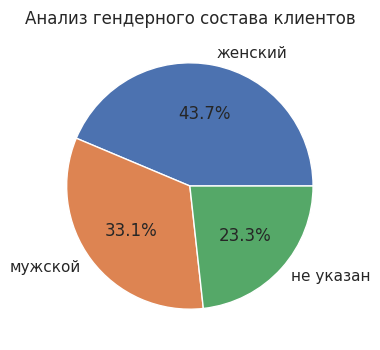

In [73]:
plt.pie(df_copy['Пол клиента'].value_counts(), labels = df_copy['Пол клиента'].value_counts().index, autopct='%.1f%%')
plt.title('Анализ гендерного состава клиентов')
plt.show()

**Выводы:**
1. В датасете около 23 % клиентов не указали свой пол. Это может быть связано с тем, что клиенты хотят сохранить анонимность либо в процессе регистрации было неудобно указывать пол.
2. Женский пол составляем почти 44 % от части клиентов. Это объяснимо тем, что женщины чаще посещают кофейни для общения и встреч
3. Так же можно сделать вывод о том, что атмосфера кофеен сети соответствует предпочтениям женской аудитории

### 'Город магазина'

In [74]:
city = df_copy['Город магазина']
city.describe()

count      24852
unique         2
top       Москва
freq       16259
Name: Город магазина, dtype: object

In [75]:
city.mode()

0    Москва
Name: Город магазина, dtype: object

In [76]:
city.value_counts()

Город магазина
Москва             16259
Санкт-Петербург     8593
Name: count, dtype: int64

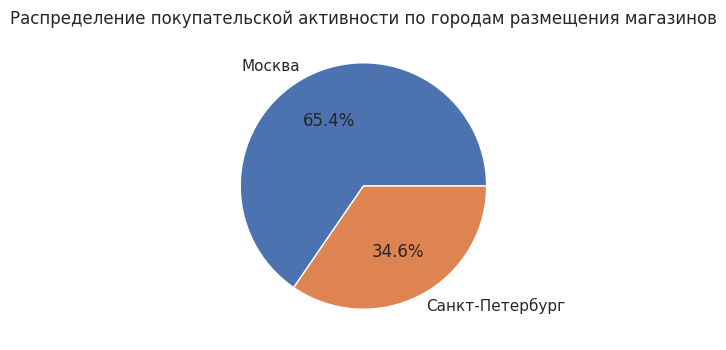

In [77]:
plt.pie(city.value_counts(), labels = city.value_counts().index, autopct='%.1f%%')
plt.title('Распределение покупательской активности по городам размещения магазинов')
plt.show()

**Выводы:**
1. Москва занимает доминирующую позицию с долей 65,4% от общего числа транзакций. Санкт-Петербург значительно уступает, составляя 34,6%.
2. Москва является основным центром концентрации магазинов кофеен, что может быть связано с большим населением, высокой плотностью населения и развитой инфраструктурой.

### 'Категория товара'

In [78]:
category=df_copy['Категория товара']
category.describe()

count      24852
unique         9
top       Coffee
freq        9948
Name: Категория товара, dtype: object

In [79]:
category.mode()

0    Coffee
Name: Категория товара, dtype: object

In [80]:
category.value_counts()

Категория товара
Coffee                9948
Tea                   7866
Bakery                3780
Drinking Chocolate    1955
Flavours               782
Coffee beans           217
Loose Tea              155
Branded                 82
Packaged Chocolate      67
Name: count, dtype: int64

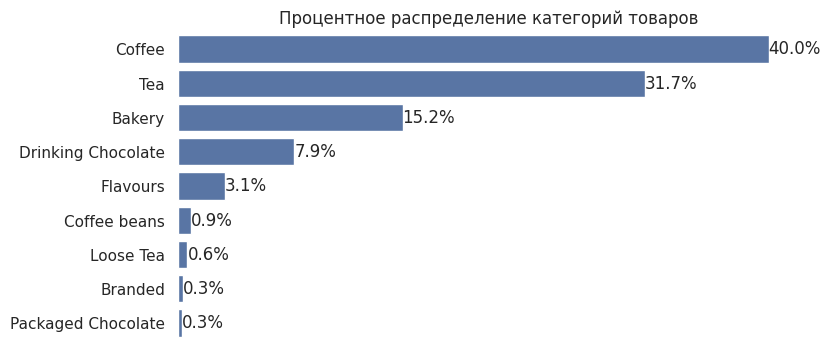

In [81]:
ax = sns.barplot(
y=category.value_counts().index,
x=category.value_counts(normalize=True) * 100,
orient='h'
)

plt.title('Процентное распределение категорий товаров')
plt.xlabel('')
ax.grid(False)
ax.set_frame_on(False)
plt.xticks([])
plt.ylabel('')
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.show()

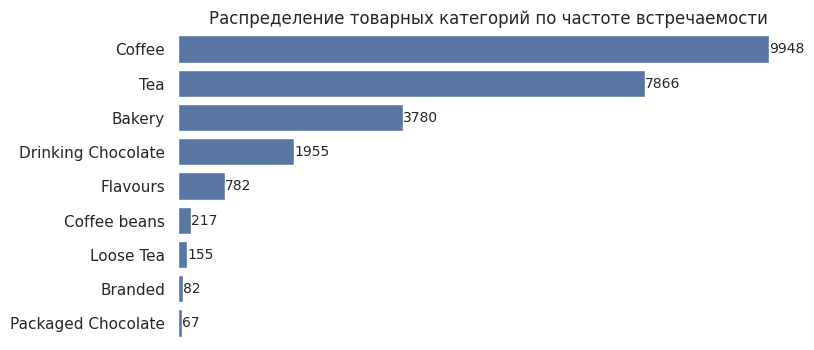

In [82]:
ax = sns.barplot(y=category.value_counts().index, x=category.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
ax.grid(False)
ax.set_frame_on(False)
plt.xticks([])
plt.ylabel('')
plt.title('Распределение товарных категорий по частоте встречаемости')
plt.show()

**Выводы:**
1. На графиках выделяются лидеры продаж (более 15% от общего объема):

* Кофе с частотой 9948 ( 40%)
* Чай с частотой 7866 ( 31,7 %)
* Выпечка с частотой 3780 ( 15,2%)

 Средние показатели продаж (от 1% до 15%):

* Горячий шоколад с частотой 1955 ( 7,9 %)
* Flavours с частотой 782 ( 3,1%)

 Низкие показатели продаж (менее 1%):

* Coffee beans
* Loose Tea
* Branded
* Packaged Chocolate

2. Наблюдается явное доминирование трех основных категорий товаров и виден существенный разрыв между лидерами и остальными категориями


### 'Название товара'

In [83]:
name=df_copy['Название товара']
name.describe()

count                       24852
unique                         80
top       Morning Sunrise Chai Rg
freq                          521
Name: Название товара, dtype: object

In [84]:
name.mode()

0    Morning Sunrise Chai Rg
Name: Название товара, dtype: object

In [85]:
name.value_counts()


Название товара
Morning Sunrise Chai Rg         521
Columbian Medium Roast Rg       516
Latte                           516
Sustainably Grown Organic Lg    516
Traditional Blend Chai Rg       515
                               ... 
Espresso Roast                   17
Chili Mayan                      17
Earl Grey                        15
Peppermint                       14
Spicy Eye Opener Chai            13
Name: count, Length: 80, dtype: int64

Поскольку в анализируемом столбце содержится большое количество уникальных значений, а простой анализ с помощью метода value_counts() не позволяет наглядно увидеть распределение частот, построим тепловую карту частот для визуализации распределения значений

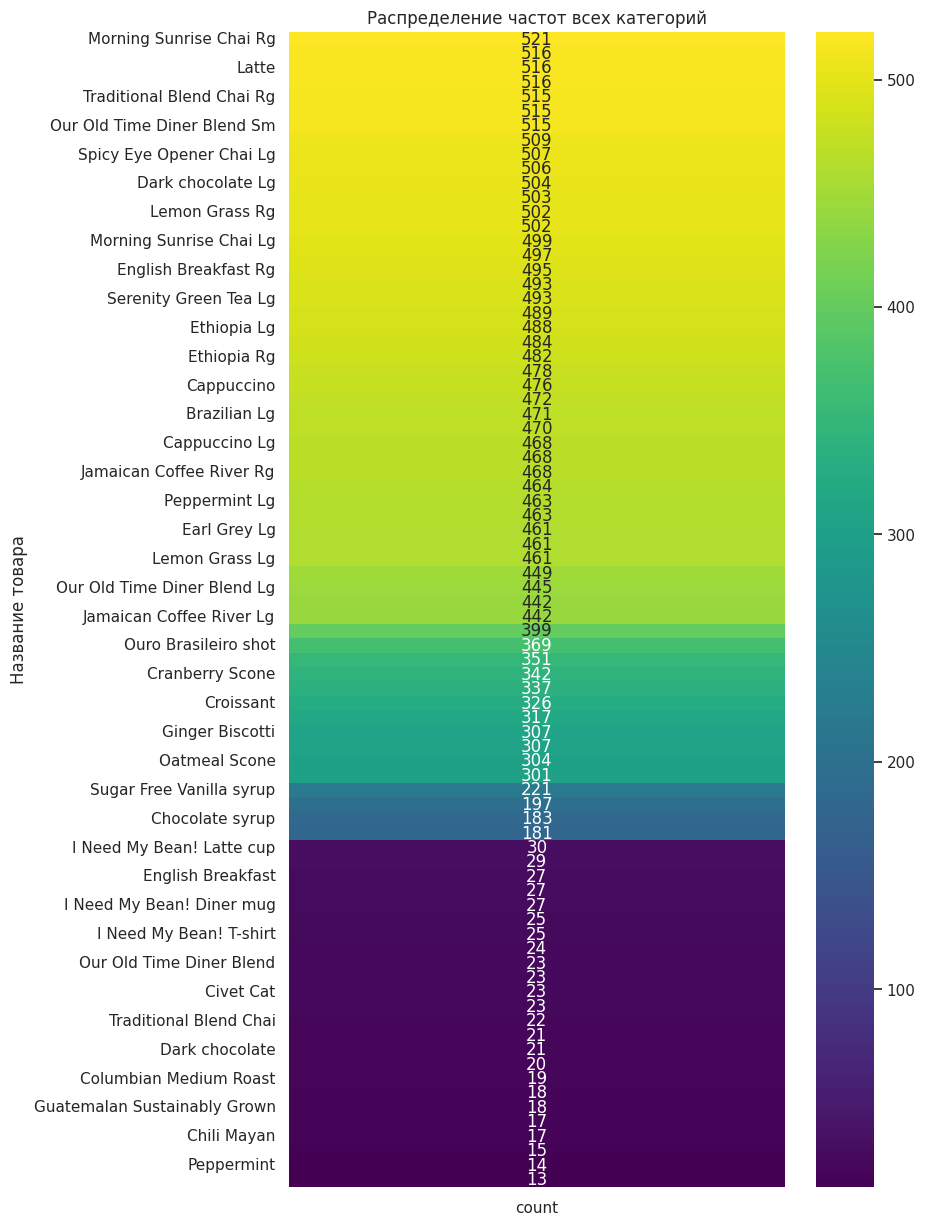

In [86]:
plt.figure(figsize=(8, 15))
sns.heatmap(name.value_counts().to_frame(),
            annot=True, fmt='g', cmap='viridis', cbar=True)
plt.title('Распределение частот всех категорий')
plt.show()

На основе графика можно выделить следующие группы товаров кофейни:

1. Высокочастотные товары (жёлтая зона),товары имеющие частоту более 500 и являются основными бестселлерами. Они составляют ядро ассортимента и обеспечивают основную часть продаж.

2. Среднечастотные товары (зелёная зона),
товары имеющие частоту от 200 до 500

3. Низкочастотные товары (синяя зона), товары имеющие частоту менее 200. Они могут быть менее популярными или сезонными

Рассмотрим подробнее высокочастотные и среднечастотные товары

Отобразим на графике 10 наиболее востребованных товаров в сегментах высокой и средней частоты заказов

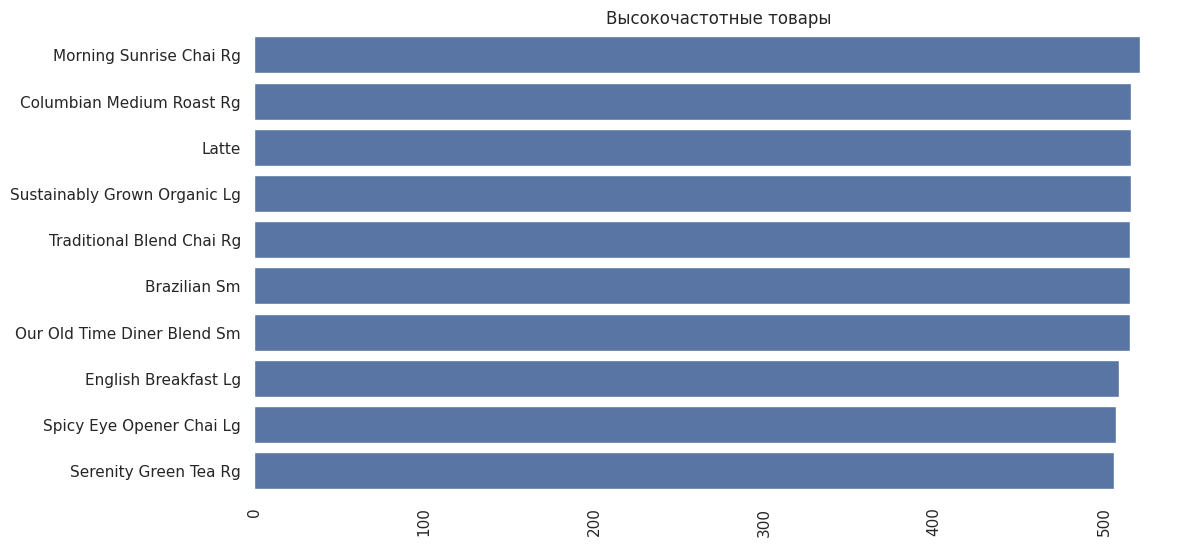

In [87]:
filtered_data_high = name.value_counts()[name.value_counts() >= 500][:10]


# Строим график
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_data_high.values, y=filtered_data_high.index)
plt.box(False)
plt.title('Высокочастотные товары')
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()




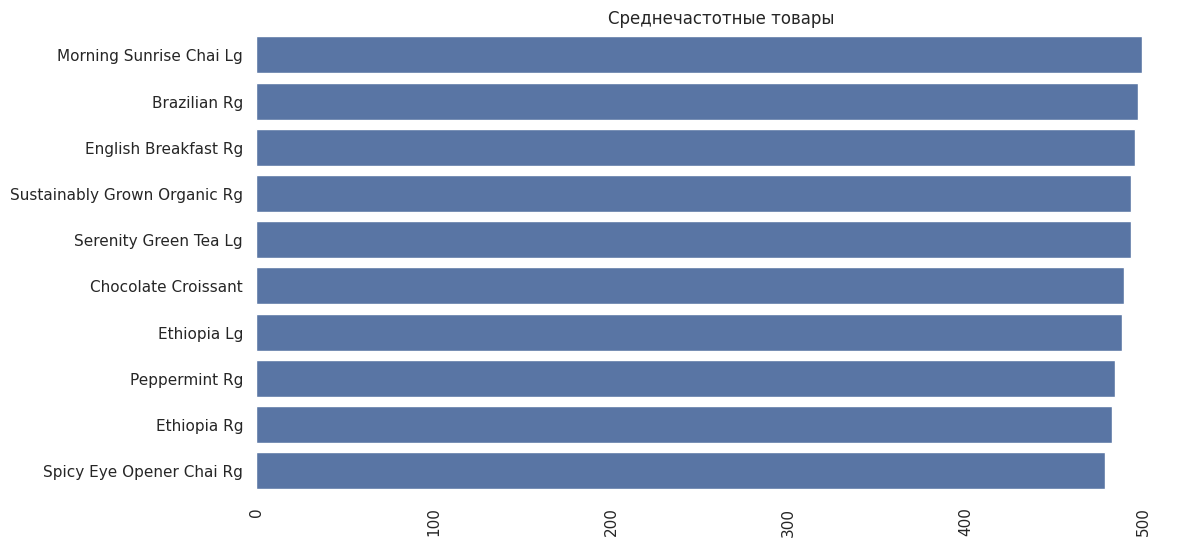

In [88]:
filtered_data_middle = name.value_counts()[(name.value_counts() >= 200) & (name.value_counts() < 500) ][:10]


# Строим график
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_data_middle.values, y=filtered_data_middle.index)
plt.title('Среднечастотные товары')
plt.box(False)
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

Построим график частотного распределения товаров в категориях покупательской активности

In [89]:
# Сначала получаем Series с подсчетами
counts = df_copy['Название товара'].value_counts()

# Затем фильтруем и получаем уникальные значения
high_category = counts[counts > 500].index
middle_category = counts[(counts >= 200) & (counts < 500)].index
low_category = counts[counts < 200].index

In [90]:
#получаем количество товаров
high_count = len(high_category)
middle_count = len(middle_category)
low_count = len(low_category)

In [91]:
# Сначала получаем Series с подсчетами
counts = df_copy['Название товара'].value_counts()

# Затем фильтруем и получаем уникальные значения
high_category = counts[counts > 500].index
middle_category = counts[(counts >= 200) & (counts < 500)].index
low_category = counts[counts < 200].index

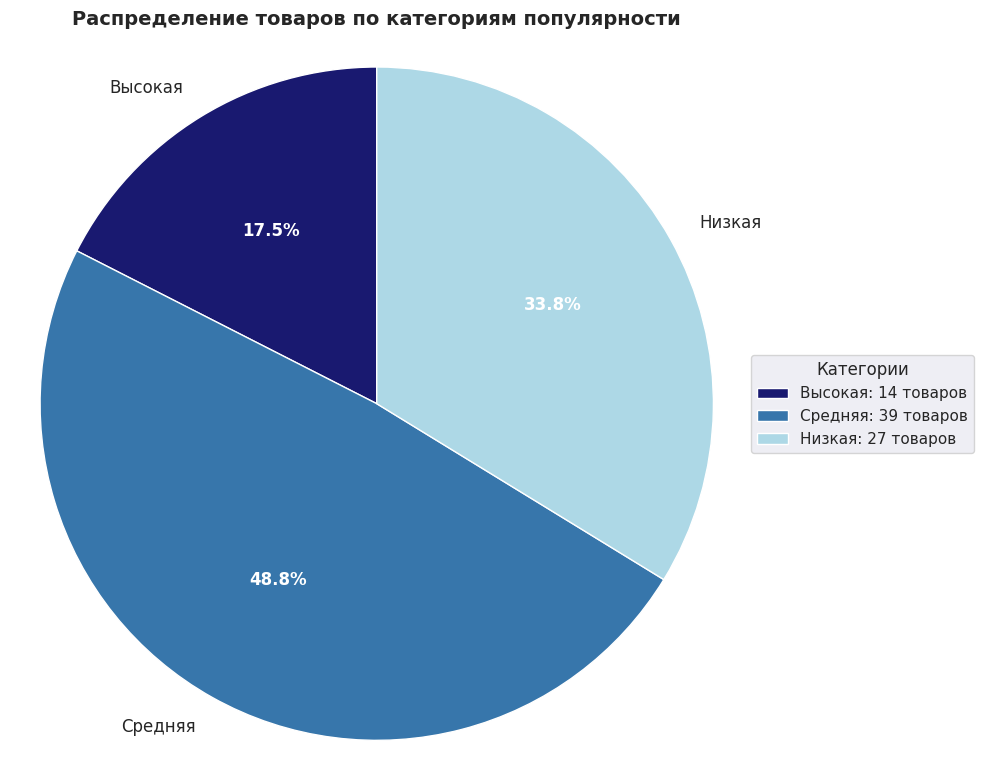

In [92]:
# Создаем круговую диаграмму
fig, ax = plt.subplots(figsize=(10, 8))

# Данные для диаграммы
categories = ['Высокая', 'Средняя', 'Низкая']
counts = [high_count, middle_count, low_count]
colors = ['#191970', '#3776ab', '#ADD8E6']

# Создаем круговую диаграмму с процентами
wedges, texts, autotexts = ax.pie(
    counts,
    labels=categories,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

# Настраиваем внешний вид процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Добавляем заголовок
ax.set_title('Распределение товаров по категориям популярности', fontsize=14, fontweight='bold')

# Добавляем легенду для отображения абсолютных значений
legend_labels = [f'{category}: {count} товаров' for category, count in zip(categories, counts)]
ax.legend(wedges, legend_labels, title="Категории", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Обеспечиваем круглую форму диаграммы
ax.axis('equal')

plt.tight_layout()
plt.show()

**Выводы:**
1. В категорию высокой популярности товаров входит небольшая доля ассортимента, а именно 14 позиций, что составляет около 17,5 % от общего ассортимента.Эти товары приносят значительную часть выручки.
2. Самая большая категория - средняя популярность, в нее входит 39 позиций , что составляет почти 49 % от общего ассортимента. При правильном маркетингом подходе эти товары могут перейти в первую категорию
3. В группу низкой популярности входит 27 позиций , что составляет около 34 % от общего ассортимента
4. Распределение товаров по категориям популярности показывает, что основная часть ассортимента сосредоточена в средней категории, что говорит о сбалансированности ассортимента.

### 'ID магазина'

In [93]:
id_store=df_copy['ID магазина']

In [94]:
id_store.value_counts()

ID магазина
3    8593
5    8545
8    7714
Name: count, dtype: int64

В датасете представлено три магазина примерно с одиннаковой покупательской активностью

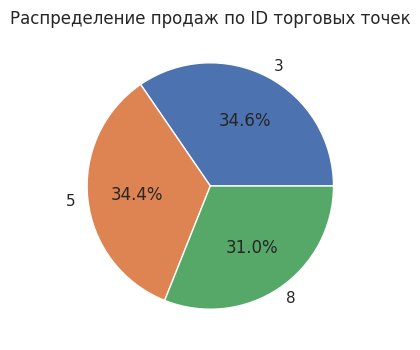

In [95]:
plt.pie(id_store.value_counts(), labels = id_store.value_counts().index, autopct='%.1f%%')
plt.title('Распределение продаж по ID торговых точек')
plt.show()

**Выводы:**
1. Распределение продаж между тремя торговыми точками примерно равное, но с небольшими различиями:

   * ID 3: 34.6%
   * ID 5: 34.4%
   * ID 8: 31.0%
2. Лидером по объему продаж является торговая точка с ID 3, которая опережает ID 5 всего на 0.2%.   
3. ID 8 показывает наименьшую активность, но разница с лидерами составляет менее 4%.
4.Распределение продаж между точками сбалансировано, что может свидетельствовать о равномерной работе торговых точек или схожести их условий

### 'ID клиента'

In [96]:
id_client=df_copy['ID клиента']

In [97]:
id_client.value_counts()

ID клиента
3       31
8285    31
548     31
8341    29
8009    28
        ..
5147     1
5076     1
427      1
5784     1
5668     1
Name: count, Length: 2245, dtype: int64

In [98]:
#определим количество клиентов кофейни
len(id_client.unique())

2245

Проведем сегментирование клиентов по частоте покупок:

* Постоянные покупатели: клиенты, совершившие более 21 покупок

* Частые покупатели: клиенты с количеством покупок от 11 до 20 покупок

* Средние покупатели: клиенты с количеством покупок от 6 до 10 покупок

* Редкие покупатели: клиенты, совершившие от 1 до 5 покупок.

In [99]:
purchase_counts = df_copy['ID клиента'].value_counts().reset_index()
purchase_counts.columns = ['id_client', 'purchase_count']

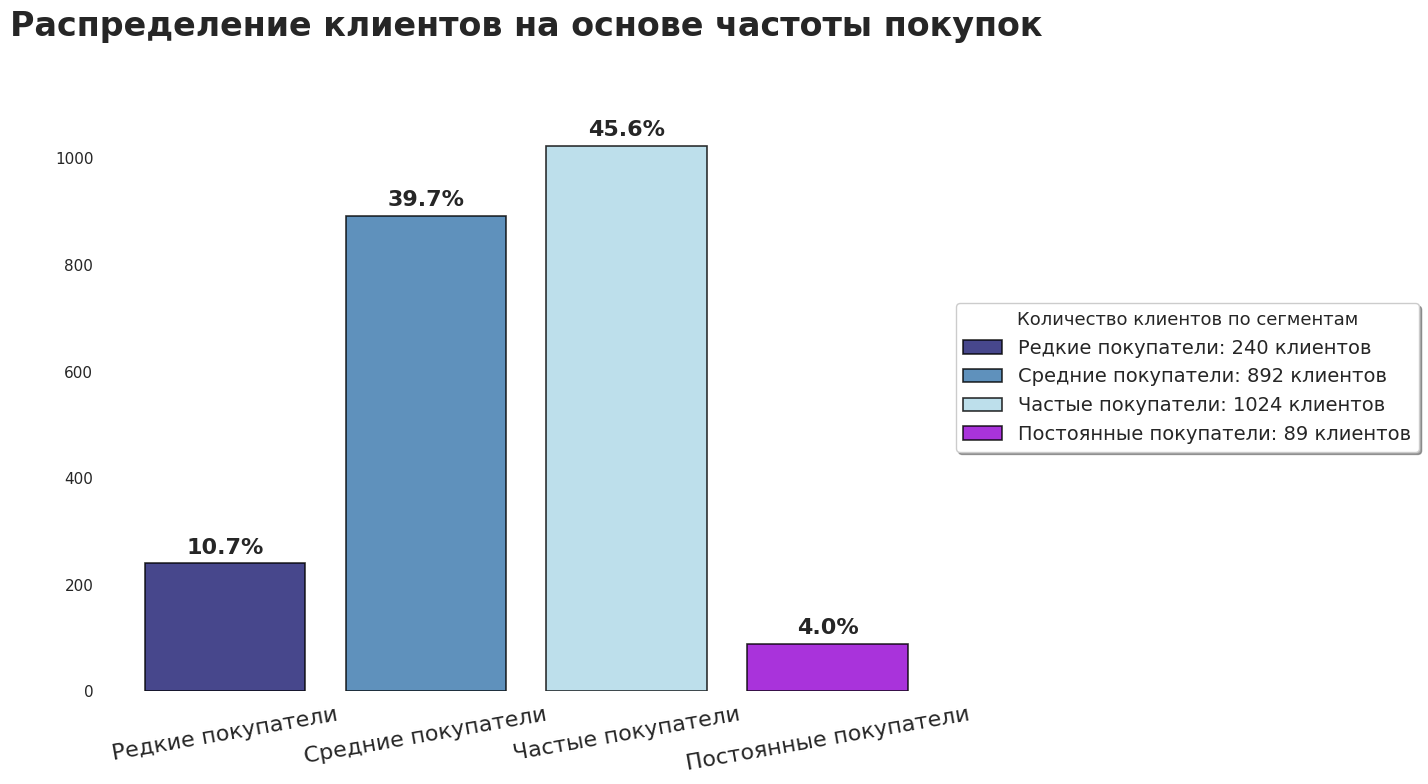

In [100]:

purchase_counts = df_copy['ID клиента'].value_counts().reset_index()
purchase_counts.columns = ['id_client', 'purchase_count']

# Создаем функцию для сегментации
def segment_clients(purchase_count):
    if 1 <= purchase_count <= 5:
        return 'Редкие покупатели'
    elif 6 <= purchase_count <= 10:
        return 'Средние покупатели'
    elif 11 <= purchase_count <= 20:
        return 'Частые покупатели'
    elif purchase_count >= 21:
        return 'Постоянные покупатели'
    else:
        return 'Неактивные'  # На случай, если есть клиенты с 0 покупок


purchase_counts['segment'] = purchase_counts['purchase_count'].apply(segment_clients)

segment_distribution = purchase_counts['segment'].value_counts()


sns.set_style("white")


plt.figure(figsize=(14, 8))


segment_order = ['Редкие покупатели', 'Средние покупатели', 'Частые покупатели', 'Постоянные покупатели']
segment_counts = [segment_distribution.get(segment, 0) for segment in segment_order]

total_clients = sum(segment_counts)
segment_percentages = [(count / total_clients) * 100 for count in segment_counts]


colors = ['#191970', '#3776ab', '#ADD8E6','#9400D3']


bars = plt.bar(segment_order, segment_counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)


for bar, count, percentage in zip(bars, segment_counts, segment_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(segment_counts)*0.01,
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=16, fontweight='bold')

plt.title('Распределение клиентов на основе частоты покупок', fontsize=24, fontweight='bold', pad=20)


plt.xlabel('', fontsize=20, labelpad=15)
plt.ylabel('', fontsize=16, labelpad=15)

plt.xticks(range(len(segment_order)), segment_order, rotation=10, fontsize=16)


sns.despine(left=True, bottom=True)

legend_labels = [f'{segment}: {count} клиентов'
                 for segment, count in zip(segment_order, segment_counts)]
plt.legend(bars, legend_labels,
           title='Количество клиентов по сегментам',
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=True,
           fancybox=True,
           shadow=True,
           fontsize=14,
           title_fontsize=13)


plt.ylim(0, max(segment_counts) * 1.15)


plt.tight_layout()

plt.show()

**Выводы:**
1. Наибольшую долю составляют частые клиенты - 45,6 % ( 1023 клиента) , это самая активная группа, которая приносит значительную часть выручки
2. Средние покупатели занимают 39,8% (893 клиента), так же обеспечивают стабильный поток продаж
3. Редкие покупатели составляют 10,7% (240 клиентов).
4. Постоянные покупатели — всего 4,0% (89 клиентов)


###  'ID товара'

Перед принятием решения об исключении анализа ID товара необходимо провести валидацию соответствия между двумя признаками, а именно выполнить проверку взаимной однозначности соответствия:

* Убедиться, что каждому ID товара соответствует только одно название

* Проверить отсутствие дублирования названий при разных ID

In [101]:
# Проверяем, что каждому ID соответствует только одно название
id_to_name = df_copy.groupby('ID товара')['Название товара'].nunique()
if (id_to_name > 1).any():
    print("Внимание: есть ID товара, которым соответствует более одного названия")
    print(id_to_name[id_to_name > 1])
else:
    print("Каждому ID товара соответствует только одно название")

# Проверяем, что каждому названию соответствует только один ID
name_to_id = df_copy.groupby('Название товара')['ID товара'].nunique()
if (name_to_id > 1).any():
    print("Внимание: есть названия товаров, которым соответствует более одного ID")
    print(name_to_id[name_to_id > 1])
else:
    print("Каждому названию товара соответствует только один ID")

Каждому ID товара соответствует только одно название
Каждому названию товара соответствует только один ID


Выводы:
1.  Данные в столбцах "ID товара" и "Название товара" непротиворечивы и не содержат дубликатов или неоднозначностей

2. Любой анализ, проведенный по ID товара, будет эквивалентен анализу по названию товара и наоборот.

### 'ID операции'

In [102]:
df_copy['ID операции']

0            0
1            1
2            2
3            3
4            4
         ...  
24847    49882
24848    49888
24849    49890
24850    49892
24851    49893
Name: ID операции, Length: 24852, dtype: int64

In [103]:
# Количество дубликатов
duplicate_count = df_copy['ID операции'].duplicated().sum()
print(f"Количество дубликатов: {duplicate_count}")

Количество дубликатов: 0


Выводы:
1. Выявлена уникальность значений в столбце «ID операции»

2. Подтверждено отсутствие дубликатов среди записей

3. Поскольку каждое значение «ID операции»
является уникальным идентификатором, оно не несет дополнительной аналитической информации,  выполняет исключительно техническую функцию идентификации записей

4. Анализ данного атрибута нецелесообразен с точки зрения получения аналитической информации. Данный атрибут следует рассматривать исключительно как технический идентификатор записей в наборе данных.

## 4.2. Количественные признаки

In [104]:
df_copy.select_dtypes(include=['int64','float64']).columns

Index(['ID операции', 'Количество', 'Цена за единицу', 'Общая сумма чека',
       'ID товара', 'ID магазина', 'ID клиента', 'Возраст клиента'],
      dtype='object')

Признак 'id'( операции,товара,магазина,клиента)  относится к категории категориальные признаки и был рассмотрен выше

### 'Возраст клиента'

In [105]:
age=df_copy['Возраст клиента']

In [106]:
max_value = age.max()
min_value = age.min()
mean_value = age.mean()
median_value = age.median()
print(f'Наибольший возраст клиента: {max_value}', f'Наименьший возраст клиента: {min_value}',
     f'Средний возраст клиента: {round(mean_value)}', f'Медианное значение возраста клиента: {median_value}', sep='\n')

Наибольший возраст клиента: 75
Наименьший возраст клиента: 24
Средний возраст клиента: 47
Медианное значение возраста клиента: 44.0


In [107]:
percentile_10_value = age.quantile(0.10)
percentile_25_value = age.quantile(0.25)
percentile_50_value = age.quantile(0.50)
percentile_75_value = age.quantile(0.75)
percentile_90_value = age.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 28.0
25-й процентиль: 33.0
50-й процентиль: 44.0
75-й процентиль: 60.0
90-й процентиль: 69.0


In [108]:
age.describe()

count    24852.000000
mean        46.747545
std         15.091661
min         24.000000
25%         33.000000
50%         44.000000
75%         60.000000
max         75.000000
Name: Возраст клиента, dtype: float64

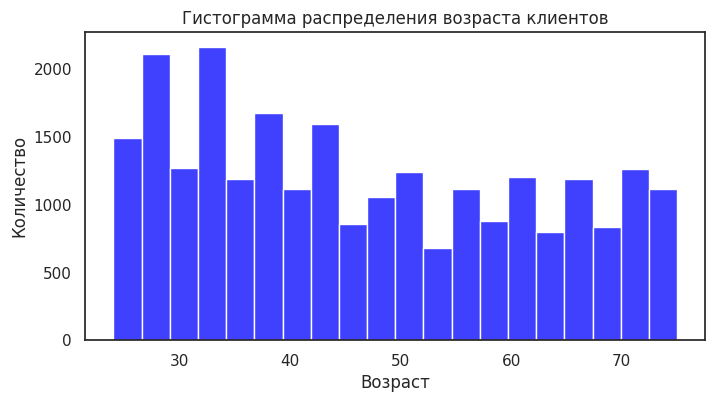

In [109]:
sns.histplot(age, bins=20, color='blue')
plt.title('Гистограмма распределения возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(False)
plt.show()

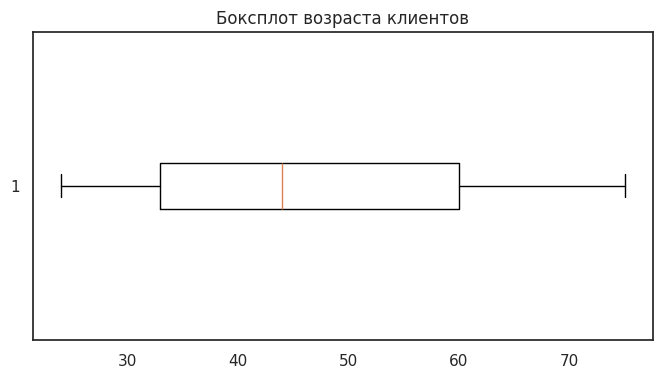

In [110]:
plt.boxplot(age, vert=False)
plt.title('Боксплот возраста клиентов')
plt.grid(False)
plt.show()

Проанализируем возрастную структуру клиентской базы через категоризацию и визуализацию данных.

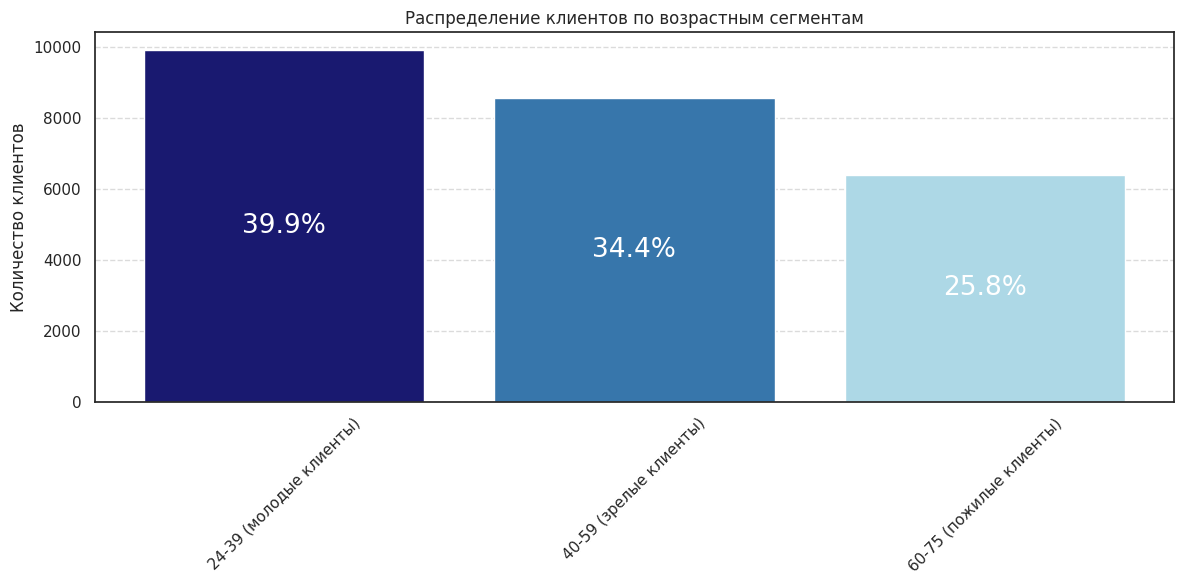

In [111]:
# Создаем сегменты возраста
def age_segment(age):
    if 24 <= age <= 39:
        return '24-39 (молодые клиенты)'
    elif 40 <= age <= 59:
        return '40-59 (зрелые клиенты)'
    elif 60 <= age <= 75:
        return '60-75 (пожилые клиенты)'
    else:
        return 'Неизвестно'


df = df_copy.copy()


df['Сегмент'] = df['Возраст клиента'].apply(age_segment)


age_counts = df['Сегмент'].value_counts().sort_index()
total = len(df)
percentages = (age_counts / total * 100).round(1)


plt.figure(figsize=(12, 6))
bars = plt.bar(
    age_counts.index,
    age_counts.values,
    color=['#191970', '#3776ab', '#ADD8E6']
)

for bar, percent in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{percent:.1f}%',
        ha='center',
        va='center',
        color='white',
        fontsize=19
    )
sns.set_style("white")
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по возрастным сегментам')
plt.grid(False)
sns.set_style("white")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [112]:
# коэффициенты ассиметрии и эксцесса
skew = age.skew()
kurtosis = age.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 0.28079911169022514
Коэффициент эксцесса: -1.2071866113302654


In [113]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино
from scipy.stats import normaltest
# Подготовка данных
age_data = df_copy['Возраст клиента'].dropna()

# Проверка на нормальность
stat, p_value = stats.normaltest(age_data)

print("="*50)
print("ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ВОЗРАСТА")
print("="*50)
print(f"Критерий Д'Агастино: K² = {stat:.3f}")
print(f"p-value = {p_value:.6f}")

# Интерпретация
alpha = 0.05
if p_value > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")

ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ВОЗРАСТА
Критерий Д'Агастино: K² = 23741.716
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


**Выводы:**
1. Средний возраст клиентов около 44 лет.
2. * Самый многочисленный сегмент - молодые клиенты ( 24-39 лет) , составляет около 40 %
   * Второй по величине сегмент составляет 34,4 %, куда входят клиенты 40-59 лет
   * Наименьший сегмент составляет 25,8 %, куда входят пожилые клиенты ( 60-75 лет)
3. Есть клиенты моложе 30 лет и старше 70 лет,что указывает на широкий возрастной диапазон.
4. Коэффициент ассиметрии: 0.28 > 0, что указывает на правосторонюю асимметрию ( небольшое смещение распределение вправо), т.е. в основном клиенты моложе среднего возраста
5. Коэффициент эксцесса: -1.2 < 0,т.е. видно  плосковершинное распределение, что свидетельствует об относительно равномерной представленности всех возрастных групп
6. pvalue меньше уровня значимости 0,05 и практически равен нулю, поэтому гипотеза о нормальности распределения признака отвергается.Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса

### 'Количество проданных товаров'

In [114]:
amount=df_copy['Количество']

In [115]:
max_value = amount.max()
min_value = amount.min()
mean_value = amount.mean()
median_value = amount.median()
print(f'Наибольший показатель комплектации чека: {max_value}', f'Наименьший показатель комплектации чека: {min_value}',
     f'Средний показатель комплектации чека: {round(mean_value)}', f'Медианное значение комплектации чека: {median_value}', sep='\n')

Наибольший показатель комплектации чека: 8
Наименьший показатель комплектации чека: 1
Средний показатель комплектации чека: 1
Медианное значение комплектации чека: 1.0


In [116]:
amount.unique()

array([1, 2, 4, 3, 8])

In [117]:
amount.value_counts()

Количество
1    14419
2    10054
3      373
4        5
8        1
Name: count, dtype: int64

Можно сделать вывод, что обычно количество позиций в чеке составляет 1, 2, 3, намного реже 4 или 8 ( всего 6 клиентов совершили эти покупки)

Исключим эти наблюдения из датасета для дальнейшего анализа

In [118]:
# Удаляем строки со значениями 4 и 8 в столбце 'Количество'
df_copy = df_copy[~df_copy['Количество'].isin([4, 8])]

# Проверяем результат
print(df_copy['Количество'].value_counts())

Количество
1    14419
2    10054
3      373
Name: count, dtype: int64


In [119]:
amount=df_copy['Количество']

In [120]:
amount.describe()

count    24846.000000
mean         1.434678
std          0.525137
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Количество, dtype: float64

In [121]:
percentile_10_value = amount.quantile(0.10)
percentile_25_value = amount.quantile(0.25)
percentile_50_value = amount.quantile(0.50)
percentile_75_value = amount.quantile(0.75)
percentile_90_value = amount.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 1.0
25-й процентиль: 1.0
50-й процентиль: 1.0
75-й процентиль: 2.0
90-й процентиль: 2.0


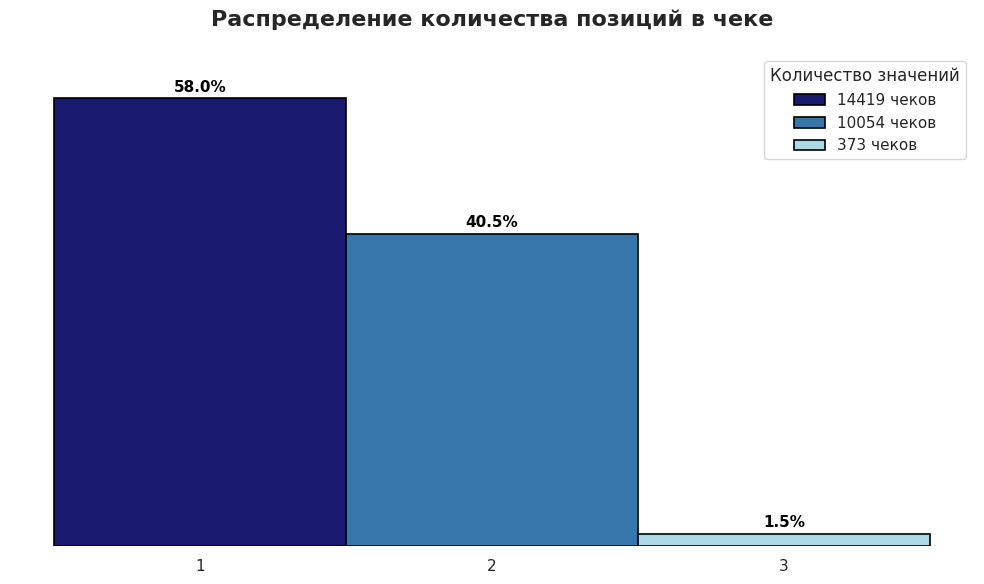

In [122]:

sns.set_style("white")
plt.figure(figsize=(10, 6))
total_count = len(amount)

# Создаем гистограмму с правильными параметрами
plot = sns.histplot(
    amount,
    bins=4,
    color='#3776ab',
    alpha=0.7,
    edgecolor='black',
    linewidth=1.2,
    stat='percent',
    discrete=True
)


colors = ['#191970', '#3776ab', '#ADD8E6']
for i, patch in enumerate(plot.patches):
    if i < len(colors):
        patch.set_facecolor(colors[i])


for p in plot.patches:
    height = p.get_height()

    if height > 0.5:
        x = p.get_x() + p.get_width() / 2
        y = height + 0.5
        percent = f'{height:.1f}%'
        plot.annotate(percent, (x, y),
                     ha='center', va='bottom',
                     color='black', fontsize=11, fontweight='bold')


plt.title('Распределение количества позиций в чеке\n',
          fontsize=16, fontweight='bold', pad=1)

plt.xticks(np.arange(int(min(amount)), int(max(amount)) + 1))


sns.despine(left=True, bottom=True)


plt.xlabel('', fontsize=12, labelpad=10)
plt.ylabel('', fontsize=12, labelpad=10)
plt.yticks([])


handles = []
labels = []
for p in plot.patches:
    count = int(p.get_height()/100* total_count)
    if count > 0:
        handles.append(p)
        labels.append(f'{count} чеков')

plt.legend(handles=handles, labels=labels,
           title='Количество значений',
           loc='upper right')


plt.ylim(0, max([p.get_height() for p in plot.patches]) * 1.1)
plt.grid(False)
plt.tight_layout()
plt.show()

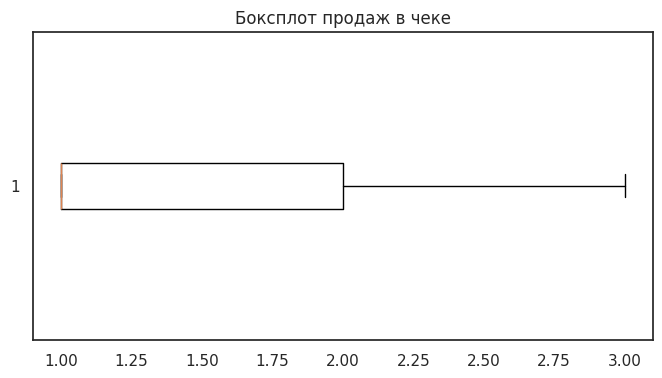

In [123]:

plt.boxplot(amount, vert=False)
sns.set_style("white")
plt.title('Боксплот продаж в чеке')
plt.show()

In [124]:
# коэффициенты ассиметрии и эксцесса
skew = amount.skew()
kurtosis = amount.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 0.5733811454620472
Коэффициент эксцесса: -0.9987378409200853


In [125]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино
from scipy.stats import normaltest
# Подготовка данных
age_data = df_copy['Количество'].dropna()

# Проверка на нормальность
stat, p_value = stats.normaltest(age_data)

print("="*50)
print("ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВА ПРОДАННЫХ ТОВАРОВ")
print("="*50)
print(f"Критерий Д'Агастино: K² = {stat:.3f}")
print(f"p-value = {p_value:.6f}")

# Интерпретация
alpha = 0.05
if p_value > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")

ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВА ПРОДАННЫХ ТОВАРОВ
Критерий Д'Агастино: K² = 6842.984
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


**Выводы:**
1.   * 58 % всех чеков содержат только одну позицию
     * 40,5 % чеков включают две позиции ( возможно часть клиентов выбирают дополнительные товары, к примеру - напиток и выпечку)
     * Только 1,5 % содержат 3 позиции, т.е. низкая склонность клиентов брать более 2-х товаров за визит
2. Коэффициент ассиметрии: 0.57 указывает на правостороннюю асимметрию ( на боксплоте что «хвост» распределения длиннее справа, а основная масса данных сосредоточена слева.)
3. Коэффициент эксцесса: -0.99 показывает, что распределение количества позиций в чеке имеет плосковершинную форму ( на гистограмме хорошо видно это) .
4. pvalue меньше уровня значимости 0,05 и практически равен нулю,т.е гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса

### 'Цена за единицу товара'

In [126]:
price=df_copy['Цена за единицу']

In [127]:
max_value = price.max()
min_value = price.min()
mean_value = price.mean()
median_value = price.median()
print(f'Наибольшая цена: {max_value}', f'Наименьшиая цена: {min_value}',
     f'Средняя цена: {round(mean_value)}', f'Медианное значение цены: {median_value}', sep='\n')

Наибольшая цена: 2925.0
Наименьшиая цена: 52.0
Средняя цена: 215
Медианное значение цены: 195.0


In [128]:
price.describe()

count    24846.000000
mean       215.269347
std        147.538860
min         52.000000
25%        162.500000
50%        195.000000
75%        243.750000
max       2925.000000
Name: Цена за единицу, dtype: float64

In [129]:
percentile_10_value = price.quantile(0.10)
percentile_25_value = price.quantile(0.25)
percentile_50_value = price.quantile(0.50)
percentile_75_value = price.quantile(0.75)
percentile_90_value = price.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 143.0
25-й процентиль: 162.5
50-й процентиль: 195.0
75-й процентиль: 243.75
90-й процентиль: 276.25


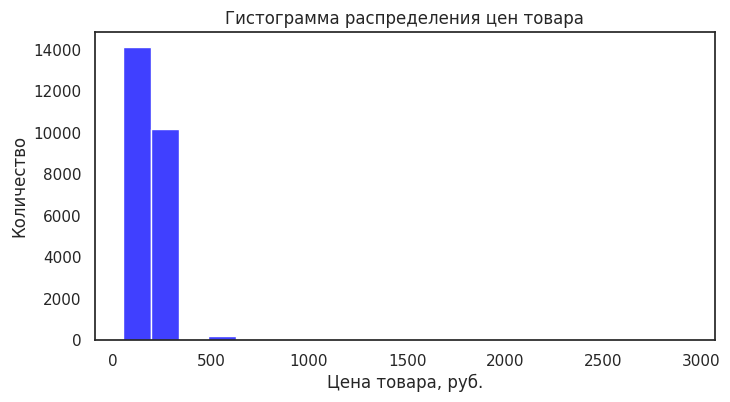

In [130]:
sns.histplot(price, bins=20, color='blue')
plt.title('Гистограмма распределения цен товара')
plt.xlabel('Цена товара, руб.')
plt.ylabel('Количество')
plt.show()

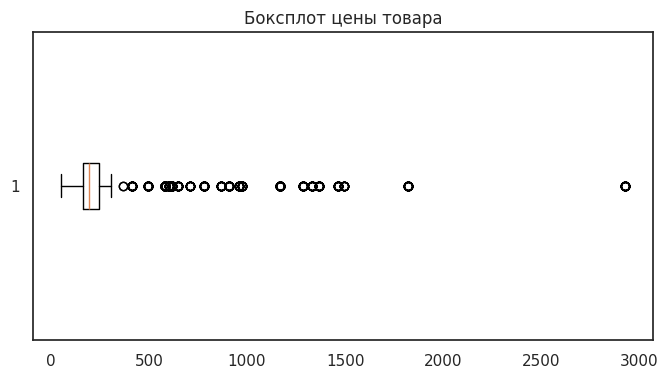

In [131]:
plt.boxplot(price, vert=False)
sns.set_style("white")
plt.title('Боксплот цены товара')
plt.show()

На основании анализа можно сделать следующие выводы :
* Широкий разброс цен ( от 52 до 2925 рублей)
* Основная масса товаров ( 90 %) сосредоточена в диапазоне до 276.25 рублей.

Рассморим подробнее те товары, которые находятся выше 90-й процентиля

In [132]:
filtered_df=df_copy[price>price.quantile(0.90)].sort_values(by='Цена за единицу', ascending=False)
filtered_df[['Название товара', 'Цена за единицу']]
unique_values = filtered_df[['Название товара', 'Цена за единицу']].drop_duplicates()
unique_values

Название товара  Цена за единицу
10725                     Civet Cat          2925.00
13774       I Need My Bean! T-shirt          1820.00
10266           Organic Decaf Blend          1820.00
15984       I Need My Bean! T-shirt          1495.00
10194           Organic Decaf Blend          1495.00
19580     I Need My Bean! Latte cup          1495.00
19312     I Need My Bean! Diner mug          1495.00
20348           Organic Decaf Blend          1462.50
13483                      Ethiopia          1365.00
22628          Primo Espresso Roast          1329.25
18076         Jamacian Coffee River          1283.75
18989           Brazilian - Organic          1170.00
12900      Our Old Time Diner Blend          1170.00
12096        Columbian Medium Roast           975.00
23075                Espresso Roast           958.75
10959     I Need My Bean! Latte cup           910.00
16508                   Chili Mayan           866.45
16765     I Need My Bean! Diner mug           780.00
10317           Organic Decaf Blend           780.00
14407         Spicy Eye Opener Chai           711.75
19414  Guatemalan Sustainably Grown           650.00
14814          Morning Sunrise Chai           617.50
13343            Serenity Green Tea           601.25
15901                     Earl Grey           581.75
17978             English Breakfast           581.75
15798                   Lemon Grass           581.75
17737        Traditional Blend Chai           581.75
10392                    Peppermint           581.75
15736     Sustainably Grown Organic           494.00
16436                Dark chocolate           416.00
11693         Scottish Cream Scone            365.95
6687   Sustainably Grown Organic Lg           308.75
11728              Almond Croissant           304.85
11876            Jumbo Savory Scone           304.85
11817           Chocolate Croissant           304.85
20688             Dark chocolate Lg           292.50
20699         Scottish Cream Scone            292.50
11872                     Croissant           284.70
11748       Chocolate Chip Biscotti           284.70
11769               Ginger Biscotti           284.70

* Виден так же значительный разброс цен от 284,70 до 2925 единиц

* Особое внимание заслуживает наличие экстремально высокой цены (2925) продукту Civet Cat (копи-лювак) — известному премиальному сорту кофе, производимому уникальным способом. Это подтверждает, что данное значение не является ошибкой, а отражает реальную рыночную стоимость редкого продукта

* Принимаем решение о сегментировании цены на три группы:
   *  Основной сегмент ( до 500 единиц)
   * Средний сегмент ( от 500 до 1400 единиц)
   * Премиум сегмент ( От 1400 единиц)


In [133]:
# Разделяем данные на сегменты
main_segment = price[price <= 500]
avg_segment = price[(price > 500) & (price <= 1400)]
premium_segment = price[price > 1400]


print("\n=== ОСНОВНОЙ СЕГМЕНТ ===")
print(f"Медиана: {main_segment.median():.2f}")
print(f"Среднее: {main_segment.mean():.2f}")
print(f"Диапазон: {main_segment.min():.2f} - {main_segment.max():.2f}")

print("\n=== СРЕДНИЙ СЕГМЕНТ ===")
print(f"Медиана: {avg_segment.median():.2f}")
print(f"Среднее: {avg_segment.mean():.2f}")
print(f"Диапазон: {avg_segment.min():.2f} - {avg_segment.max():.2f}")

print("\n=== ПРЕМИУМ СЕГМЕНТ ===")
print(f"Медиана: {premium_segment.median():.2f}")
print(f"Среднее: {premium_segment.mean():.2f}")
print(f"Диапазон: {premium_segment.min():.2f} - {premium_segment.max():.2f}")


=== ОСНОВНОЙ СЕГМЕНТ ===
Медиана: 195.00
Среднее: 199.13
Диапазон: 52.00 - 494.00

=== СРЕДНИЙ СЕГМЕНТ ===
Медиана: 780.00
Среднее: 872.25
Диапазон: 581.75 - 1365.00

=== ПРЕМИУМ СЕГМЕНТ ===
Медиана: 1820.00
Среднее: 2016.76
Диапазон: 1462.50 - 2925.00


* В основном сегменте видна близость среднего и медианного значения, что является хорошим знаком для анализа и компактное распределение цен ( всего 442 единиц)
* В среднем сегменте более широкий ценовой диапазон (783.25 единиц)
* Премиум-сегмент характеризуется существенным ценовым диапазоном (1462.50 единиц) и значительной разницей между средним и медианным значением

Построим боксплоты цены товара по сегментам

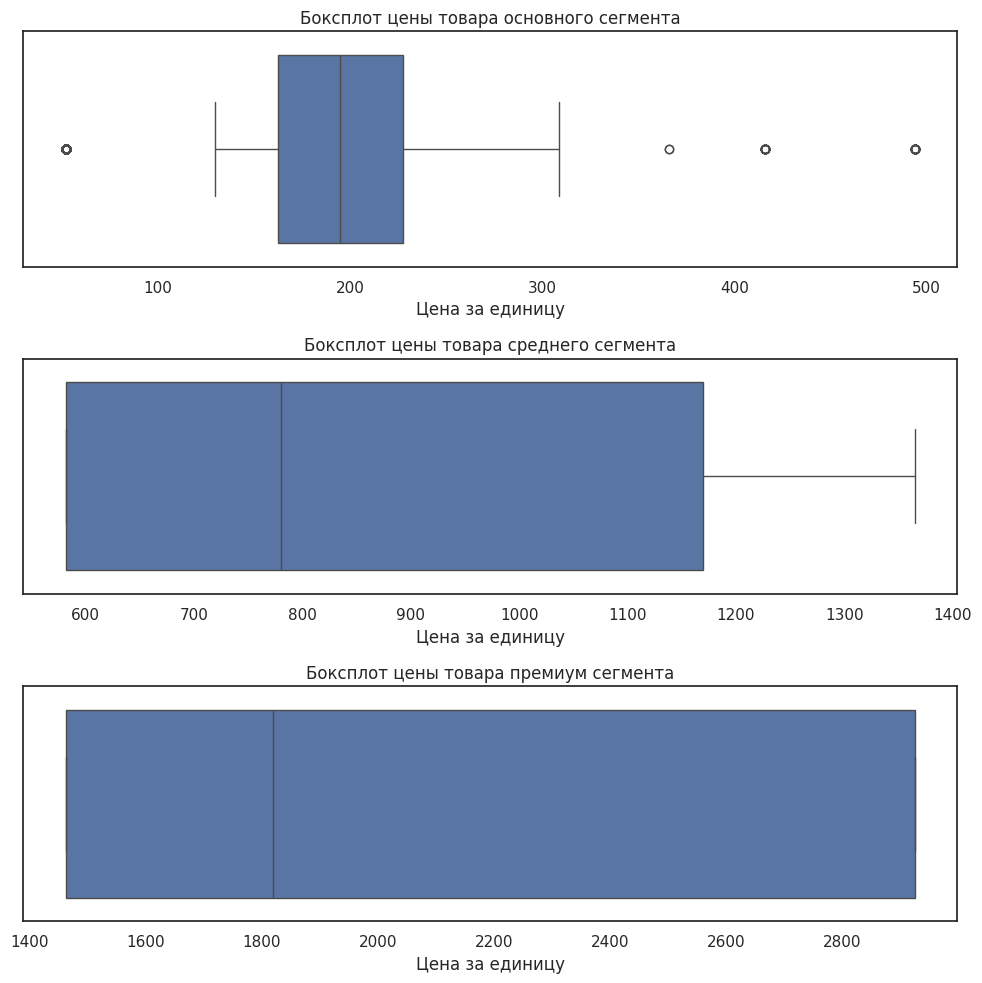

In [134]:
# Создаём фигуру с 3 осями
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))  # 3 строки, 1 столбец

# Боксплот для основного сегмента
sns.boxplot(x=main_segment, ax=ax1, orient='h')
ax1.set_title('Боксплот цены товара основного сегмента')

# Боксплот для среднего сегмента
sns.boxplot(x=avg_segment, ax=ax2, orient='h')
ax2.set_title('Боксплот цены товара среднего сегмента')

# Боксплот для премиум сегмента
sns.boxplot(x=premium_segment, ax=ax3, orient='h')
ax3.set_title('Боксплот цены товара премиум сегмента')

# Настройка стиля и отображение графиков
sns.set_style("white")
plt.tight_layout()
plt.show()

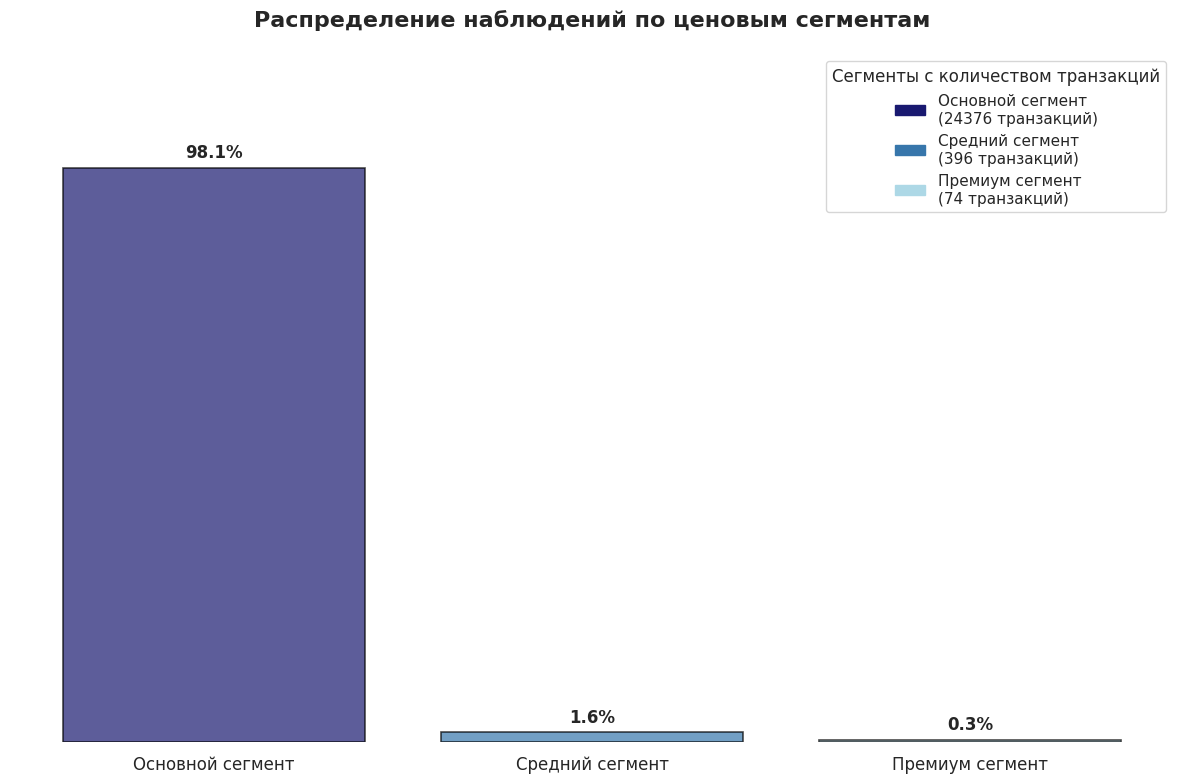

In [135]:


plt.figure(figsize=(12, 8))


sns.set_style("white")

segments = [main_segment, avg_segment, premium_segment]
segment_names = ['Основной сегмент', 'Средний сегмент', 'Премиум сегмент']
colors = ['#191970', '#3776ab', '#ADD8E6']


total_count = len(price)


for i, (segment, name, color) in enumerate(zip(segments, segment_names, colors)):

    percent = len(segment) / total_count * 100


    plt.bar(i, percent, color=color, alpha=0.7, edgecolor='black', linewidth=1.2)


    plt.annotate(f'{percent:.1f}%',
                xy=(i, percent),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold')


plt.xticks(range(len(segment_names)), segment_names, fontsize=12)
plt.xlabel('', fontsize=12, labelpad=10)

plt.yticks([])
plt.ylabel('', fontsize=12, labelpad=10)
plt.ylim(0, max([len(seg) / total_count * 100 for seg in segments]) * 1.2)


legend_labels = [f'{name}\n({len(seg)} транзакций)' for name, seg in zip(segment_names, segments)]
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colors],
           labels=legend_labels,
           title='Сегменты с количеством транзакций',
           loc='best')

sns.despine(left=True, bottom=True)
plt.title('Распределение наблюдений по ценовым сегментам', fontsize=16, fontweight='bold', pad=20)
plt.grid(False)
plt.tight_layout()
plt.show()

In [136]:
# коэффициенты ассиметрии и эксцесса
skew = price.skew()
kurtosis = age.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 9.608212357081108
Коэффициент эксцесса: -1.2071866113302654


In [137]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино
from scipy.stats import normaltest
# Подготовка данных
age_data = df_copy['Цена за единицу'].dropna()

# Проверка на нормальность
stat, p_value = stats.normaltest(age_data)

print("="*50)
print("ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВА ПРОДАННЫХ ТОВАРОВ")
print("="*50)
print(f"Критерий Д'Агастино: K² = {stat:.3f}")
print(f"p-value = {p_value:.6f}")

# Интерпретация
alpha = 0.05
if p_value > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")

ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВА ПРОДАННЫХ ТОВАРОВ
Критерий Д'Агастино: K² = 37827.294
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


**Выводы:**
1.   Сильно доминирует основной сегмент ( цены до 500 единиц) - составляет 98,1 % , значит кофейни работают по доступным по цене товарами, которые пользуются большим спросом
2. Средние и премиум сегменты составляют очень малое количество, значит дорогие товары составляют малую часть ассортимента и продаж
3. Коэффициент ассиметрии: 9.6 намного > 0, что указывает на сильную правостороннюю асимметрию ( связано с наличием экстремально высоких цен на премиум продукты)
4. Коэффициент эксцесса: -1.2 < 0, что указывает на плосковершинное распределение. Это означает, что распределение имеет более плоскую вершину по сравнению с нормальным распределением.
5. pvalue меньше уровня значимости 0,05 и практически равен нулю,т.е гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса

### 'Общая сумма чека'

In [138]:
total_amount=df_copy['Общая сумма чека']

In [139]:
max_value = total_amount.max()
min_value = total_amount.min()
mean_value = total_amount.mean()
median_value = total_amount.median()
print(f'Наибольшая сумма чека: {max_value}', f'Наименьшая сумма чека: {min_value}',
     f'Средняя сумма чека: {round(mean_value)}', f'Медианное значение суммы чека: {median_value}', sep='\n')

Наибольшая сумма чека: 2925.0
Наименьшая сумма чека: 52.0
Средняя сумма чека: 299
Медианное значение суммы чека: 243.75


In [140]:
total_amount.describe()

count    24846.000000
mean       298.702495
std        177.910887
min         52.000000
25%        195.000000
50%        243.750000
75%        390.000000
max       2925.000000
Name: Общая сумма чека, dtype: float64

In [141]:
percentile_10_value = total_amount.quantile(0.10)
percentile_25_value = total_amount.quantile(0.25)
percentile_50_value = total_amount.quantile(0.50)
percentile_75_value = total_amount.quantile(0.75)
percentile_90_value = total_amount.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 162.5
25-й процентиль: 195.0
50-й процентиль: 243.75
75-й процентиль: 390.0
90-й процентиль: 487.5


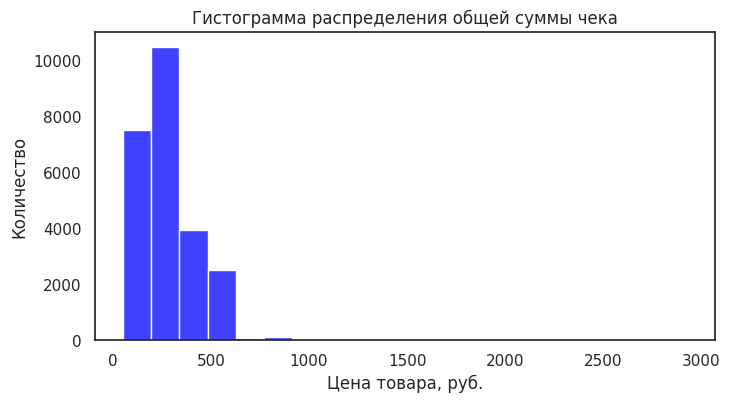

In [142]:
sns.histplot(total_amount, bins=20, color='blue')
plt.title('Гистограмма распределения общей суммы чека')
plt.xlabel('Цена товара, руб.')
plt.ylabel('Количество')
plt.show()

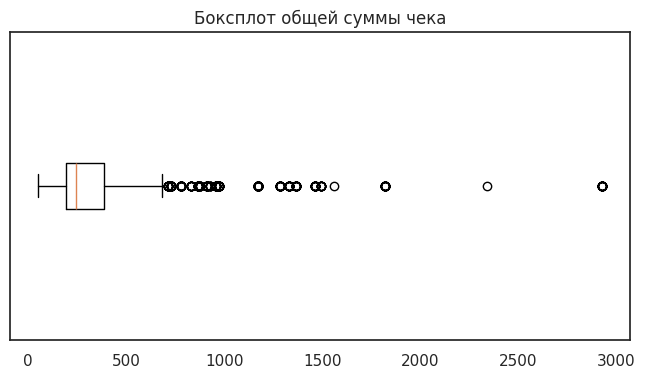

In [143]:
plt.boxplot(total_amount, vert=False)
sns.set_style("white")
plt.yticks([])
plt.ylabel('', fontsize=12, labelpad=10)
plt.title('Боксплот общей суммы чека')
plt.show()

Распределение показателя 'Общая сумма чека' сохраняет схожую конфигурацию с базовым показателем ‘Цена за единицу товара’ - видно наличие значимого разрыва, обусловленного присутствием товара с экстремально высокой стоимостью.

Рассморим подробнее те товары, которые находятся выше 90-й процентиля

In [144]:
filtered_df=df_copy[total_amount>total_amount.quantile(0.90)].sort_values(by='Общая сумма чека', ascending=False)
filtered_df[['Название товара', 'Общая сумма чека','Количество']]
unique_values = filtered_df[['Название товара', 'Общая сумма чека','Количество']].drop_duplicates()
unique_values

Название товара  Общая сумма чека  Количество
11678                  Civet Cat           2925.00           1
11006        Brazilian - Organic           2340.00           2
16072    I Need My Bean! T-shirt           1820.00           1
10266        Organic Decaf Blend           1820.00           1
11798  I Need My Bean! Diner mug           1560.00           2
...                          ...               ...         ...
23922                   Latte Rg            552.50           2
57       Morning Sunrise Chai Lg            520.00           2
21324               Ginger Scone            516.75           3
19734   Spicy Eye Opener Chai Rg            497.25           3
11614  Sustainably Grown Organic            494.00           1

[65 rows x 3 columns]

* Виден так же значительный разброс от 494 до 2925 единиц

* Принимаем решение о сегментировании суммы чека на четыре группы:
   *  Базовые чеки ( до 500 единиц)
   * Средние чеки ( от 500 до 1000 единиц)
   * Высокие чеки ( От 1000 до 2000 единиц)
   * Премиум чеки ( свыше 2000 единиц)

In [145]:
# Создание сегментов на основе суммы чека
def segment_checks(total_amount):
    if total_amount <= 500:
        return 'Базовые чеки (0-500 руб.)'
    elif total_amount > 500 and total_amount <= 1000:
        return 'Средние чеки (500-1000 руб.)'
    elif total_amount > 1000 and total_amount < 2000:
        return 'Высокие чеки (1000-2000 руб.)'
    else:
        return 'Премиум чеки (2000+ руб.)'

# Применение сегментации
df['Сегмент_чека'] = df['Общая сумма чека'].apply(segment_checks)

# Анализ сегментов
segment_analysis = df.groupby('Сегмент_чека').agg({
    'ID операции': 'count',
    'Общая сумма чека': ['sum', 'mean', 'median']
}).round(2)

segment_analysis.columns = ['Количество_чеков', 'Общая_выручка', 'Средняя_сумма', 'Медианная_сумма']
segment_analysis['Доля_от_общего_количества'] = (segment_analysis['Количество_чеков'] / segment_analysis['Количество_чеков'].sum() * 100).round(2)
segment_analysis['Доля_от_общей_выручки'] = (segment_analysis['Общая_выручка'] / segment_analysis['Общая_выручка'].sum() * 100).round(2)

print(segment_analysis)

                               Количество_чеков  Общая_выручка  Средняя_сумма  \
Сегмент_чека                                                                    
Базовые чеки (0-500 руб.)                 23004      6127791.8         266.38   
Высокие чеки (1000-2000 руб.)               167       229911.5        1376.72   
Премиум чеки (2000+ руб.)                    24        90090.0        3753.75   
Средние чеки (500-1000 руб.)               1657       998208.9         602.42   

                               Медианная_сумма  Доля_от_общего_количества  \
Сегмент_чека                                                                
Базовые чеки (0-500 руб.)               243.75                      92.56   
Высокие чеки (1000-2000 руб.)          1329.25                       0.67   
Премиум чеки (2000+ руб.)              2925.00                       0.10   
Средние чеки (500-1000 руб.)            585.00                       6.67   

                               Доля_от_общей_выруч

* Доминирующий сегмент - базовые чеки ( около 93 %) , доля выручки - 82,55 %, обеспечивают стабильный поток клиентов
* Средние чеки составляют 6,67 %, доля выручки - 13,45 % при небольшом количестве транзакий дают существенный вклад в выручку
* Высокие чеки составляют 0,67 % , доля выручки - 3,10 %
* Премиум чеки составляют 0,09 % , доля выручки 0 0,9 %
* Высокие и премиум-чеки имеют низкую представленность, но формируют существенную среднюю сумму


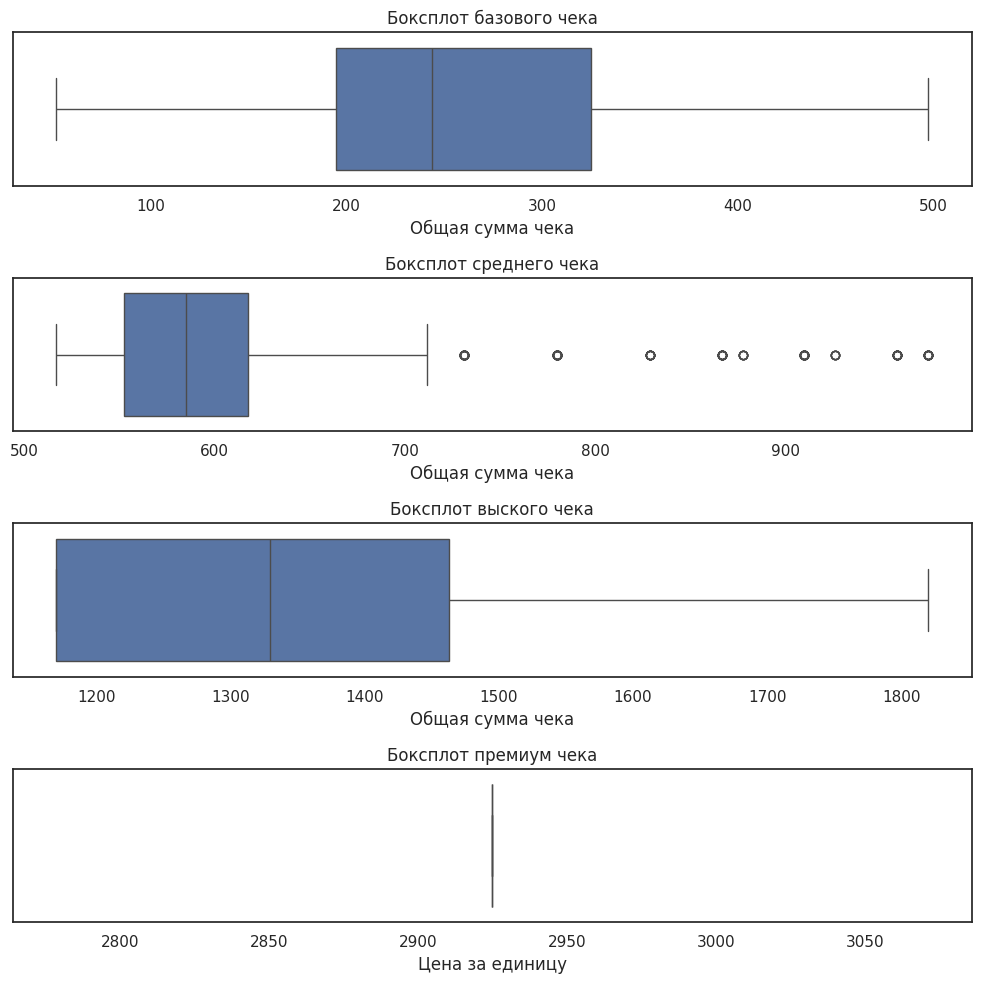

In [146]:
# Создаём фигуру с 3 осями
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))

# Разделяем данные на сегменты
basic_check = total_amount[total_amount <= 500]
avg_check = total_amount[(total_amount > 500) & (total_amount <= 1000)]
high_check = total_amount[(total_amount > 1000) & (total_amount <= 2000)]
premium_check = price[price > 2000]

plt.xlabel('')
plt.ylabel('')
ax.set_xlabel('')

# Боксплот для основного сегмента
sns.boxplot(x=basic_check, ax=ax1, orient='h')
ax1.set_title('Боксплот базового чека')

# Боксплот для среднего сегмента
sns.boxplot(x=avg_check, ax=ax2, orient='h')
ax2.set_title('Боксплот среднего чека')

# Боксплот для высокого сегмента
sns.boxplot(x=high_check, ax=ax3, orient='h')
ax3.set_title('Боксплот выского чека')

# Боксплот для премиум сегмента
sns.boxplot(x=premium_check, ax=ax4, orient='h')
ax4.set_title('Боксплот премиум чека')

# Настройка стиля и отображение графиков
sns.set_style("white")
plt.tight_layout()
plt.show()

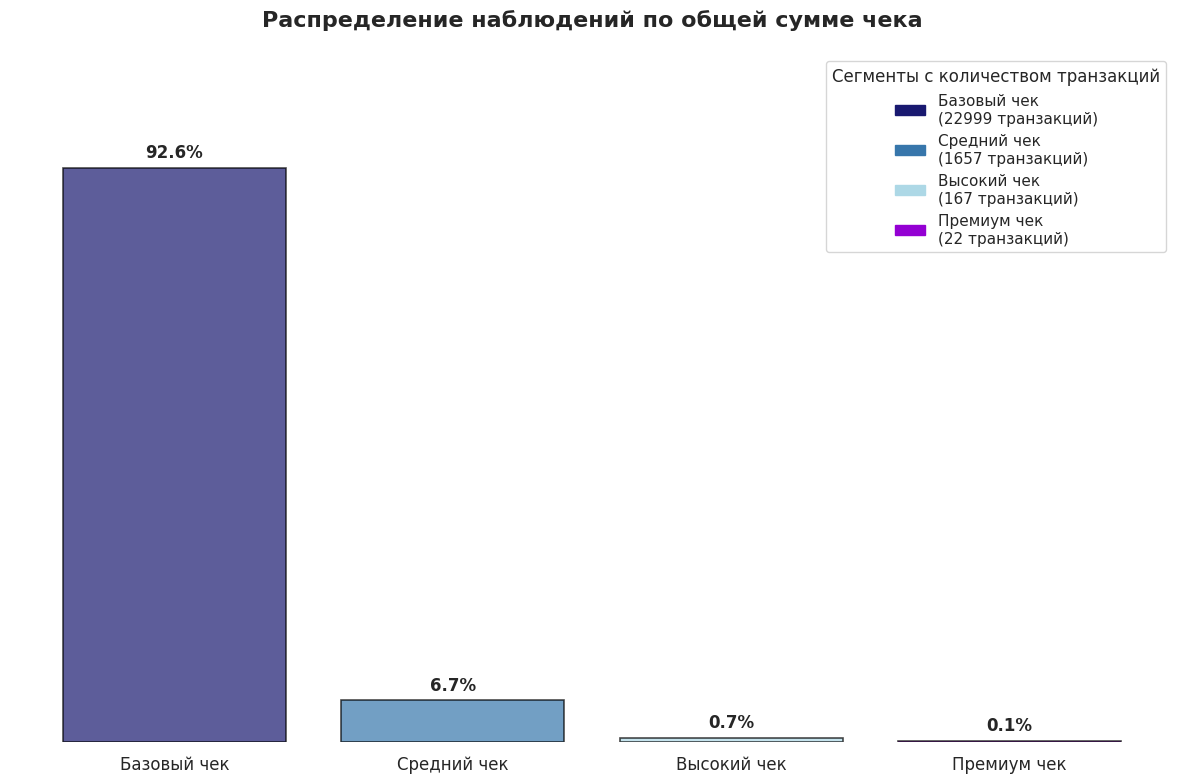

In [147]:


plt.figure(figsize=(12, 8))


sns.set_style("white")

segments = [basic_check,avg_check,high_check,premium_check]
segment_names = ['Базовый чек', 'Средний чек', 'Высокий чек','Премиум чек']
colors = ['#191970', '#3776ab', '#ADD8E6','#9400D3']


total_count = len(total_amount)


for i, (segment, name, color) in enumerate(zip(segments, segment_names, colors)):

    percent = len(segment) / total_count * 100

    plt.bar(i, percent, color=color, alpha=0.7, edgecolor='black', linewidth=1.2)


    plt.annotate(f'{percent:.1f}%',
                xy=(i, percent),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold')


plt.xticks(range(len(segment_names)), segment_names, fontsize=12)
plt.xlabel('', fontsize=12, labelpad=10)


plt.yticks([])
plt.ylabel('', fontsize=12, labelpad=10)
plt.ylim(0, max([len(seg) / total_count * 100 for seg in segments]) * 1.2)


legend_labels = [f'{name}\n({len(seg)} транзакций)' for name, seg in zip(segment_names, segments)]
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colors],
           labels=legend_labels,
           title='Сегменты с количеством транзакций',
           loc='best')

sns.despine(left=True, bottom=True)
plt.title('Распределение наблюдений по общей сумме чека', fontsize=16, fontweight='bold', pad=20)
plt.grid(False)
plt.tight_layout()
plt.show()

In [148]:
# коэффициенты ассиметрии и эксцесса
skew = total_amount.skew()
kurtosis = age.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 4.952723218295209
Коэффициент эксцесса: -1.2071866113302654


In [149]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино
from scipy.stats import normaltest
# Подготовка данных
age_data = df_copy['Общая сумма чека'].dropna()

# Проверка на нормальность
stat, p_value = stats.normaltest(age_data)

print("="*50)
print("ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВА ПРОДАННЫХ ТОВАРОВ")
print("="*50)
print(f"Критерий Д'Агастино: K² = {stat:.3f}")
print(f"p-value = {p_value:.6f}")

# Интерпретация
alpha = 0.05
if p_value > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")

ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВА ПРОДАННЫХ ТОВАРОВ
Критерий Д'Агастино: K² = 25651.441
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


**Выводы:**
1.  Структура чеков
    * Базовые чеки: 92.6% всех транзакций (22,999 транзакций)

   * Средние чеки: 6.7% транзакций (1,657 транзакций)

   * Высокие чеки: 0.7% транзакций (167 транзакций)

   * Премиум чеки: 0.1% транзакций (22 транзакции)
2.  Подавляющее большинство транзакций (92.6%) приходится на базовый ценовой сегмент, что свидетельствует о ориентации бизнеса на массового потребителя  
3. Премиум сегмент практически отсутствует (всего 0.1%)
4. Низкая доля среднего и высокого сегментов - всего 7.4% транзакций
5. Коэффициент ассиметрии: 4.95 - Сильная положительная асимметрия (правостороннее распределение), т.е. большинство данных сосредоточено в левой части
6. Коэффициент эксцесса: -1.2 - данные более равномерно распределены по разным значениям
7. pvalue меньше уровня значимости 0,05 и практически равен нулю,т.е гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса

## 4.3.Взаимосвязь количественных признаков

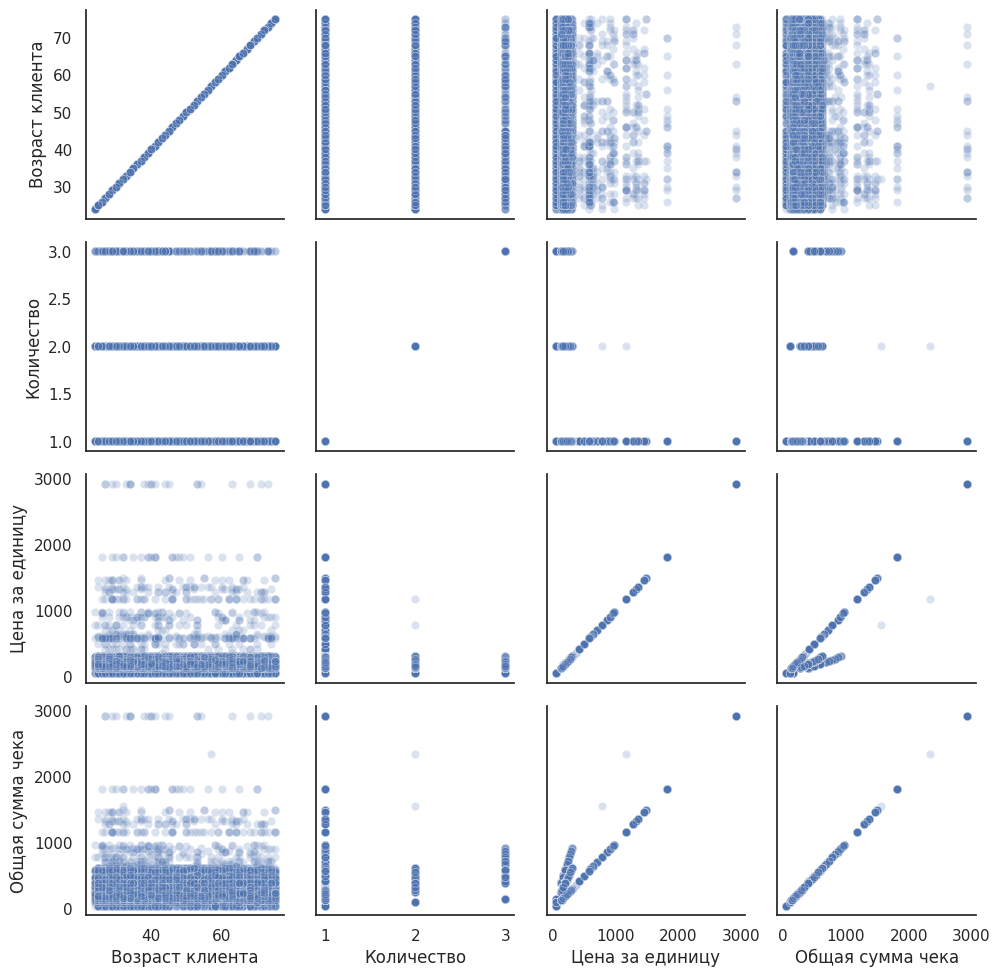

In [150]:
g = sns.PairGrid(df_copy[['Возраст клиента', 'Количество', 'Цена за единицу','Общая сумма чека']])
g.map(sns.scatterplot, alpha=0.2)
plt.show()

На основании визуального анализа данных можно констатировать наличие прямой зависимости между показателями «Общая сумма чека» и «Цена за единицу товара».

Статистическое подтверждение данной взаимосвязи является избыточным, поскольку логическая связь между показателями очевидна.

Рассмотрим взаимосвязи остальных показателей

### 'Возраст клиента' - 'Общая сумма чека'

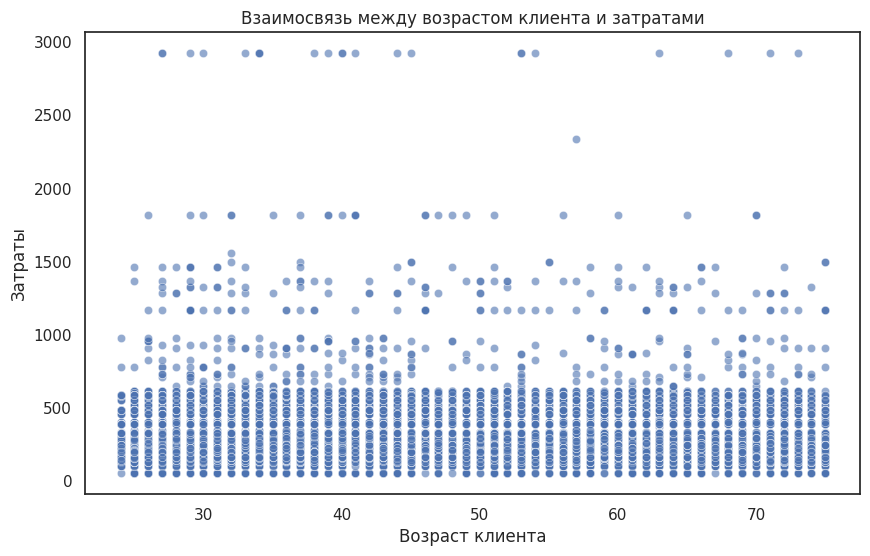

Средние затраты по возрастным группам:
                       mean   median  count
Возраст клиента                            
24               294.052778  243.750    180
25               295.355251  243.750    657
26               295.665649  243.750    655
27               302.571429  243.750    728
28               293.194051  243.750    664
29               309.193593  243.750    718
30               301.351974  243.750    684
31               297.626917  260.000    587
32               308.451431  260.000    664
33               289.589648  243.750    710
34               295.826519  243.750    790
35               296.147452  243.750    628
36               302.594803  243.750    558
37               303.608607  243.750    610
38               293.505071  243.750    562
39               306.664851  243.750    505
40               292.213908  243.750    568
41               316.415517  260.000    551
42               293.738583  243.750    508
43               288.369401  243.750 

In [151]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Возраст клиента', y='Общая сумма чека', data=df_copy, alpha=0.6)
plt.title('Взаимосвязь между возрастом клиента и затратами')
plt.xlabel('Возраст клиента')
plt.ylabel('Затраты')
plt.show()


df['Возрастная группа'] = pd.cut(df['Возраст клиента'],
                                 bins=[0, 25, 35, 45, 55, 65, 100],
                                 labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

age_group_spending = df_copy.groupby('Возраст клиента')['Общая сумма чека'].agg(['mean', 'median', 'count'])
print("Средние затраты по возрастным группам:")
print(age_group_spending)

Для проверки нормальности распределения применим тест Д’Агостино

In [152]:
from scipy import stats

# Проверка для "Возраст клиента"
age_test = stats.normaltest(df_copy['Возраст клиента'])
print(f"Возраст клиента: statistic={age_test.statistic}, pvalue={age_test.pvalue}")

# Проверка для "Общая сумма чека"
amount_test = stats.normaltest(df_copy['Общая сумма чека'])
print(f"Общая сумма чека: statistic={amount_test.statistic}, pvalue={amount_test.pvalue}")

Возраст клиента: statistic=23727.604145731108, pvalue=0.0
Общая сумма чека: statistic=25651.441264821508, pvalue=0.0


p-value ≤ 0.05 — данные распределены ненормально, значит для сравнения групп используем ранговый коэффициент корреляции Спирмена

In [153]:
df_copy[['Возраст клиента','Общая сумма чека']].corr(method = 'spearman')

Возраст клиента  Общая сумма чека
Возраст клиента          1.000000         -0.006033
Общая сумма чека        -0.006033          1.000000

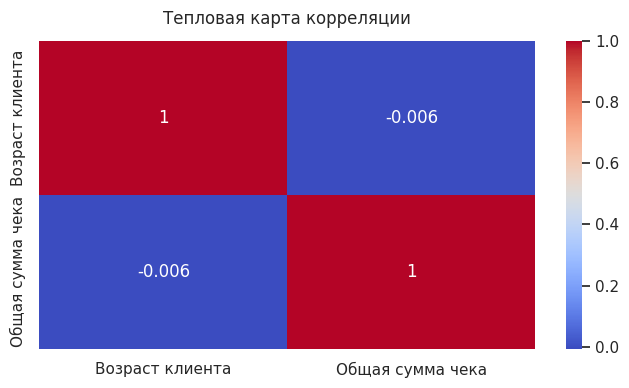

In [154]:
hm = sns.heatmap(df_copy[['Возраст клиента','Общая сумма чека']].corr(method = 'spearman'),annot=True, cmap= 'coolwarm')
hm.set_title('Тепловая карта корреляции', fontdict={'fontsize':12}, pad=12)
plt.show()

In [155]:
# Гипотеза Н0: корреляция статистически незначима и связи между признаками нет.
# Гипотеза Н1: корреляция статистически значима и есть связь между признаками.
scipy.stats.spearmanr(df_copy['Возраст клиента'], df_copy['Общая сумма чека'])

SignificanceResult(statistic=np.float64(-0.0060327189016636095), pvalue=np.float64(0.341667832016218))

In [156]:
# p-value больше уровня значимости 0,05.
# Принимаем H0 о том,что связь между признаками статистически не значима.

**Выводы:**
1. На основании анализа средних затрат по возрастным группам можно сказать, что затраты варьируются от 243.750 до 319.538, что свидетельствует о небольших различиях в расходах между возрастными группами

2. Наибольшие средние затраты наблюдаются в возрастных группах 29, 41, 46, 63 и 64 года, что может указывать на особенности поведения этих групп или специфику их покупок.

3. Наименьшие средние затраты характерны для возрастных групп 24, 33, 67 и 74 года.

4. Значение количественной корреляции Спирмена составляет -0.006, что близко к 0, что указывает на практически полное отсутствие линейной связи между этими переменными, т.е. возраст клиента не влияет на сумму чека ( о чем свидетельствует значение коэффициента кореляции Спирмена, а также результаты теста Спирмена на взаимосвязь признаков (p-value больше уровня значимости 0,05))

5. pvalue > 0,05, принимаем гипотезу Н0: корреляция статистически незначима и связи между признаками нет

6. Рекомендуется рассмотреть распределение признаков с учетом половой принадлежности.

### 'Возраст клиента' - 'Общая сумма чека' - 'Пол клиента'

В рамках дальнейшего статистического анализа принимается решение об исключении наблюдений с неуказанным значением признака «Пол клиента»

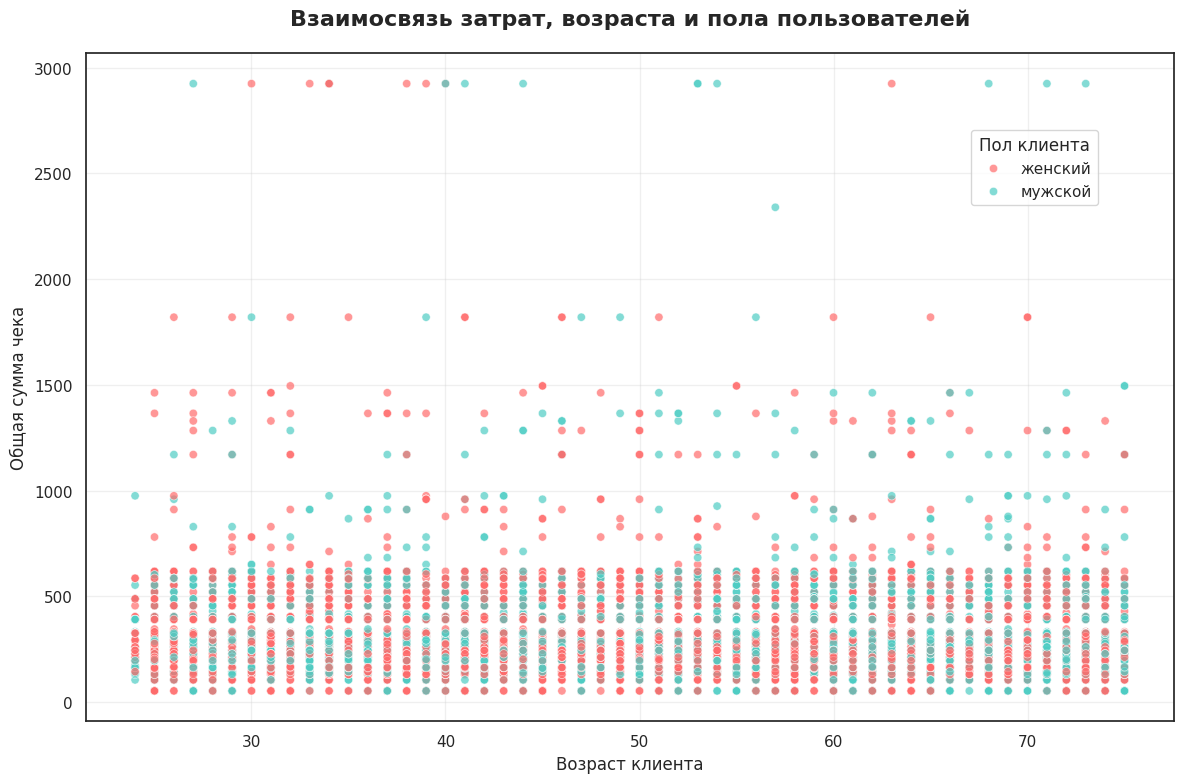

In [157]:
# Фильтруем данные, исключая категорию "не указан"
filtered_data = df_copy[df_copy['Пол клиента'] != 'не указан']


plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='Возраст клиента', y='Общая сумма чека', hue='Пол клиента', alpha=0.7, palette=['#FF6B6B', '#4ECDC4'])
plt.title('Взаимосвязь затрат, возраста и пола пользователей', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Возраст клиента', fontsize=12)
plt.ylabel('Общая сумма чека', fontsize=12)
plt.legend(title='Пол клиента', title_fontsize=12, fontsize=11, loc='upper right', borderaxespad=5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы:**
1. Наибольшие затраты наблюдаются в возрастной группе 40–50 лет
2. По диаграмме рассеяния с учетом введения полового признака линейной связи не прослеживается.
3. Рекомендуется рассмотреть возраст не как количественный признак, а как категориальный, объединив значения в категории: 24-39 (молодые клиенты), 40-59 (зрелые клиенты),60-75 (пожилые клиенты)

### 'Количество проданных товаров' -'Oбщая сумма чека'

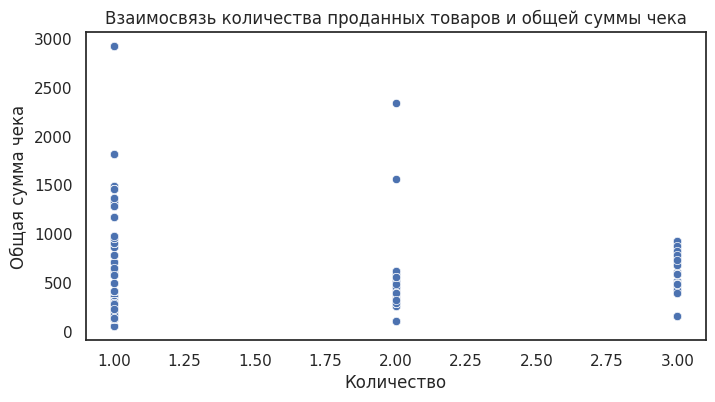

In [158]:
sns.scatterplot(data=df_copy, x='Количество', y='Общая сумма чека')
plt.title('Взаимосвязь количества проданных товаров и общей суммы чека')
plt.show()

Для проверки нормальности распределения применим тест Д’Агостино

In [159]:
from scipy import stats

# Проверка для "Количество проданных товаров"
age_test = stats.normaltest(df_copy['Количество'])
print(f"Количество проданных товаров: statistic={age_test.statistic}, pvalue={age_test.pvalue}")

# Проверка для "Общая сумма чека"
amount_test = stats.normaltest(df_copy['Общая сумма чека'])
print(f"Общая сумма чека: statistic={amount_test.statistic}, pvalue={amount_test.pvalue}")

Количество проданных товаров: statistic=6842.984327126942, pvalue=0.0
Общая сумма чека: statistic=25651.441264821508, pvalue=0.0


p-value ≤ 0.05 — данные распределены ненормально, значит для сравнения групп используем ранговый коэффициент корреляции Спирмена

In [160]:
df_copy[['Количество', 'Общая сумма чека']].corr(method = 'spearman')

Количество  Общая сумма чека
Количество          1.000000          0.723586
Общая сумма чека    0.723586          1.000000

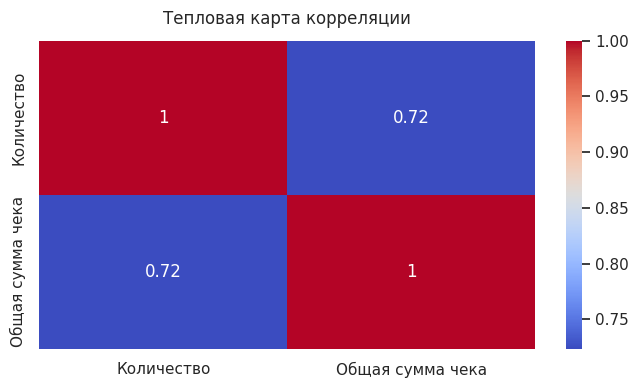

In [161]:
hm = sns.heatmap(df_copy[['Количество', 'Общая сумма чека']].corr(method = 'spearman'),annot=True, cmap= 'coolwarm')
hm.set_title('Тепловая карта корреляции', fontdict={'fontsize':12}, pad=12)
plt.show()

In [162]:
# Гипотеза Н0: корреляция статистически незначима и связи между признаками нет.
# Гипотеза Н1: корреляция статистически значима и есть связь между признаками.
scipy.stats.spearmanr(df_copy['Количество'], df_copy['Общая сумма чека'])

SignificanceResult(statistic=np.float64(0.723585754488353), pvalue=np.float64(0.0))

* p-value меньше уровня значимости 0,05.
* Принимаем H0 о том,что связь между признаками статистически значима.

**Выводы:**
* Коэффициент корреляции составляет 0.72 , что указывает на сильную положительную корреляцию. Это означает, что с увеличением количества покупок растет и общая сумма чека, что логически вполне очевидно



## 4.4. Взаимосвязь количественных и категориальных признаков

### 'Возраст клиента' - 'Пол'

In [163]:
# Фильтруем данные, исключая категорию "не указан"
filtered_data = df_copy[df_copy['Пол клиента'] != 'не указан']
filtered_data.groupby('Пол клиента')['Возраст клиента'].describe()

count       mean        std   min   25%   50%   75%   max
Пол клиента                                                             
женский      10848.0  49.254794  14.886002  24.0  36.0  49.0  62.0  75.0
мужской       8222.0  50.754683  14.755767  24.0  38.0  51.0  64.0  75.0

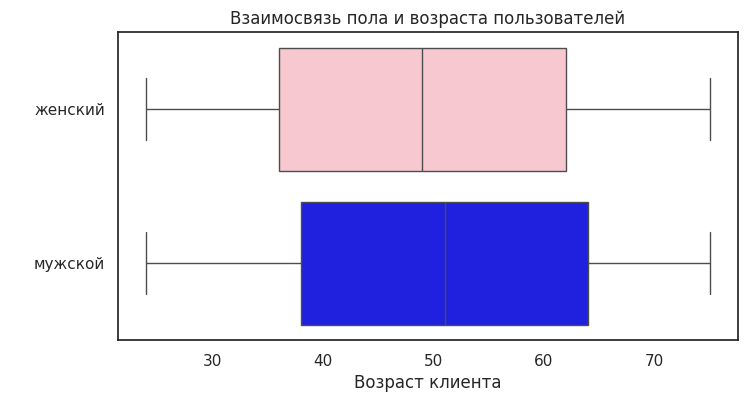

In [164]:
sns.boxplot(
    y='Пол клиента',
    x='Возраст клиента',
    data=filtered_data,
    hue='Пол клиента',
    palette=['#FFC0CB', '#0000FF']
)
plt.ylabel(' ', fontsize=12)
plt.title('Взаимосвязь пола и возраста пользователей')
plt.show()

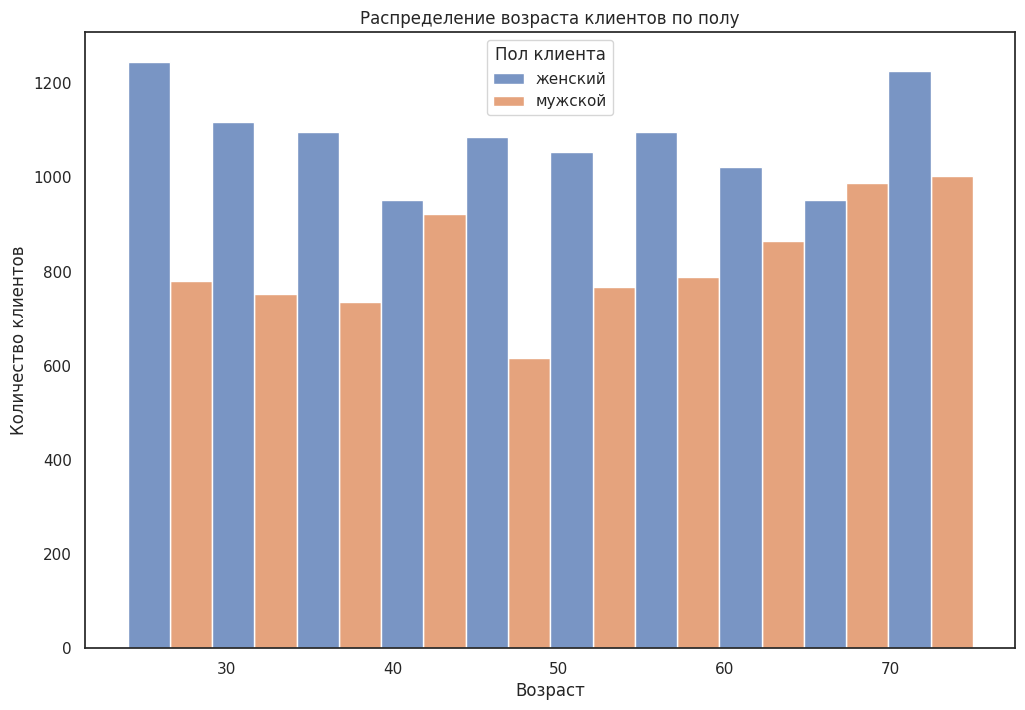

In [165]:
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data, x='Возраст клиента', hue='Пол клиента', multiple='dodge', binwidth=5)
plt.title('Распределение возраста клиентов по полу')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

* Визуально распределение между мужчинами и женщинами выглядит относительно равномерным

* И мужчины, и женщины демонстрируют похожее распределение по возрастам

In [166]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино
from scipy.stats import normaltest
# Подготовка данных
sex_male = filtered_data[filtered_data['Пол клиента'] == 'мужской']['Возраст клиента']
sex_female = filtered_data[filtered_data['Пол клиента'] == 'женский']['Возраст клиента']

# Проверка на нормальность для мужчин
stat_male, p_value_male = stats.normaltest(sex_male.dropna())

print("=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===")
print("\n--- МУЖСКОЙ ПОЛ ---")
print(f"Критерий Д'Агастино: K² = {stat_male:.3f}")
print(f"p-value = {p_value_male:.6f}")

# Интерпретация для мужчин
alpha = 0.05
if p_value_male > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")

# Проверка на нормальность для женщин
stat_female, p_value_female = stats.normaltest(sex_female.dropna())

print("\n--- ЖЕНСКИЙ ПОЛ ---")
print(f"Критерий Д'Агастино: K² = {stat_female:.3f}")
print(f"p-value = {p_value_female:.6f}")

# Интерпретация для женщин
if p_value_female > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")



=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===

--- МУЖСКОЙ ПОЛ ---
Критерий Д'Агастино: K² = 10734.688
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)

--- ЖЕНСКИЙ ПОЛ ---
Критерий Д'Агастино: K² = 10265.601
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


* p-value по всем выборкам меньше уровня значимости 0,05, следовательно отвергаем гипотезу H0, принимаем гипотезу H1,
* т.е. выборки не принадлежат нормальной генеральной совокупности.
* Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [167]:
# Проверим связь пола и возраста с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(filtered_data[filtered_data['Пол клиента']=='мужской']['Возраст клиента'],filtered_data[filtered_data['Пол клиента']=='женский']['Возраст клиента'])

MannwhitneyuResult(statistic=np.float64(47202270.0), pvalue=np.float64(4.4062042803847806e-12))

* Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
* Данное отличие является статистически значимым.
* Соответственно возраст клиентов кофеен отличается в зависимости от половой принадлежности.

**Выводы:**
1. Распределение возраста как среди мужчин, так и среди женщин не соответствует нормальному закону

2. И мужчины, и женщины демонстрируют похожее распределение по возрастам

3. Медианное значение возраста мужчин составляет 51 лет, а женщин 49 лет.

4. Несмотря на небольшую разницу в медианах взаимосвязь пола и возраста пользователей является статистически значимой, т.е. возраст пользователей клиентов кофеен отличается в зависимости от половой принадлежности.

5. Рекомендуется рассмотреть возраст, объединив значения в категории.

### 'Возраст клиента' - 'Пол' - 'Город магазина'

In [168]:
filtered_data[filtered_data['Город магазина'].isin(filtered_data['Город магазина'])].groupby('Город магазина')['Возраст клиента'].describe()

count       mean        std   min   25%   50%   75%   max
Город магазина                                                              
Москва           11548.0  49.945618  14.794250  24.0  37.0  51.0  63.0  75.0
Санкт-Петербург   7522.0  49.833688  14.931368  24.0  37.0  50.0  63.0  75.0

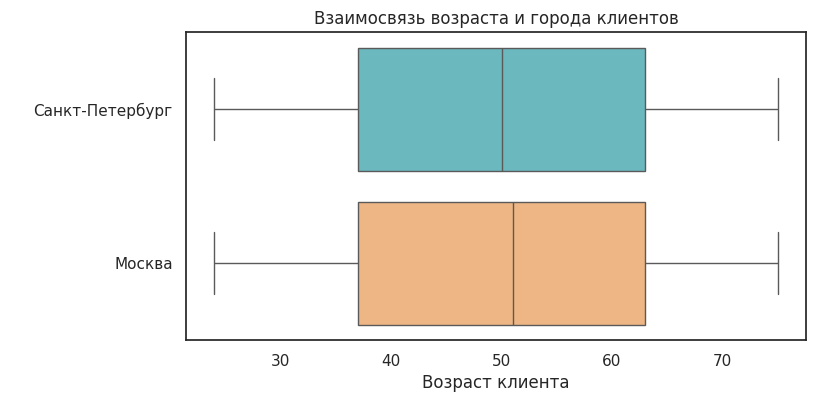

In [169]:
sns.boxplot(
    y='Город магазина',
    x='Возраст клиента',
    data=filtered_data[filtered_data['Город магазина'].isin(filtered_data['Город магазина'])],
    hue='Город магазина',
    palette=['#5EC4CD', '#FFB573'],
    legend=False
)

plt.ylabel(' ', fontsize=12)
plt.title('Взаимосвязь возраста и города клиентов')
plt.show()

In [170]:
filtered_data[filtered_data['Город магазина'].isin(filtered_data['Город магазина'])].groupby(['Город магазина', 'Пол клиента'])['Возраст клиента'].describe()

count       mean        std   min   25%   50%  \
Город магазина  Пол клиента                                                   
Москва          женский      6552.0  49.176740  14.793151  24.0  36.0  49.0   
                мужской      4996.0  50.953963  14.736480  24.0  38.0  52.0   
Санкт-Петербург женский      4296.0  49.373836  15.027453  24.0  36.0  49.0   
                мужской      3226.0  50.446063  14.782570  24.0  38.0  51.0   

                              75%   max  
Город магазина  Пол клиента              
Москва          женский      62.0  75.0  
                мужской      65.0  75.0  
Санкт-Петербург женский      62.0  75.0  
                мужской      64.0  75.0

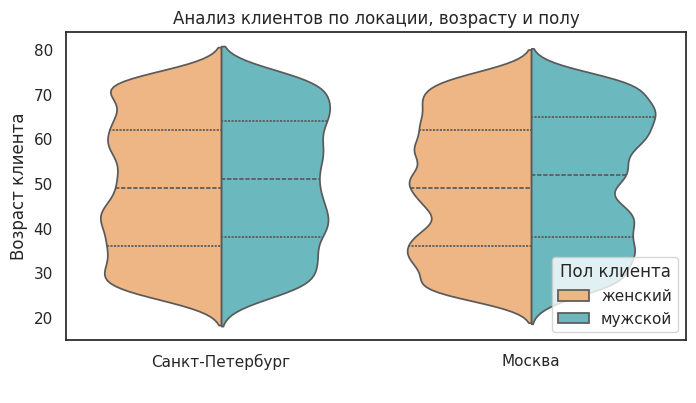

In [171]:
# скрипичная диаграмма
sns.violinplot(data=filtered_data[filtered_data['Город магазина'].isin(filtered_data['Город магазина'])], x='Город магазина', y='Возраст клиента',
               hue='Пол клиента', split=True, inner="quart", palette=['#FFB573','#5EC4CD'])
plt.title('Анализ клиентов по локации, возрасту и полу')
plt.xlabel(' ', fontsize=12)
plt.show()

In [172]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино
from scipy.stats import normaltest
# Подготовка данных
city_piter = filtered_data[filtered_data['Город магазина'] == 'Санкт-Петербург']['Возраст клиента']
city_moscow = filtered_data[filtered_data['Город магазина'] == 'Москва']['Возраст клиента']

# Проверка на нормальность для Питера
city_piter, p_value_piter = stats.normaltest(city_piter.dropna())

print("=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===")
print("\n--- САНКТ-ПЕТЕРБУРГ ---")
print(f"Критерий Д'Агастино: K² = {city_piter:.3f}")
print(f"p-value = {p_value_piter:.6f}")

# Интерпретация для Питера
alpha = 0.05
if p_value_piter > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")

# Проверка на нормальность для Москвы
city_moscow, p_value_moscow = stats.normaltest(city_moscow.dropna())

print("\n--- МОСКВА ---")
print(f"Критерий Д'Агастино: K² = {city_moscow:.3f}")
print(f"p-value = {p_value_moscow:.6f}")

# Интерпретация для Москвы
if p_value_moscow > alpha:
    print("✓ Распределение соответствует нормальному (p > 0.05)")
else:
    print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")

=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===

--- САНКТ-ПЕТЕРБУРГ ---
Критерий Д'Агастино: K² = 7669.507
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)

--- МОСКВА ---
Критерий Д'Агастино: K² = 13728.731
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


* p-value по всем выборкам меньше уровня значимости 0,05.
* Отвергаем гипотезу H0, принимаем гипотезу H1,
* т.е. выборки не принадлежат нормальной генеральной совокупности.
* Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [173]:
# Проверим связь возраста и города проживания с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(
    df_copy[df_copy['Город магазина']=='Санкт-Петербург']['Возраст клиента'],
    df_copy[df_copy['Город магазина']=='Москва']['Возраст клиента']
)


MannwhitneyuResult(statistic=np.float64(82780456.5), pvalue=np.float64(3.4962628458735846e-128))

In [174]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Данное отличие является статистически значимым.
# Соответственно, Различия в возрасте клиентов между Санкт-Петербургом и Москвой крайне значимы

**Выводы:**
1. В Москве и Санкт-Петербурге одинаковый возрастной диапазон клиентов, наибольшая концентрация клиентов в обоих городах приходится на возрастную группу от 40 до 60 лет.

2. В обеих локациях женская аудитория  преобладает над мужской.

3. Разница в количестве женщин и мужчин более выражена в Москве, чем в Санкт-Петербурге.

4. Медианное значение возраста мужчин в Москве составляет 52 года, а женщин 49 лет.

5. Медианное значение возраста мужчин в Санкт-Петербурге составляет 51 года, а женщин 49 лет.

6. Взаимосвязь города и возраста пользователей является статистически значимой, т.е. возраст пользователей клиентов кофеен отличается в зависимости от их города.

### 'Возраст клиента' - 'Категория товара'

In [175]:
df_copy.groupby('Категория товара')['Возраст клиента'].describe()

count       mean        std   min    25%   50%   75%  \
Категория товара                                                            
Bakery              3780.0  46.748942  15.228668  24.0  34.00  44.0  60.0   
Branded               82.0  45.536585  14.594262  24.0  34.25  42.0  55.0   
Coffee              9948.0  47.001910  15.129244  24.0  34.00  44.0  60.0   
Coffee beans         216.0  46.745370  15.053856  24.0  33.00  44.5  61.0   
Drinking Chocolate  1955.0  46.939642  14.781120  24.0  33.50  45.0  59.5   
Flavours             777.0  46.979408  15.437255  24.0  33.00  45.0  61.0   
Loose Tea            155.0  46.335484  16.047121  24.0  32.50  42.0  62.0   
Packaged Chocolate    67.0  46.791045  13.957226  25.0  34.50  45.0  59.5   
Tea                 7866.0  46.379990  15.013803  24.0  33.00  44.0  59.0   

                     max  
Категория товара          
Bakery              75.0  
Branded             75.0  
Coffee              75.0  
Coffee beans        75.0  
Drinking Chocolate  75.0  
Flavours            75.0  
Loose Tea           75.0  
Packaged Chocolate  74.0  
Tea                 75.0

Построим боксплот,где категории товаров отсортированы в порядке убывания медианного возраста покупателей.

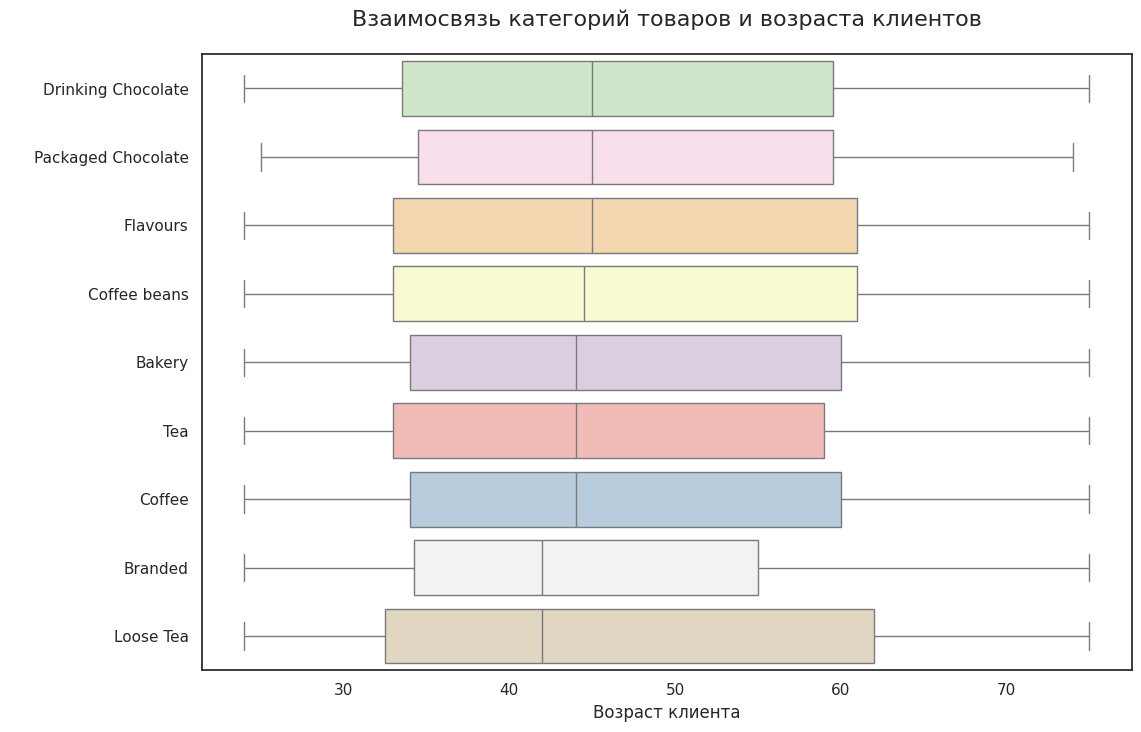

In [176]:

category_order = df_copy.groupby('Категория товара')['Возраст клиента'].median().sort_values(ascending=False).index


n_categories = len(category_order)
colors = sns.color_palette("Pastel1", n_categories)

plt.figure(figsize=(12, 8))
sns.boxplot(y='Категория товара', x='Возраст клиента', data=df_copy,
            order=category_order,
            hue='Категория товара',
            palette=colors,
            legend=False)
plt.title('Взаимосвязь категорий товаров и возраста клиентов', fontsize=16, pad=20)
plt.ylabel(' ', fontsize=12)
plt.xlabel('Возраст клиента', fontsize=12)
plt.show()

In [177]:
import pandas as pd
from scipy.stats import normaltest

for category in df_copy['Категория товара'].unique():

    if len(df_copy[df_copy['Категория товара'] == category]) > 3:
        try:

            _, p_value = normaltest(
                df_copy[df_copy['Категория товара'] == category]['Возраст клиента']
            )
            print(f"Категория: {category}")
            print(f"P-значение: {p_value:.6f}")

            # Интерпретация результата
            if p_value < 0.05:
                print("Распределение НЕ является нормальным")
            else:
                print("Распределение является нормальным")
            print("-" * 40)

        except Exception as e:
            print(f"Ошибка при обработке категории {category}: {e}")
    else:
        print(f"Недостаточно данных для категории {category}")

Категория: Tea
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Coffee
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Drinking Chocolate
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Bakery
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Flavours
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Coffee beans
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Loose Tea
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Packaged Chocolate
P-значение: 0.000019
Распределение НЕ является нормальным
----------------------------------------
Категория: Branded
P-значение: 0

* p-value по всем выборкам меньше уровня значимости 0,05.
* Отвергаем гипотезу H0, принимаем гипотезу H1,
* т.е. выборки не принадлежат нормальной генеральной совокупности.
* Соответственно, будем использовать непараметрический критерий сравнения групп Краскела_Уоллиса ( т.к. необходимо сравнить три и более независимые выборки)

In [178]:
# Проверим связь возраста и категории товара с помощью критерия Краскела_Уоллиса.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.

# соберем все выборки в общий список
data_array = list()
for category in df_copy['Категория товара'].unique():
    data_array.append(df_copy[df_copy['Категория товара']==category]['Возраст клиента'].to_list())

stats.mstats.kruskalwallis(*data_array)

KruskalResult(statistic=np.float64(8.689946782811454), pvalue=np.float64(0.3691229057775791))

**Выводы:**
1. Возрастная сегментация по категориям товаров:
   * Зрелые покупатели предпочитают:
      * Drinking Chocolate
      * Packaged Chocolate
      * Flavours
      * Coffee beans
   * Молодые покупатели предпочитают:
      * Loose Tea
      * Branded
      * Coffee
      * Tea
      * Bakery

2. Значение p-value > 0.05, значит отличия в группах являются статистически не значимым  

3. Нет оснований утверждать, что предпочтения в выборе категорий товаров зависят от возраста покупателей

### 'Общая сумма чека' - 'ID магазина'

In [179]:
df_copy.groupby('ID магазина')['Общая сумма чека'].describe()

count        mean         std   min    25%     50%    75%  \
ID магазина                                                               
3            8593.0  292.695461  164.631092  52.0  195.0  243.75  390.0   
5            8540.0  304.832266  189.275171  52.0  195.0  243.75  390.0   
8            7713.0  298.607876  178.959046  52.0  195.0  243.75  390.0   

                max  
ID магазина          
3            2925.0  
5            2925.0  
8            2925.0

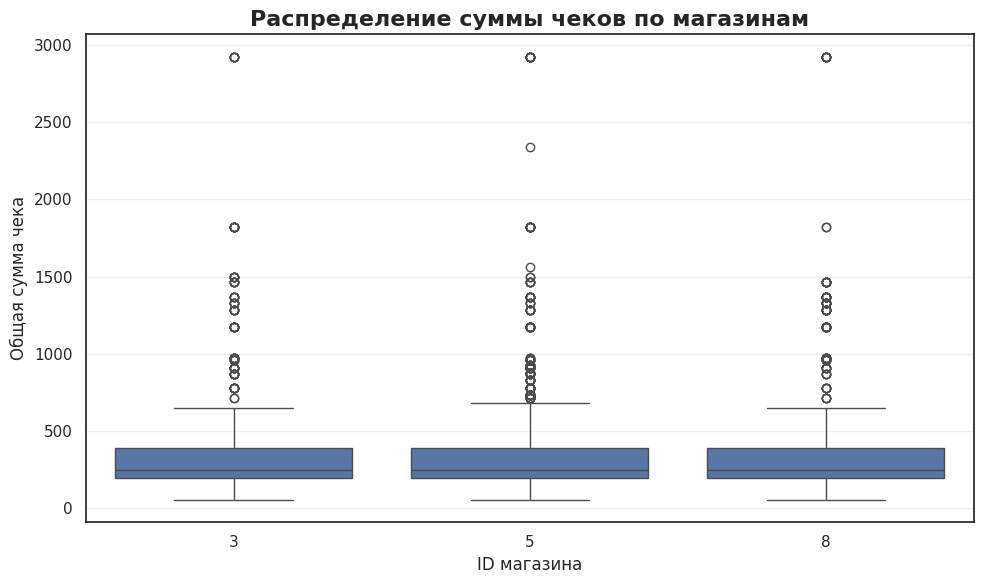

In [180]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.boxplot(data=df_copy, x='ID магазина', y='Общая сумма чека')
plt.title('Распределение суммы чеков по магазинам', fontsize=16, fontweight='bold')
plt.xlabel('ID магазина', fontsize=12)
plt.ylabel('Общая сумма чека', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [181]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино

# Подготовка данных
# Важно: сравниваем с целыми числами, а не со строками
id_3 = df_copy.loc[df_copy['ID магазина'] == 3]['Общая сумма чека']
id_5 = df_copy.loc[df_copy['ID магазина'] == 5]['Общая сумма чека']
id_8 = df_copy.loc[df_copy['ID магазина'] == 8]['Общая сумма чека']

def check_normality(data, store_id):
    try:
        k2, p_value = normaltest(data.dropna())
        print(f"\n--- Магазин ID {store_id} ---")
        print(f"Критерий Д'Агастино: K² = {k2:.3f}")
        print(f"p-value = {p_value:.6f}")

        alpha = 0.05
        if p_value > alpha:
            print("✓ Распределение соответствует нормальному (p > 0.05)")
        else:
            print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")
    except Exception as e:
        print(f"Ошибка при проверке нормальности для магазина {store_id}: {e}")

print("=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===")

# Проверка для каждого магазина
check_normality(id_3, 3)
check_normality(id_5, 5)
check_normality(id_8, 8)

=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===

--- Магазин ID 3 ---
Критерий Д'Агастино: K² = 8802.291
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)

--- Магазин ID 5 ---
Критерий Д'Агастино: K² = 8670.306
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)

--- Магазин ID 8 ---
Критерий Д'Агастино: K² = 8169.761
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


* p-value по всем выборкам меньше уровня значимости 0,05.
* Отвергаем гипотезу H0, принимаем гипотезу H1,
* т.е. выборки не принадлежат нормальной генеральной совокупности.
* Соответственно, будем использовать непараметрический критерий сравнения групп Краскела_Уоллиса ( т.к. необходимо сравнить три и более независимые выборки)

In [182]:

# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.

# соберем все выборки в общий список
data_array = list()
for id_store in df_copy['ID магазина'].unique():
    data_array.append(df_copy[df_copy['ID магазина']==id_store]['Общая сумма чека'].to_list())

stats.mstats.kruskalwallis(*data_array)

KruskalResult(statistic=np.float64(11.584747622121109), pvalue=np.float64(0.0030507317135291243))

**Выводы:**
1. Объем продаж:
   * Магазин 3 имеет наибольшее количество чеков (8593), что указывает на самый высокий трафик клиентов
   * Магазин 5 близок к магазину 3 по количеству чеков (8540)
   * Магазин 8 имеет значительно меньше чеков (7713), что может указывать на меньшую проходимость или популярность
2. Средняя сумма чека:
    * Магазин 5 имеет наибольшую среднюю сумму чека (304.83)
    * Магазин 8 на втором месте по средней сумме чека (298.61)
    * Магазин 3 имеет наименьшую среднюю сумму чека (292.70)
3. Все три магазина имеют одинаковую медиану (243.75)
4. Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
Принимается гипотеза H1.
Отличия в группах являются статистически значимыми.
Соответственно, магазины демонстрируют различное поведение покупателей по сумме чека


### 'Общая сумма чека' -'Город магазина' - 'ID магазина'

In [183]:
df_copy[df_copy['Город магазина'].isin(df_copy['Город магазина'])].groupby('Город магазина')['Общая сумма чека'].describe()

count        mean         std   min    25%     50%    75%  \
Город магазина                                                                 
Москва           16253.0  301.878429  184.472059  52.0  195.0  243.75  390.0   
Санкт-Петербург   8593.0  292.695461  164.631092  52.0  195.0  243.75  390.0   

                    max  
Город магазина           
Москва           2925.0  
Санкт-Петербург  2925.0

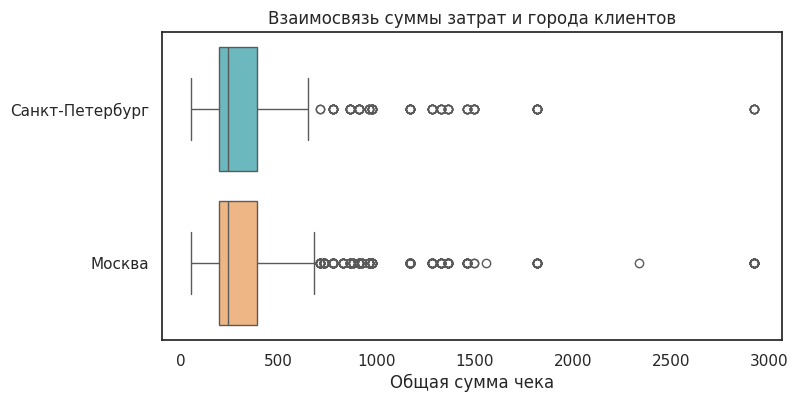

In [184]:
sns.boxplot(
    y='Город магазина',
    x='Общая сумма чека',
    data=df_copy,
    hue='Город магазина',
    palette=['#5EC4CD', '#FFB573'],
    legend=False
)

plt.title('Взаимосвязь суммы затрат и города клиентов')
plt.xlabel('Общая сумма чека')
plt.ylabel('')
plt.show()



In [185]:
df_copy[df_copy['Город магазина'].isin(df_copy['Город магазина'])].groupby(['Город магазина', 'ID магазина'])['Общая сумма чека'].describe()

count        mean         std   min    25%  \
Город магазина  ID магазина                                                
Москва          5            8540.0  304.832266  189.275171  52.0  195.0   
                8            7713.0  298.607876  178.959046  52.0  195.0   
Санкт-Петербург 3            8593.0  292.695461  164.631092  52.0  195.0   

                                50%    75%     max  
Город магазина  ID магазина                         
Москва          5            243.75  390.0  2925.0  
                8            243.75  390.0  2925.0  
Санкт-Петербург 3            243.75  390.0  2925.0

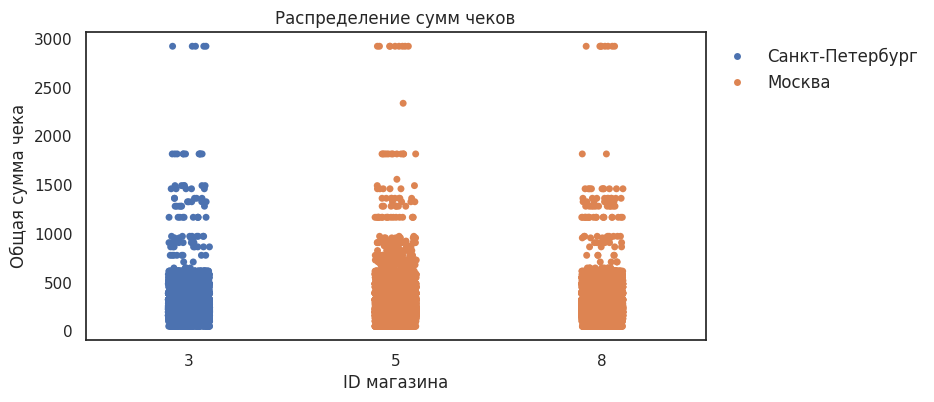

In [186]:
sns.stripplot(
    data=df_copy,
    x='ID магазина',
    y='Общая сумма чека',
    hue='Город магазина',
    jitter=True
)
plt.title('Распределение сумм чеков')
plt.legend(
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1, 1),
    frameon=False
)
plt.show()

In [187]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино

# Подготовка данных

total_piter = df_copy[df_copy['Город магазина'] == 'Санкт-Петербург']['Общая сумма чека']
total_moscow = df_copy[df_copy['Город магазина'] == 'Москва']['Общая сумма чека']

def check_normality(data, sity_id):
    try:
        k2, p_value = normaltest(data.dropna())
        print(f"\n--- Город магазина {sity_id} ---")
        print(f"Критерий Д'Агастино: K² = {k2:.3f}")
        print(f"p-value = {p_value:.6f}")

        alpha = 0.05
        if p_value > alpha:
            print("✓ Распределение соответствует нормальному (p > 0.05)")
        else:
            print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")
    except Exception as e:
        print(f"Ошибка при проверке нормальности для магазина {store_id}: {e}")

print("=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===")

# Проверка для каждого магазина
check_normality(total_piter, 'Санкт-Петербург')
check_normality(total_moscow, 'Москва')


=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===

--- Город магазина Санкт-Петербург ---
Критерий Д'Агастино: K² = 8802.291
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)

--- Город магазина Москва ---
Критерий Д'Агастино: K² = 16784.347
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


* p-value по всем выборкам меньше уровня значимости 0,05.
* Отвергаем гипотезу H0, принимаем гипотезу H1,
* т.е. выборки не принадлежат нормальной генеральной совокупности.
* Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [188]:
# Проверим связь возраста и города проживания с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(
    df_copy[df_copy['Город магазина']=='Санкт-Петербург']['Общая сумма чека'],
    df_copy[df_copy['Город магазина']=='Москва']['Общая сумма чека']
)


MannwhitneyuResult(statistic=np.float64(68207233.0), pvalue=np.float64(0.0024610071494855115))

**Выводы:**
1. Объем продаж:
   * Магазин 3 (Санкт-Петербург) показывает наибольшее количество чеков (8593)
   * Магазин 5 (Москва) близок к лидеру (8540 чеков)
   * Магазин 8 (Москва) имеет значительно меньше чеков (7713)
2. Средняя сумма чека:
   * Магазин 5 (Москва) лидирует по средней сумме чека (304.83)
   * Магазин 8 (Москва) на втором месте (298.61)
   * Магазин 3 (Санкт-Петербург) имеет наименьшую среднюю сумму чека (292.70)   
3. Москва (магазины 5 и 8) имеет более высокие средние чеки, но в Санкт-Петербуре (магазин 3)  наибольшее количество клиентов (8593 чека) и наиболее стабильные показатели (самое низкое стандартное отклонение)
4. Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
Принимается гипотеза H1.
Отличия в группах являются статистически значимыми.
Соответственно, присутствует существенное различие в суммах чеков между двумя городами

### 'Количество проданных товаров' -'Город магазина' - 'ID магазина'

In [189]:
df_copy[df_copy['Город магазина'].isin(df_copy['Город магазина'])].groupby(['Город магазина', 'ID магазина'])['Количество'].describe()

count      mean       std  min  25%  50%  75%  \
Город магазина  ID магазина                                                   
Москва          5            8540.0  1.477869  0.580434  1.0  1.0  1.0  2.0   
                8            7713.0  1.424349  0.494276  1.0  1.0  1.0  2.0   
Санкт-Петербург 3            8593.0  1.401024  0.490134  1.0  1.0  1.0  2.0   

                             max  
Город магазина  ID магазина       
Москва          5            3.0  
                8            2.0  
Санкт-Петербург 3            2.0

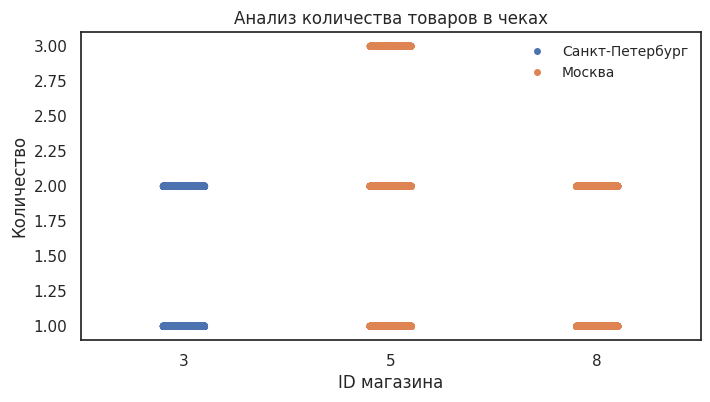

In [190]:
sns.stripplot(
    data=df_copy,
    x='ID магазина',
    y='Количество',
    hue='Город магазина',
    jitter=True
)
plt.title('Анализ количества товаров в чеках')
plt.legend(
    fontsize=10,
        bbox_to_anchor=(1, 1),
    frameon=False
)
plt.show()

In [191]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Д'Агастино, т.к. критерий Шапиро-Уилка работает только на выборках до 5000 наблюдений
#Поэтому для проверки на соответствие выборки нормальной генеральной совокупности используем криетрий Д'Агастино

# Подготовка данных

total_piter = df_copy[df_copy['Город магазина'] == 'Санкт-Петербург']['Количество']
total_moscow = df_copy[df_copy['Город магазина'] == 'Москва']['Количество']

def check_normality(data, sity_id):
    try:
        k2, p_value = normaltest(data.dropna())
        print(f"\n--- Город магазина {sity_id} ---")
        print(f"Критерий Д'Агастино: K² = {k2:.3f}")
        print(f"p-value = {p_value:.6f}")

        alpha = 0.05
        if p_value > alpha:
            print("✓ Распределение соответствует нормальному (p > 0.05)")
        else:
            print("✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)")
    except Exception as e:
        print(f"Ошибка при проверке нормальности для магазина {sity_id}: {e}")

print("=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===")

# Проверка для каждого магазина
check_normality(total_piter, 'Санкт-Петербург')
check_normality(total_moscow, 'Москва')


=== РЕЗУЛЬТАТЫ ПРОВЕРКИ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ===

--- Город магазина Санкт-Петербург ---
Критерий Д'Агастино: K² = 33179.692
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)

--- Город магазина Москва ---
Критерий Д'Агастино: K² = 2101.267
p-value = 0.000000
✗ Распределение НЕ соответствует нормальному (p ≤ 0.05)


* p-value по всем выборкам меньше уровня значимости 0,05.
* Отвергаем гипотезу H0, принимаем гипотезу H1,
* т.е. выборки не принадлежат нормальной генеральной совокупности.
* Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [192]:
# Проверим связь возраста и города проживания с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(
    df_copy[df_copy['Город магазина']=='Санкт-Петербург']['Количество'],
    df_copy[df_copy['Город магазина']=='Москва']['Количество']
)


MannwhitneyuResult(statistic=np.float64(67198388.0), pvalue=np.float64(1.215147638128608e-08))

**Выводы:**
1. Для магазина 5 (Москва):
   * Наибольшее среднее количество позиций в чеках
   *  Наличие чеков с 3 позициями (в других магазинах максимум 2)

2. Оба московских магазина показывают более высокие результаты по сравнению с магазином из Санкт-Петербурга    

3. Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
Принимается гипотеза H1.
Отличия в группах являются статистически значимыми,следовательно различия между количеством позиций в чеках магазинов Санкт-Петербурга и Москвы существенны

### 'Количество проданных товаров' - 'Категория товара' - 'Название товара'

In [193]:
top_n = 1
result = (
    df_copy
    .groupby(['Категория товара', 'Название товара'])
    ['Количество']
    .describe()
    .groupby('Категория товара')
    .head(top_n)
)

result

count      mean       std  min  \
Категория товара   Название товара                                             
Bakery             Almond Croissant           317.0  1.003155  0.056166  1.0   
Branded            I Need My Bean! Diner mug   27.0  1.037037  0.192450  1.0   
Coffee             Brazilian Lg               471.0  1.511677  0.521222  1.0   
Coffee beans       Brazilian - Organic         27.0  1.037037  0.192450  1.0   
Drinking Chocolate Dark chocolate Lg          504.0  1.531746  0.522823  1.0   
Flavours           Carmel syrup               197.0  1.472081  0.549102  1.0   
Loose Tea          Earl Grey                   15.0  1.000000  0.000000  1.0   
Packaged Chocolate Chili Mayan                 17.0  1.000000  0.000000  1.0   
Tea                Earl Grey Lg               461.0  1.537961  0.544909  1.0   

                                              25%  50%  75%  max  
Категория товара   Название товара                                
Bakery             Almond Croissant           1.0  1.0  1.0  2.0  
Branded            I Need My Bean! Diner mug  1.0  1.0  1.0  2.0  
Coffee             Brazilian Lg               1.0  2.0  2.0  3.0  
Coffee beans       Brazilian - Organic        1.0  1.0  1.0  2.0  
Drinking Chocolate Dark chocolate Lg          1.0  2.0  2.0  3.0  
Flavours           Carmel syrup               1.0  1.0  2.0  3.0  
Loose Tea          Earl Grey                  1.0  1.0  1.0  1.0  
Packaged Chocolate Chili Mayan                1.0  1.0  1.0  1.0  
Tea                Earl Grey Lg               1.0  2.0  2.0  3.0

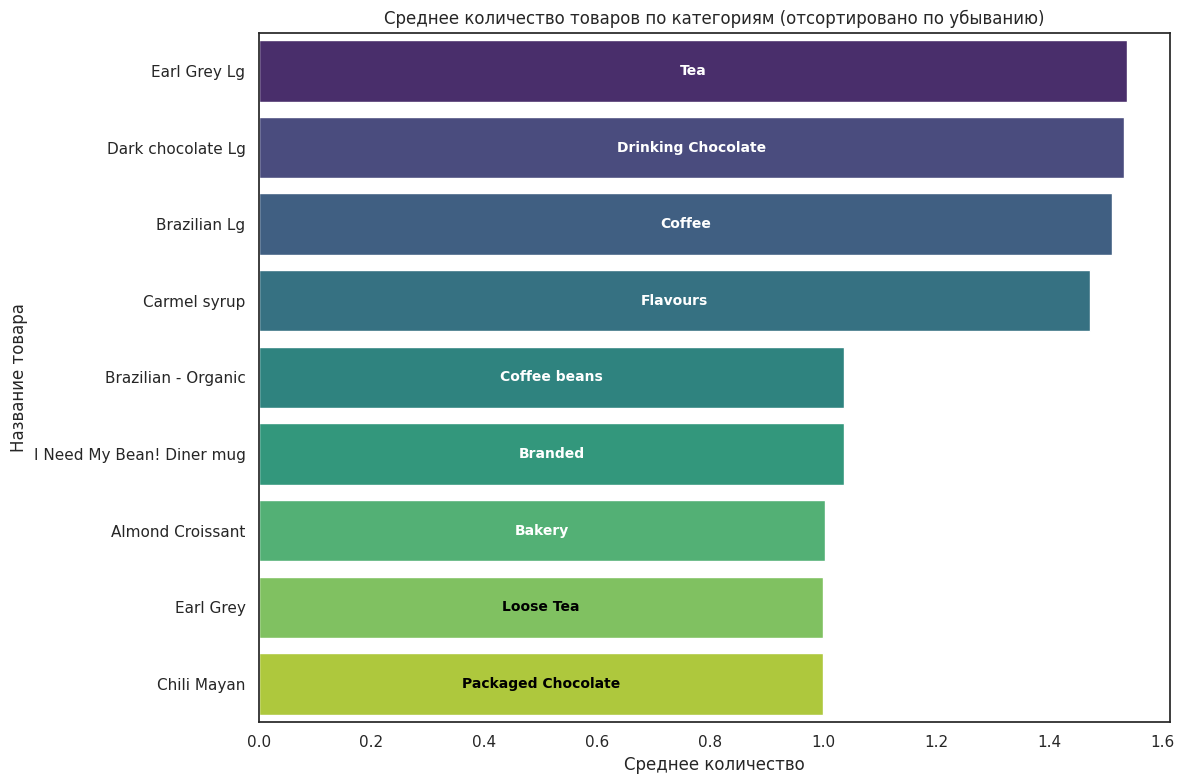

In [194]:
# Сортируем данные по убыванию
sorted_data = result.reset_index().sort_values(
    by='mean',
    ascending=False
)


plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=sorted_data,
    x='mean',
    y='Название товара',
    hue='Категория товара',
    palette='viridis'
)


plt.legend().remove()


categories = sorted_data['Категория товара'].unique()


for container, category in zip(barplot.containers, categories):
    for patch in container.patches:

        width = patch.get_width()
        height = patch.get_height()
        x = patch.get_x() + width / 2
        y = patch.get_y() + height / 2


        text_color = 'white' if patch.get_facecolor()[0] < 0.5 else 'black'

        barplot.text(
            x,
            y,
            category,
            ha='center',
            va='center',
            color=text_color,
            fontsize=10,
            fontweight='bold'
        )

plt.title('Среднее количество товаров по категориям (отсортировано по убыванию)')
plt.xlabel('Среднее количество')
plt.ylabel('Название товара')
plt.tight_layout()
plt.show()

In [195]:
import pandas as pd
from scipy.stats import normaltest

for category in df_copy['Категория товара'].unique():

    if len(df_copy[df_copy['Категория товара'] == category]) > 3:
        try:
            # Выполняем тест Д'Агостино
            _, p_value = normaltest(
                df_copy[df_copy['Категория товара'] == category]['Количество']
            )
            print(f"Категория: {category}")
            print(f"P-значение: {p_value:.6f}")

            # Интерпретация результата
            if p_value < 0.05:
                print("Распределение НЕ является нормальным")
            else:
                print("\033[91mРаспределение является нормальным\033[0m")
            print("-" * 40)

        except Exception as e:
            print(f"Ошибка при обработке категории {category}: {e}")
    else:
        print(f"Недостаточно данных для категории {category}")

Категория: Tea
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Coffee
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Drinking Chocolate
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Bakery
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Flavours
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Coffee beans
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Loose Tea
P-значение: nan
Распределение является нормальным
----------------------------------------
Категория: Packaged Chocolate
P-значение: nan
Распределение является нормальным
----------------------------------------
Категория: Branded
P-значение: 0.000000
Распреде

/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1687: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1792: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False, _no_deco=True)


* p-value по всем выборкам меньше уровня значимости 0,05, но есть исключение
* Две категории (Loose Tea и Packaged Chocolate) показали результат “nan”, это может быть из-за того, что выборка слишком мала для анализа ( выше указана ошибка catastrophic cancellation)
* Для этих категорий используем критерий Шапиро-Уилка и посмотрим результат


In [196]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('Loose Tea', stats.shapiro(df_copy[df_copy['Категория товара']=='Loose Tea']['Количество']))
print('Packaged Chocolate', stats.shapiro(df_copy[df_copy['Категория товара']=='Packaged Chocolate']['Количество']))

Loose Tea ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))
Packaged Chocolate ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Предупреждение «Input data has range zero» означает, что входные данные для теста Шапиро-Уилка имеют нулевой размах (разница между максимальным и минимальным значениями равна нулю). Это может произойти, если все значения в выборке одинаковы

In [197]:
categories = ['Packaged Chocolate', 'Loose Tea']
for category in categories:
    print(f"\nСтатистика для {category}:")
    print(df_copy[df_copy['Категория товара'] == category]['Количество'].describe())


Статистика для Packaged Chocolate:
count    67.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Количество, dtype: float64

Статистика для Loose Tea:
count    155.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Количество, dtype: float64


Так как все наблюдения равны 1 в обеих выборках, то нет статистической вариабельности для анализа, значит тесты не применимы

In [198]:
# Проверим связь возраста и категории товара с помощью критерия Краскела_Уоллиса.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.

# соберем все выборки в общий список
data_array = list()
for category in df_copy['Категория товара'].unique():
    data_array.append(df_copy[df_copy['Категория товара']==category]['Количество'].to_list())

stats.mstats.kruskalwallis(*data_array)

KruskalResult(statistic=np.float64(3381.556024636783), pvalue=np.float64(0.0))

**Выводы:**
1. По популярности товаров поделим на 2 группы:
* Наиболее популярные товары:
   * Dark chocolate Lg (504 покупки)
   * Brazilian Lg (471 покупка)
   * Earl Grey Lg (461 покупка)
* Наименее популярные товары:
   * Earl Grey (15 покупок)
   * Chili Mayan (17 покупок)   
   * I Need My Bean! Diner mug (27 покупок)

2. Среднее количество покупок:
* Товары с высоким средним количеством покупок:

   * Earl Grey Lg (1.54)
   * Dark chocolate Lg (1.53)
   * Brazilian Lg (1.51)
   * Carmel syrup (1.47)

* Товары с низким средним количеством покупок:

   * Almond Croissant (1.00)
   * Earl Grey (1.00)
   * Chili Mayan (1.00)
   * Brazilian - Organic (1.04)
   * I Need My Bean! Diner mug (1.04)

3. Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
Принимается гипотеза H1.
Отличия в группах являются статистически значимыми,следовательно количество проданных товаров существенно варьируется в зависимости от категории товара.

### 'Общая сумма чека' - 'Категория товара' - 'Название товара'

In [199]:
top_n = 1
result = (
    df_copy
    .groupby(['Категория товара', 'Название товара'])
    ['Общая сумма чека']
    .describe()
    .groupby('Категория товара')
    .head(top_n)
)

result

count         mean  \
Категория товара   Название товара                                 
Bakery             Almond Croissant           317.0   244.711672   
Branded            I Need My Bean! Diner mug   27.0   861.851852   
Coffee             Brazilian Lg               471.0   343.906582   
Coffee beans       Brazilian - Organic         27.0  1213.333333   
Drinking Chocolate Dark chocolate Lg          504.0   448.035714   
Flavours           Carmel syrup               197.0    76.548223   
Loose Tea          Earl Grey                   15.0   581.750000   
Packaged Chocolate Chili Mayan                 17.0   866.450000   
Tea                Earl Grey Lg               461.0   299.902386   

                                                       std      min      25%  \
Категория товара   Название товара                                             
Bakery             Almond Croissant           1.410338e+01   243.75   243.75   
Branded            I Need My Bean! Diner mug  2.361516e+02   780.00   780.00   
Coffee             Brazilian Lg               1.185779e+02   227.50   227.50   
Coffee beans       Brazilian - Organic        2.251666e+02  1170.00  1170.00   
Drinking Chocolate Dark chocolate Lg          1.529258e+02   292.50   292.50   
Flavours           Carmel syrup               2.855328e+01    52.00    52.00   
Loose Tea          Earl Grey                  0.000000e+00   581.75   581.75   
Packaged Chocolate Chili Mayan                2.343714e-13   866.45   866.45   
Tea                Earl Grey Lg               1.062572e+02   195.00   195.00   

                                                  50%      75%      max  
Категория товара   Название товара                                       
Bakery             Almond Croissant            243.75   243.75   487.50  
Branded            I Need My Bean! Diner mug   780.00   780.00  1560.00  
Coffee             Brazilian Lg                455.00   455.00   682.50  
Coffee beans       Brazilian - Organic        1170.00  1170.00  2340.00  
Drinking Chocolate Dark chocolate Lg           585.00   585.00   877.50  
Flavours           Carmel syrup                 52.00   104.00   156.00  
Loose Tea          Earl Grey                   581.75   581.75   581.75  
Packaged Chocolate Chili Mayan                 866.45   866.45   866.45  
Tea                Earl Grey Lg                390.00   390.00   585.00

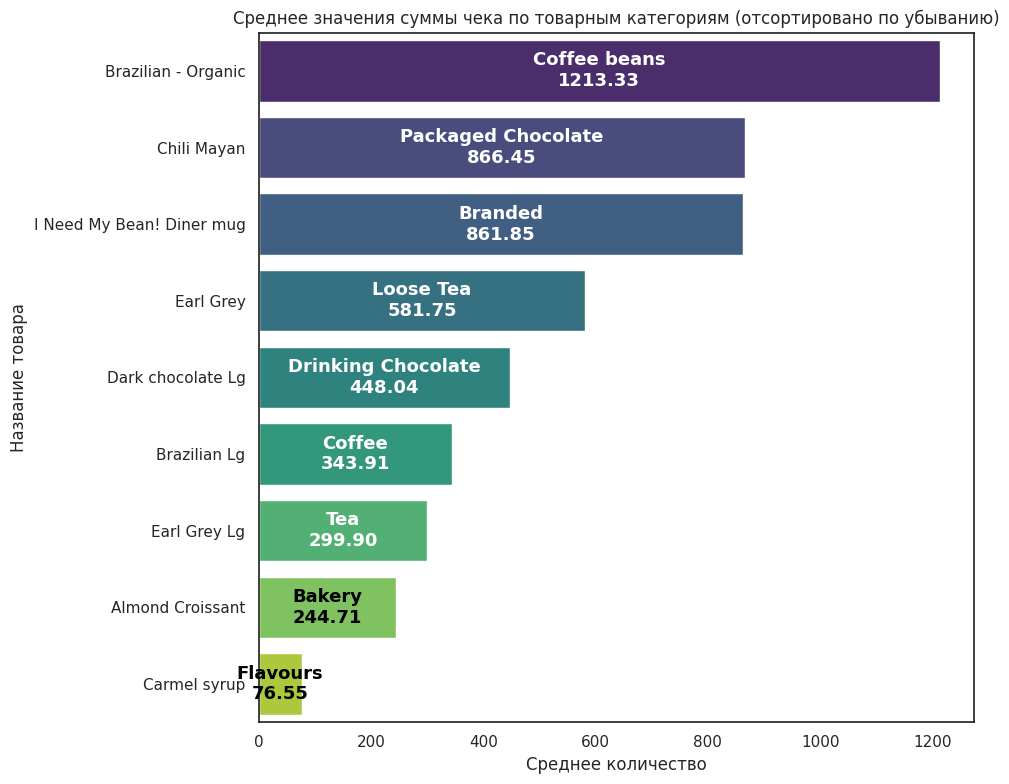

In [200]:

sorted_data = result.reset_index().sort_values(
    by='mean',
    ascending=False
)


plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    data=sorted_data,
    x='mean',
    y='Название товара',
    hue='Категория товара',
    palette='viridis'
)

plt.legend().remove()

categories = sorted_data['Категория товара'].unique()

for container, category in zip(barplot.containers, categories):
    for patch in container.patches:

        width = patch.get_width()
        height = patch.get_height()
        x = patch.get_x() + width / 2
        y = patch.get_y() + height / 2


        value = f'{patch.get_width():.2f}'

        text_color = 'white' if patch.get_facecolor()[0] < 0.5 else 'black'


        barplot.text(
            x,
            y,
            f'{category}\n{value}',
            ha='center',
            va='center',
            color=text_color,
            fontsize=13,
            fontweight='bold'
        )

plt.title('Среднее значения суммы чека по товарным категориям (отсортировано по убыванию)')
plt.xlabel('Среднее количество')
plt.ylabel('Название товара')
plt.tight_layout()
plt.show()

In [201]:
# Анализ для каждой категории отдельно
for category in df['Категория товара'].unique():
    category_data = df[df['Категория товара'] == category]

    print(f"\n--- Анализ для категории: {category} ---")
    print(f"Количество товаров: {category_data['Название товара'].nunique()}")
    print(f"Средняя сумма чека: {category_data['Общая сумма чека'].mean():.2f}")

    # Топ-3 товара по средней сумме чека в категории
    top_in_category = category_data.groupby('Название товара')['Общая сумма чека'].mean().sort_values(ascending=False).head(3)
    print("Топ-3 товара по средней сумме чека:")
    for product, mean_value in top_in_category.items():
        print(f"  {product}: {mean_value:.2f}")


--- Анализ для категории: Tea ---
Количество товаров: 16
Средняя сумма чека: 278.52
Топ-3 товара по средней сумме чека:
  Morning Sunrise Chai Lg: 390.26
  Traditional Blend Chai Lg: 302.46
  Earl Grey Lg: 299.90

--- Анализ для категории: Coffee ---
Количество товаров: 21
Средняя сумма чека: 297.78
Топ-3 товара по средней сумме чека:
  Latte Rg: 414.96
  Cappuccino Lg: 406.70
  Latte: 376.49

--- Анализ для категории: Drinking Chocolate ---
Количество товаров: 4
Средняя сумма чека: 407.35
Топ-3 товара по средней сумме чека:
  Sustainably Grown Organic Lg: 460.13
  Dark chocolate Lg: 448.04
  Sustainably Grown Organic Rg: 368.84

--- Анализ для категории: Bakery ---
Количество товаров: 11
Средняя сумма чека: 235.26
Топ-3 товара по средней сумме чека:
  Scottish Cream Scone : 300.60
  Jumbo Savory Scone: 247.92
  Chocolate Croissant: 246.37

--- Анализ для категории: Flavours ---
Количество товаров: 4
Средняя сумма чека: 81.99
Топ-3 товара по средней сумме чека:
  Sugar Free Vanilla sy

In [202]:
import pandas as pd
from scipy.stats import normaltest

for category in df_copy['Категория товара'].unique():

    if len(df_copy[df_copy['Категория товара'] == category]) > 3:
        try:
            # Выполняем тест Д'Агостино
            _, p_value = normaltest(
                df_copy[df_copy['Категория товара'] == category]['Общая сумма чека']
            )
            print(f"Категория: {category}")
            print(f"P-значение: {p_value:.6f}")

            # Интерпретация результата
            if p_value < 0.05:
                print("Распределение НЕ является нормальным")
            else:
                print("\033[91mРаспределение является нормальным\033[0m")
            print("-" * 40)

        except Exception as e:
            print(f"Ошибка при обработке категории {category}: {e}")
    else:
        print(f"Недостаточно данных для категории {category}")

Категория: Tea
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Coffee
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Drinking Chocolate
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Bakery
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Flavours
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Coffee beans
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Loose Tea
P-значение: 0.000000
Распределение НЕ является нормальным
----------------------------------------
Категория: Packaged Chocolate
P-значение: 0.001077
Распределение НЕ является нормальным
----------------------------------------
Категория: Branded
P-значение: 0

* p-value по всем выборкам меньше уровня значимости 0,05.
* Отвергаем гипотезу H0, принимаем гипотезу H1,
* т.е. выборки не принадлежат нормальной генеральной совокупности.
* Соответственно, будем использовать непараметрический критерий сравнения групп Краскела_Уоллиса.

In [203]:
# Проверим связь возраста и категории товара с помощью критерия Краскела_Уоллиса.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.

# соберем все выборки в общий список
data_array = list()
for category in df_copy['Категория товара'].unique():
    data_array.append(df_copy[df_copy['Категория товара']==category]['Общая сумма чека'].to_list())

stats.mstats.kruskalwallis(*data_array)

KruskalResult(statistic=np.float64(5190.45953632735), pvalue=np.float64(0.0))

**Выводы:**
1. Самый высокий средний чек у категории Coffee beans (1213.33), на втором месте категория Packaged Chocolate (866.45) и завершает тройку лидеров категория Branded (861.85), это говорит о том, что эти категории популярны у клиентов.

2. Самые низкие показатели у категорий Flavours (76.55) и Bakery (244.71).

3. Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
Принимается гипотеза H1.
Следовательно выявлена прямая зависимость между категорией товара и размером среднего чека, которая носит статистически значимый характер.

### 'Выручка' - 'Категория товара'

In [204]:
# Предположим, что данные уже загружены в df_copy
# Ваш код для расчета выручки
df_copy['доля_товара'] = (df_copy['Количество'] * df_copy['Цена за единицу']) / df_copy['Общая сумма чека']
df_copy['выручка_товара'] = df_copy['доля_товара'] * df_copy['Общая сумма чека']

# Группируем по категориям
выручка_по_категориям = df_copy.groupby('Категория товара')['выручка_товара'].sum().reset_index()

# Сортируем по убыванию выручки
выручка_по_категориям = выручка_по_категориям.sort_values('выручка_товара', ascending=False)

# Добавляем дополнительные метрики
выручка_по_категориям['Доля_в_выручке_%'] = (выручка_по_категориям['выручка_товара'] / выручка_по_категориям['выручка_товара'].sum() * 100).round(2)
выручка_по_категориям['Накопленная_доля_%'] = выручка_по_категориям['Доля_в_выручке_%'].cumsum()

In [205]:
v=sum(df_copy['Общая сумма чека'])
v

7421562.2

In [206]:
df_copy.head(5)

ID операции  Количество  Цена за единицу  Общая сумма чека  ID товара  \
0            0           1           162.50            162.50         52   
1            1           2           227.50            455.00         27   
2            2           2           162.50            325.00         46   
3            3           2           162.50            325.00         23   
4            4           1           159.25            159.25         34   

               Название товара Категория товара  ID магазина   Город магазина  \
0    Traditional Blend Chai Rg              Tea            3  Санкт-Петербург   
1                 Brazilian Lg           Coffee            3  Санкт-Петербург   
2        Serenity Green Tea Rg              Tea            3  Санкт-Петербург   
3  Our Old Time Diner Blend Rg           Coffee            3  Санкт-Петербург   
4     Jamaican Coffee River Sm           Coffee            3  Санкт-Петербург   

   ID клиента Пол клиента  Возраст клиента  доля_товара  выручка_товара  
0         558     женский               42          1.0          162.50  
1         781   не указан               34          1.0          455.00  
2         788   не указан               30          1.0          325.00  
3         683     женский               26          1.0          325.00  
4          99     мужской               58          1.0          159.25

In [207]:
выручка_по_категориям

Категория товара  выручка_товара  Доля_в_выручке_%  Накопленная_доля_%
2              Coffee      2962352.25             39.92               39.92
8                 Tea      2190841.25             29.52               69.44
0              Bakery       889266.30             11.98               81.42
4  Drinking Chocolate       796363.75             10.73               92.15
3        Coffee beans       292295.25              3.94               96.09
1             Branded        96590.00              1.30               97.39
6           Loose Tea        92985.75              1.25               98.64
5            Flavours        63076.00              0.85               99.49
7  Packaged Chocolate        37791.65              0.51              100.00

In [210]:
## 2. ABC-АНАЛИЗ

def abc_analysis(df, revenue_col='выручка_товара', category_col='Категория товара'):
    """
    Проводит ABC-анализ на основе выручки по категориям
    """
    df_sorted = df.sort_values(revenue_col, ascending=False).reset_index(drop=True)
    df_sorted['Доля_%'] = (df_sorted[revenue_col] / df_sorted[revenue_col].sum() * 100).round(2)
    df_sorted['Накопленная_доля_%'] = df_sorted['Доля_%'].cumsum()

    # Определяем группы ABC
    conditions = [
        df_sorted['Накопленная_доля_%'] <= 80,
        (df_sorted['Накопленная_доля_%'] > 80) & (df_sorted['Накопленная_доля_%'] <= 95),
        df_sorted['Накопленная_доля_%'] > 95
    ]
    choices = ['A', 'B', 'C']

    df_sorted['ABC_Группа'] = np.select(conditions, choices, default='C')

    return df_sorted

# Применяем ABC-анализ
abc_result = abc_analysis(выручка_по_категориям)

print("="*60)
print("ABC-АНАЛИЗ КАТЕГОРИЙ ТОВАРОВ")
print("="*60)
print(abc_result[['Категория товара', 'выручка_товара', 'Доля_в_выручке_%', 'Накопленная_доля_%', 'ABC_Группа']].to_string(index=False))

ABC-АНАЛИЗ КАТЕГОРИЙ ТОВАРОВ
  Категория товара  выручка_товара  Доля_в_выручке_%  Накопленная_доля_% ABC_Группа
            Coffee      2962352.25             39.92               39.92          A
               Tea      2190841.25             29.52               69.44          A
            Bakery       889266.30             11.98               81.42          B
Drinking Chocolate       796363.75             10.73               92.15          B
      Coffee beans       292295.25              3.94               96.09          C
           Branded        96590.00              1.30               97.39          C
         Loose Tea        92985.75              1.25               98.64          C
          Flavours        63076.00              0.85               99.49          C
Packaged Chocolate        37791.65              0.51              100.00          C


In [211]:
print("\n" + "="*60)
print("КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*60)

# Анализ группы A
group_a = abc_result[abc_result['ABC_Группа'] == 'A']
if not group_a.empty:
    print(f"★ ГРУППА A (ключевые категории - 80% выручки):")
    for _, row in group_a.iterrows():
        print(f"   - {row['Категория товара']}: {row['выручка_товара']:,.0f} руб. ({row['Доля_в_выручке_%']}%)")

# Анализ группы C
group_c = abc_result[abc_result['ABC_Группа'] == 'C']
if not group_c.empty:
    print(f"\n⚠️ ГРУППА C (низкий приоритет - 5% выручки):")
    print(f"   Количество категорий: {len(group_c)}")
    print(f"   Общая выручка: {group_c['выручка_товара'].sum():,.0f} руб.")

# Рекомендации
print(f"\n📊 ОБЩАЯ СТАТИСТИКА:")
print(f"   • Всего категорий: {len(abc_result)}")
print(f"   • Общая выручка: {abc_result['выручка_товара'].sum():,.0f} руб.")
print(f"   • Категорий в группе A: {len(group_a)}")
print(f"   • Категорий в группе B: {len(abc_result[abc_result['ABC_Группа'] == 'B'])}")
print(f"   • Категорий в группе C: {len(group_c)}")

print(f"\n💡 РЕКОМЕНДАЦИИ:")
print(f"   1. Сфокусироваться на развитии категорий группы A")
print(f"   2. Оптимизировать ассортимент категорий группы C")
print(f"   3. Провести глубокий анализ самых прибыльных товаров")


КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
★ ГРУППА A (ключевые категории - 80% выручки):
   - Coffee: 2,962,352 руб. (39.92%)
   - Tea: 2,190,841 руб. (29.52%)

⚠️ ГРУППА C (низкий приоритет - 5% выручки):
   Количество категорий: 5
   Общая выручка: 582,739 руб.

📊 ОБЩАЯ СТАТИСТИКА:
   • Всего категорий: 9
   • Общая выручка: 7,421,562 руб.
   • Категорий в группе A: 2
   • Категорий в группе B: 2
   • Категорий в группе C: 5

💡 РЕКОМЕНДАЦИИ:
   1. Сфокусироваться на развитии категорий группы A
   2. Оптимизировать ассортимент категорий группы C
   3. Провести глубокий анализ самых прибыльных товаров


In [212]:
# Анализ вклада категорий товаров в объем продаж
category_sales = df_copy.groupby('Категория товара')['ID операции'].count().sort_values(ascending=False)
category_revenue = df_copy.groupby('Категория товара')['выручка_товара'].sum().sort_values(ascending=False)  # заменили на выручку_товара

# Анализ вклада отдельных товаров
product_sales = df_copy.groupby('Название товара')['ID операции'].count().sort_values(ascending=False)
product_revenue = df_copy.groupby('Название товара')['выручка_товара'].sum().sort_values(ascending=False)  # заменили на выручку_товара

# ABC-анализ товаров
def abc_analysis(sales_data):
    total = sales_data.sum()
    cumulative_percentage = 0
    abc_dict = {}

    for i, (product, sales) in enumerate(sales_data.items()):
        percentage = (sales / total) * 100
        cumulative_percentage += percentage

        if cumulative_percentage <= 80:
            abc_dict[product] = 'A'
        elif cumulative_percentage <= 95:
            abc_dict[product] = 'B'
        else:
            abc_dict[product] = 'C'

    return abc_dict

abc_categories = abc_analysis(category_sales)
abc_products = abc_analysis(product_sales)
# Вывод результатов ABC-анализа
result_categories = pd.DataFrame({
    'Категория': category_sales.index,
    'Количество продаж': category_sales.values,
    'Выручка': category_revenue.values,
    'Группа ABC': [abc_categories[cat] for cat in category_sales.index]
})

result_products = pd.DataFrame({
    'Товар': product_sales.index,
    'Количество продаж': product_sales.values,
    'Выручка': product_revenue.values,
    'Группа ABC': [abc_products[prod] for prod in product_sales.index]
})

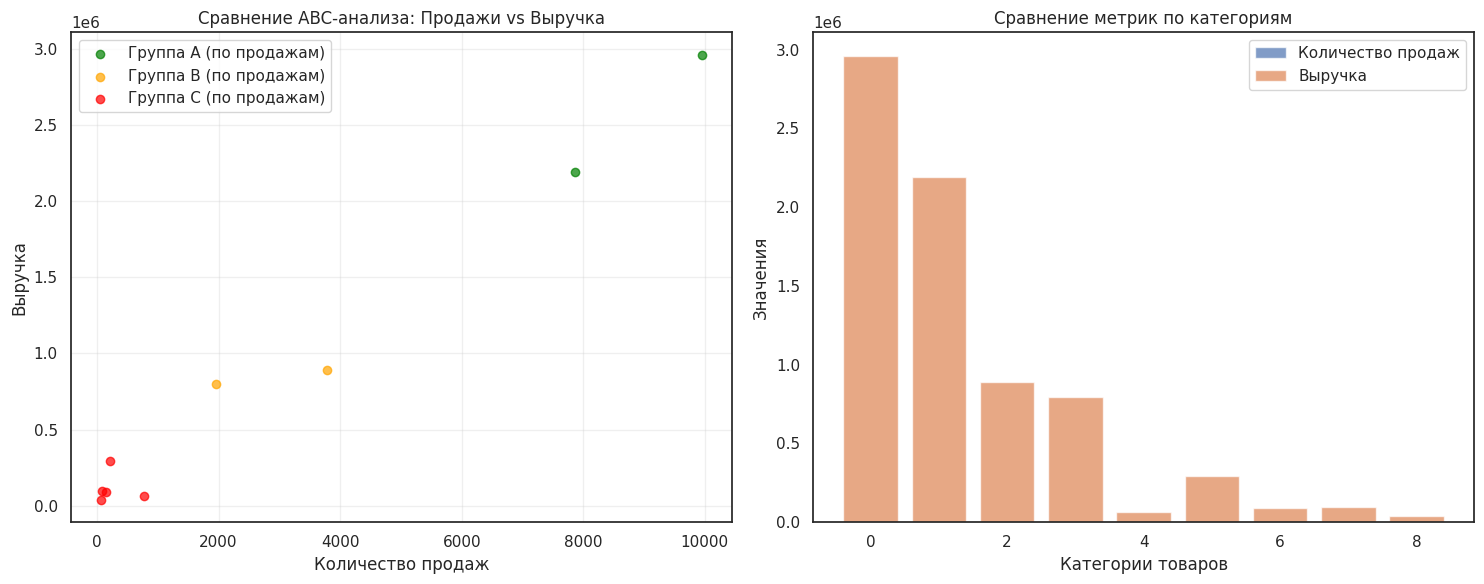

ABC-АНАЛИЗ КАТЕГОРИЙ: СРАВНЕНИЕ ПО ПРОДАЖАМ И ВЫРУЧКЕ
Coffee                    | Продажи: 9948 (A) | Выручка:  2,962,352 ₽ (A) | ✓ Совпадает
Tea                       | Продажи: 7866 (A) | Выручка:  2,190,841 ₽ (A) | ✓ Совпадает
Bakery                    | Продажи: 3780 (B) | Выручка:    889,266 ₽ (B) | ✓ Совпадает
Drinking Chocolate        | Продажи: 1955 (B) | Выручка:    796,364 ₽ (B) | ✓ Совпадает
Flavours                  | Продажи:  777 (C) | Выручка:     63,076 ₽ (C) | ✓ Совпадает
Coffee beans              | Продажи:  216 (C) | Выручка:    292,295 ₽ (C) | ✓ Совпадает
Loose Tea                 | Продажи:  155 (C) | Выручка:     92,986 ₽ (C) | ✓ Совпадает
Branded                   | Продажи:   82 (C) | Выручка:     96,590 ₽ (C) | ✓ Совпадает
Packaged Chocolate        | Продажи:   67 (C) | Выручка:     37,792 ₽ (C) | ✓ Совпадает

💡 АНАЛИЗ ЭФФЕКТИВНОСТИ КАТЕГОРИЙ:
   - Coffee: 298 ₽ средняя выручка за продажу
   - Tea: 279 ₽ средняя выручка за продажу
   - Bakery: 235 ₽ средняя выр

In [213]:
# Анализ вклада категорий товаров в объем продаж
category_sales = df_copy.groupby('Категория товара')['ID операции'].count().sort_values(ascending=False)
category_revenue = df_copy.groupby('Категория товара')['выручка_товара'].sum().sort_values(ascending=False)  # ЗАМЕНА

# Анализ вклада отдельных товаров
product_sales = df_copy.groupby('Название товара')['ID операции'].count().sort_values(ascending=False)
product_revenue = df_copy.groupby('Название товара')['выручка_товара'].sum().sort_values(ascending=False)  # ЗАМЕНА

# ABC-анализ товаров
def abc_analysis(sales_data):
    total = sales_data.sum()
    cumulative_percentage = 0
    abc_dict = {}

    for i, (product, sales) in enumerate(sales_data.items()):
        percentage = (sales / total) * 100
        cumulative_percentage += percentage

        if cumulative_percentage <= 80:
            abc_dict[product] = 'A'
        elif cumulative_percentage <= 95:
            abc_dict[product] = 'B'
        else:
            abc_dict[product] = 'C'

    return abc_dict

# ABC-анализ по количеству продаж
abc_categories_by_sales = abc_analysis(category_sales)
abc_products_by_sales = abc_analysis(product_sales)

# ABC-анализ по выручке (ДОБАВЛЕНО)
abc_categories_by_revenue = abc_analysis(category_revenue)
abc_products_by_revenue = abc_analysis(product_revenue)

# Визуализация результатов
import matplotlib.pyplot as plt

# Сравнение ABC-анализа по продажам и выручке для категорий
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ABC по количеству продаж
category_sales_df = pd.DataFrame({
    'Категория': category_sales.index,
    'Количество_продаж': category_sales.values,
    'ABC_Группа_Продажи': [abc_categories_by_sales.get(cat, 'C') for cat in category_sales.index]
})

# ABC по выручке
category_revenue_df = pd.DataFrame({
    'Категория': category_revenue.index,
    'Выручка': category_revenue.values,
    'ABC_Группа_Выручка': [abc_categories_by_revenue.get(cat, 'C') for cat in category_revenue.index]
})

# Объединяем данные
comparison_df = pd.merge(category_sales_df, category_revenue_df, on='Категория')

# График 1: Сравнение групп ABC по продажам и выручке
colors = {'A': 'green', 'B': 'orange', 'C': 'red'}
for abc_group in ['A', 'B', 'C']:
    group_data = comparison_df[comparison_df['ABC_Группа_Продажи'] == abc_group]
    ax1.scatter(group_data['Количество_продаж'], group_data['Выручка'],
                c=colors[abc_group], label=f'Группа {abc_group} (по продажам)', alpha=0.7)

ax1.set_xlabel('Количество продаж')
ax1.set_ylabel('Выручка')
ax1.set_title('Сравнение ABC-анализа: Продажи vs Выручка')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Разница в классификации
comparison_df['Разница_в_классификации'] = comparison_df['ABC_Группа_Продажи'] != comparison_df['ABC_Группа_Выручка']
different_classification = comparison_df[comparison_df['Разница_в_классификации']]

ax2.bar(range(len(comparison_df)), comparison_df['Количество_продаж'], alpha=0.7, label='Количество продаж')
ax2.bar(range(len(comparison_df)), comparison_df['Выручка'], alpha=0.7, label='Выручка')
ax2.set_xlabel('Категории товаров')
ax2.set_ylabel('Значения')
ax2.set_title('Сравнение метрик по категориям')
ax2.legend()

# Подписываем категории с разной классификацией
for i, row in different_classification.iterrows():
    idx = comparison_df[comparison_df['Категория'] == row['Категория']].index[0]
    ax2.annotate(f"{row['ABC_Группа_Продажи']}→{row['ABC_Группа_Выручка']}",
                (idx, max(row['Количество_продаж'], row['Выручка'])),
                textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Вывод результатов
print("="*70)
print("ABC-АНАЛИЗ КАТЕГОРИЙ: СРАВНЕНИЕ ПО ПРОДАЖАМ И ВЫРУЧКЕ")
print("="*70)

for category in category_sales.index:
    sales_group = abc_categories_by_sales.get(category, 'C')
    revenue_group = abc_categories_by_revenue.get(category, 'C')
    sales_count = category_sales[category]
    revenue_amount = category_revenue[category]

    status = "✓ Совпадает" if sales_group == revenue_group else f"⚠️ Различается ({sales_group} → {revenue_group})"

    print(f"{category:<25} | Продажи: {sales_count:>4} ({sales_group}) | Выручка: {revenue_amount:>10,.0f} ₽ ({revenue_group}) | {status}")

# Анализ расхождений
different_categories = [cat for cat in category_sales.index
                       if abc_categories_by_sales.get(cat) != abc_categories_by_revenue.get(cat)]

if different_categories:
    print(f"\n📊 КАТЕГОРИИ С РАЗЛИЧНОЙ КЛАССИФИКАЦИЕЙ ({len(different_categories)}):")
    for cat in different_categories:
        sales_rank = list(category_sales.index).index(cat) + 1
        revenue_rank = list(category_revenue.index).index(cat) + 1
        print(f"   - {cat}: {sales_rank}-е место по продажам, {revenue_rank}-е место по выручке")

# Дополнительный анализ эффективности
print(f"\n💡 АНАЛИЗ ЭФФЕКТИВНОСТИ КАТЕГОРИЙ:")
for category in category_sales.index[:5]:  # Топ-5 по продажам
    avg_revenue_per_sale = category_revenue[category] / category_sales[category]
    print(f"   - {category}: {avg_revenue_per_sale:,.0f} ₽ средняя выручка за продажу")

## 4.5.Взаимосвязь категориальных признаков

### 'Категория товара' - 'ID магазина'

In [216]:
df_copy.groupby('Категория товара')['ID магазина'].describe()

count      mean       std  min  25%  50%  75%  max
Категория товара                                                       
Bakery              3780.0  5.173545  1.963153  3.0  3.0  5.0  8.0  8.0
Branded               82.0  4.695122  1.711898  3.0  3.0  5.0  5.0  8.0
Coffee              9948.0  5.260856  2.043758  3.0  3.0  5.0  8.0  8.0
Coffee beans         216.0  5.773148  2.048124  3.0  5.0  5.0  8.0  8.0
Drinking Chocolate  1955.0  5.149872  2.056655  3.0  3.0  5.0  8.0  8.0
Flavours             777.0  5.508366  1.870207  3.0  5.0  5.0  8.0  8.0
Loose Tea            155.0  5.670968  2.104756  3.0  3.0  5.0  8.0  8.0
Packaged Chocolate    67.0  5.343284  2.100160  3.0  3.0  5.0  8.0  8.0
Tea                 7866.0  5.221841  2.046748  3.0  3.0  5.0  8.0  8.0

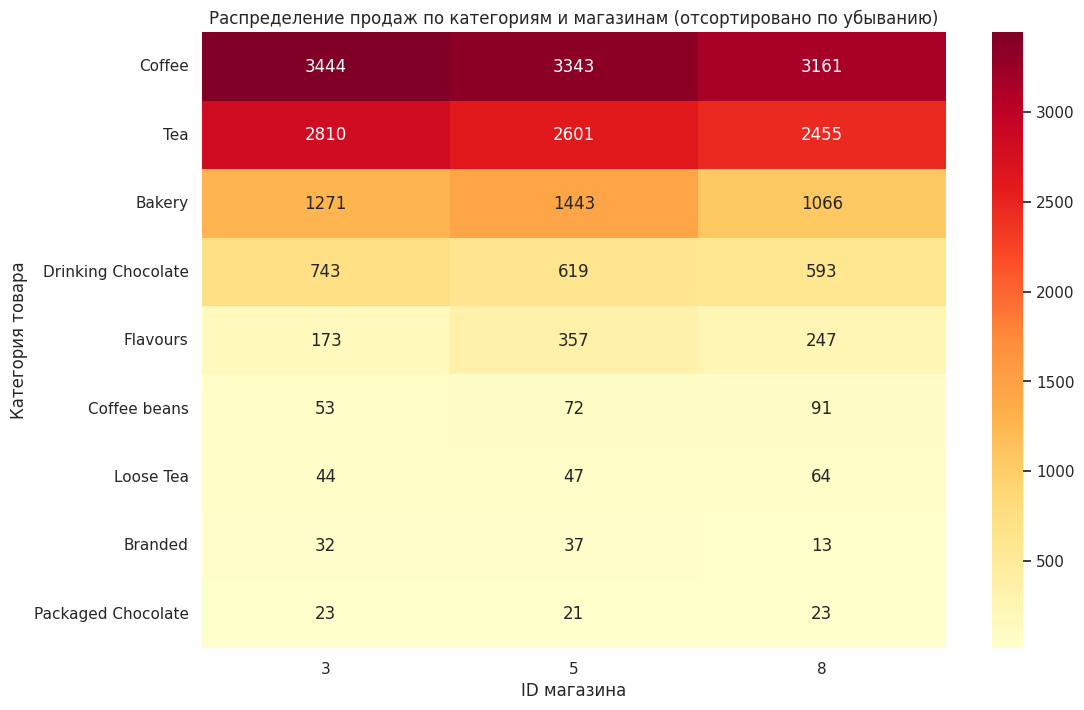

In [217]:

cross_tab = pd.crosstab(df_copy['Категория товара'], df_copy['ID магазина'])


category_sums = cross_tab.sum(axis=1).sort_values(ascending=False)
cross_tab_sorted = cross_tab.loc[category_sums.index]

store_sums = cross_tab.sum(axis=0).sort_values(ascending=False)
cross_tab_sorted = cross_tab_sorted[store_sums.index]

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_sorted,
            annot=True,
            fmt='d',
            cmap='YlOrRd')
plt.title('Распределение продаж по категориям и магазинам (отсортировано по убыванию)')
plt.ylabel('Категория товара')
plt.xlabel('ID магазина')
plt.show()

In [218]:
# таблица сопряженности
WF=pd.crosstab(df_copy['Категория товара'], df_copy['ID магазина']); WF

ID магазина            3     5     8
Категория товара                    
Bakery              1271  1443  1066
Branded               32    37    13
Coffee              3444  3343  3161
Coffee beans          53    72    91
Drinking Chocolate   743   619   593
Flavours             173   357   247
Loose Tea             44    47    64
Packaged Chocolate    23    21    23
Tea                 2810  2601  2455

частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе) (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [219]:
# Проверим связь возрастной категории и пола пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 145.07795057819595
degrees of freedom: 16
p-value: 7.272436605265618e-23



* Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
* Данное отличие является статистически значимым.
* Соответственно, статистическая значимость связи между категорией товара и ID магазина крайне высока

**Выводы:**
1. Сравнительный анализ между магазинами
* Магазин 3:

   * Лидирует в продажах Coffee (3444) , Tea (2810) и Drinking Chocolate (743)

*  Магазин 5:

   * Максимальные продажи в категориях Bakery (1443) и Flavours (357)

   * Хорошие показатели по Coffee (3343) и Tea (2601)

* Магазин 8:

   * Наименьшие общие объемы продаж по большинству категорий

   * Лучшие показатели в категориях Coffee beans (91) и Loose Tea (64)

 2. Значительный разброс в категории Flavours.
Магазин 5: 357 продаж и магазин 3: 173 продажи -
разница более чем в 2 раза  

3. Аномально низкие продажи Branded в магазине 8 - всего 13 продаж против 32-37 в других магазинах

4. Магазин 3 имеет немного более высокие показатели по основным категориям , магазин 8 показывает чуть более низкие результаты, магазин 5 находится посередине

5.  На основании полученного значения p-value < 0.05 можно констатировать наличие статистически значимой взаимосвязи между признаками «Категория товара» и «ID магазина».

### 'Возрастная группа ' - 'Категория товара'

In [220]:
# выделим 3 категории возраста и запишем в отдельный столбец датафрейма
# Создаем сегменты возраста
def age_to_category(age):
    if 24 <= age <= 39:
        return '24-39 (молодые клиенты)'
    elif 40 <= age <= 59:
        return '40-59 (зрелые клиенты)'
    elif 60 <= age <= 75:
        return '60-75 (пожилые клиенты)'
    else:
        return age_to_category


In [221]:
df_copy['Возрастная группа'] = df_copy['Возраст клиента'].apply(age_to_category)
df_copy.head()


ID операции  Количество  Цена за единицу  Общая сумма чека  ID товара  \
0            0           1           162.50            162.50         52   
1            1           2           227.50            455.00         27   
2            2           2           162.50            325.00         46   
3            3           2           162.50            325.00         23   
4            4           1           159.25            159.25         34   

               Название товара Категория товара  ID магазина   Город магазина  \
0    Traditional Blend Chai Rg              Tea            3  Санкт-Петербург   
1                 Brazilian Lg           Coffee            3  Санкт-Петербург   
2        Serenity Green Tea Rg              Tea            3  Санкт-Петербург   
3  Our Old Time Diner Blend Rg           Coffee            3  Санкт-Петербург   
4     Jamaican Coffee River Sm           Coffee            3  Санкт-Петербург   

   ID клиента Пол клиента  Возраст клиента  доля_товара  выручка_товара  \
0         558     женский               42          1.0          162.50   
1         781   не указан               34          1.0          455.00   
2         788   не указан               30          1.0          325.00   
3         683     женский               26          1.0          325.00   
4          99     мужской               58          1.0          159.25   

         Возрастная группа  
0   40-59 (зрелые клиенты)  
1  24-39 (молодые клиенты)  
2  24-39 (молодые клиенты)  
3  24-39 (молодые клиенты)  
4   40-59 (зрелые клиенты)

In [222]:

cross_tab = pd.crosstab(df_copy['Категория товара'], df_copy['Возрастная группа'])


category_order = cross_tab.sum(axis=1).sort_values(ascending=False).index
cross_tab = cross_tab.loc[category_order]

print(cross_tab)

Возрастная группа   24-39 (молодые клиенты)  40-59 (зрелые клиенты)  \
Категория товара                                                      
Coffee                                 3906                    3412   
Tea                                    3215                    2699   
Bakery                                 1512                    1289   
Drinking Chocolate                      742                     724   
Flavours                                309                     255   
Coffee beans                             91                      67   
Loose Tea                                66                      45   
Branded                                  33                      32   
Packaged Chocolate                       26                      24   

Возрастная группа   60-75 (пожилые клиенты)  
Категория товара                             
Coffee                                 2630  
Tea                                    1952  
Bakery                            

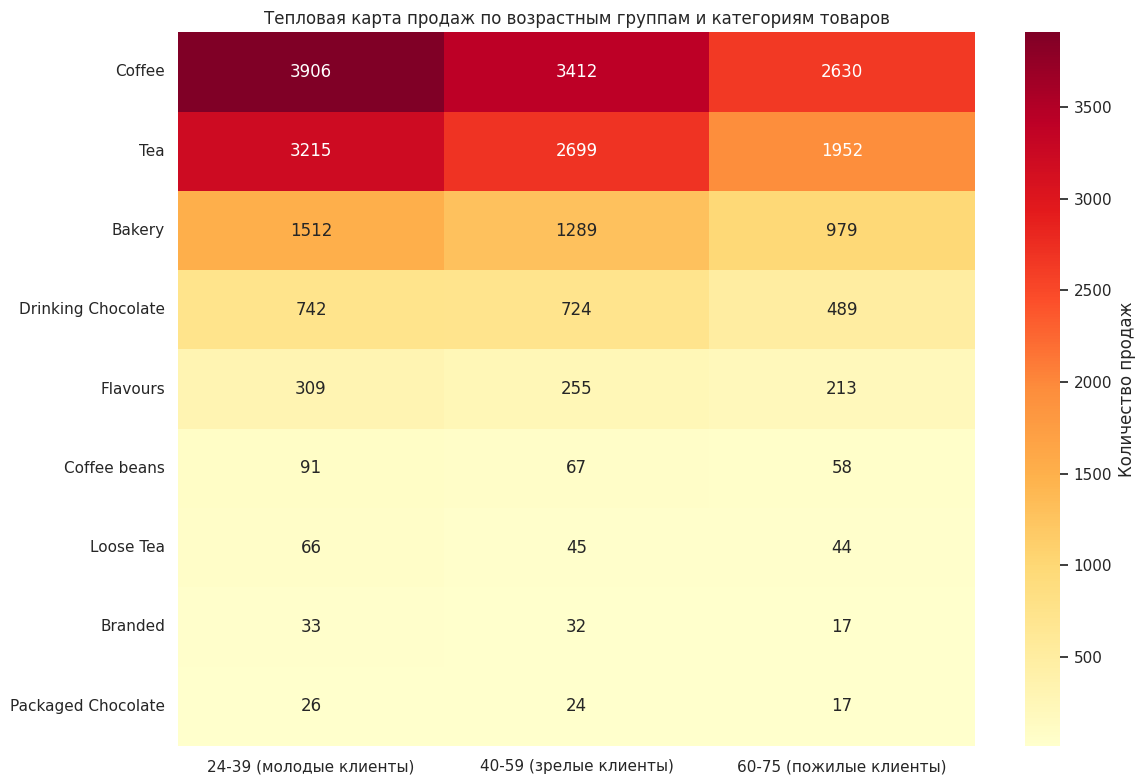

In [223]:
plt.figure(figsize=(12, 8))

# Создаем тепловую карту
sns.heatmap(cross_tab,
            annot=True,
            fmt='d',
            cmap='YlOrRd',
            cbar_kws={'label': 'Количество продаж'})

plt.title('Тепловая карта продаж по возрастным группам и категориям товаров')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [224]:
# таблица сопряженности
WF=pd.crosstab(df_copy['Возрастная группа'], df_copy['Категория товара']); WF

Категория товара         Bakery  Branded  Coffee  Coffee beans  \
Возрастная группа                                                
24-39 (молодые клиенты)    1512       33    3906            91   
40-59 (зрелые клиенты)     1289       32    3412            67   
60-75 (пожилые клиенты)     979       17    2630            58   

Категория товара         Drinking Chocolate  Flavours  Loose Tea  \
Возрастная группа                                                  
24-39 (молодые клиенты)                 742       309         66   
40-59 (зрелые клиенты)                  724       255         45   
60-75 (пожилые клиенты)                 489       213         44   

Категория товара         Packaged Chocolate   Tea  
Возрастная группа                                  
24-39 (молодые клиенты)                  26  3215  
40-59 (зрелые клиенты)                   24  2699  
60-75 (пожилые клиенты)                  17  1952

частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе) (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [225]:
# Проверим связь с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 19.613128528771846
degrees of freedom: 16
p-value: 0.2381526704131675



Высокое значение p-value (0.238) говорит о том, что, нет оснований отвергать нулевую гипотезу о независимости признаков

**Выводы:**
1. Объемы продаж:
* Молодые клиенты - 10 900 продаж
* Зрелые клиенты - 8 553 продаж
* Пожилые клиенты - 6 487 продаж

Молодые клиенты (24-39 лет) совершают на 27% больше покупок, чем зрелые, и на 68% больше, чем пожилые клиенты.

2. Лидеры продаж во всех возрастных группах:
* Coffee - доминирующая категория (35-38% от всех продаж в каждой группе)
* Tea - вторая по популярности категория (24-29%)
* Bakery - стабильно третье место (9-14%)

3. Наименее популярные категории (менее 1% от продаж в каждой группе):

* Packaged Chocolate
* Branded
* Loose Tea
* Coffee beans

4. Категории, популярные у молодых клиентов:

* Coffee  (3906 продаж - максимальный показатель)
* Tea (3215 продаж)
* Bakery (1512 продаж)

5.  На основании полученного значения p-value существенно выше критического уровня 0.05, значит связь между категорией товара и возрастом покупателя статистически не значима и наблюдаемые различия могут быть результатом случайности

### 'Пол клиента ' - 'Категория товара'

In [226]:

cross_tab = pd.crosstab(df_copy['Категория товара'], filtered_data['Пол клиента'])


category_order = cross_tab.sum(axis=1).sort_values(ascending=False).index
cross_tab = cross_tab.loc[category_order]

print(cross_tab)

Пол клиента         женский  мужской
Категория товара                    
Coffee                 4338     3335
Tea                    3450     2593
Bakery                 1616     1244
Drinking Chocolate      884      645
Flavours                332      233
Coffee beans             96       79
Loose Tea                66       48
Branded                  38       23
Packaged Chocolate       28       22


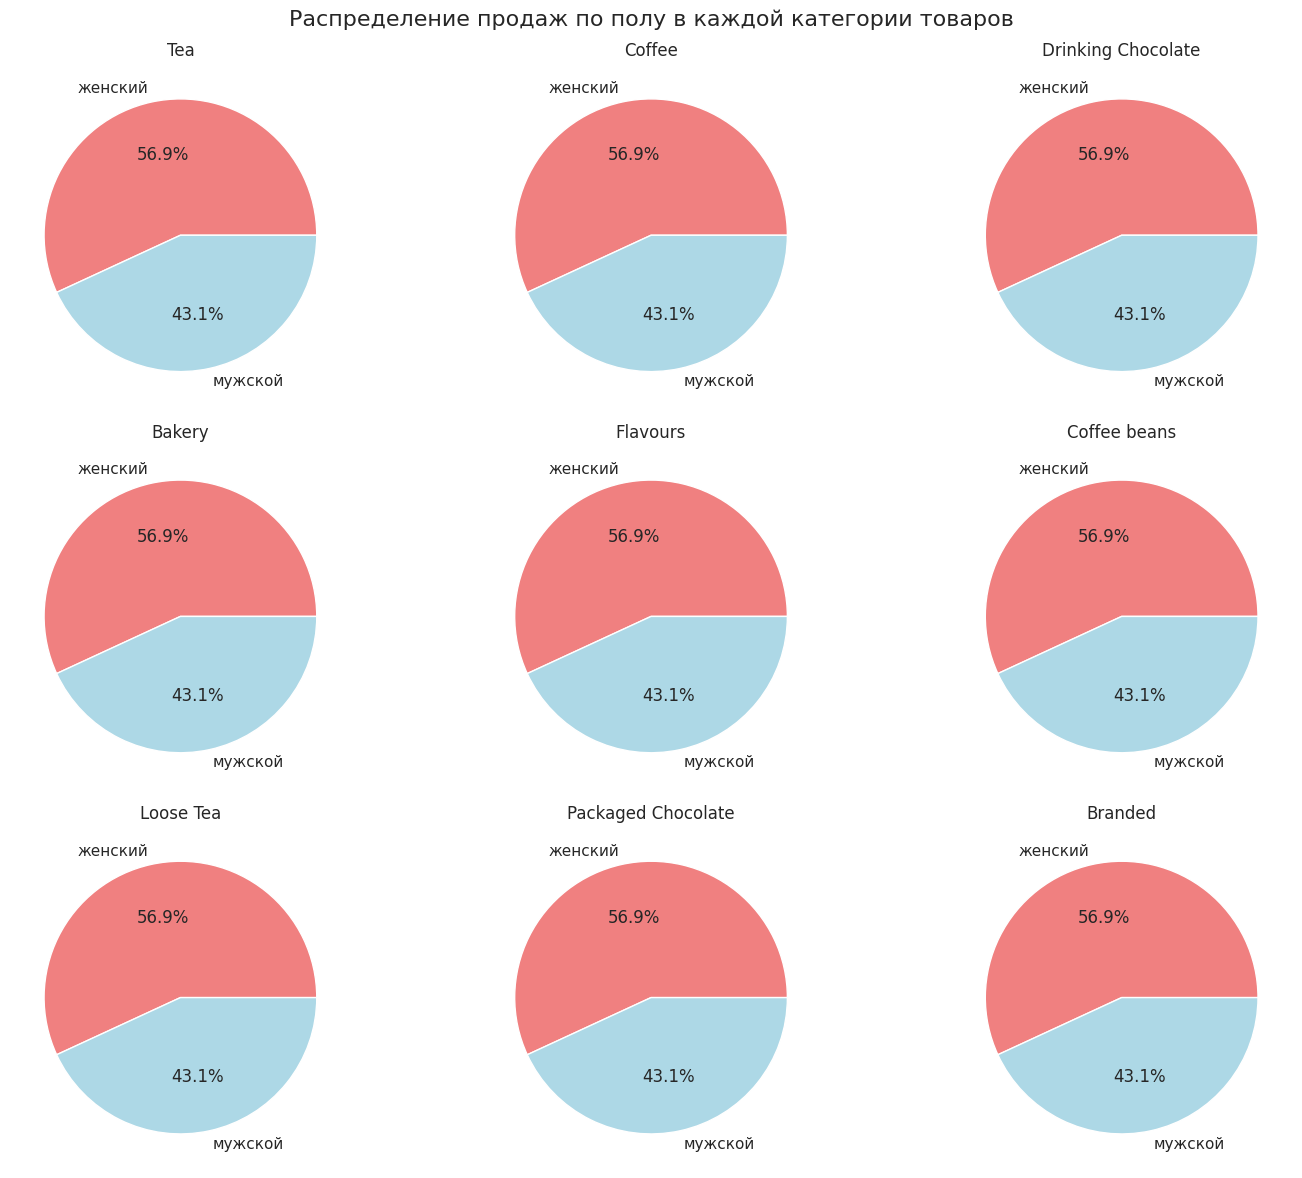

In [227]:

category_groups = df_copy.groupby('Категория товара')


categories = df_copy['Категория товара'].unique()


n_cols = 3
n_rows = (len(categories) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle('Распределение продаж по полу в каждой категории товаров', fontsize=16)

axes = axes.flatten()

for i, category in enumerate(categories):

    category_data = df_copy[df_copy['Категория товара'] == category]


    gender_distribution = filtered_data['Пол клиента'].value_counts()

    axes[i].pie(gender_distribution.values,
                labels=gender_distribution.index,
                autopct='%1.1f%%',
                colors=['lightcoral', 'lightblue'])
    axes[i].set_title(category)


for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

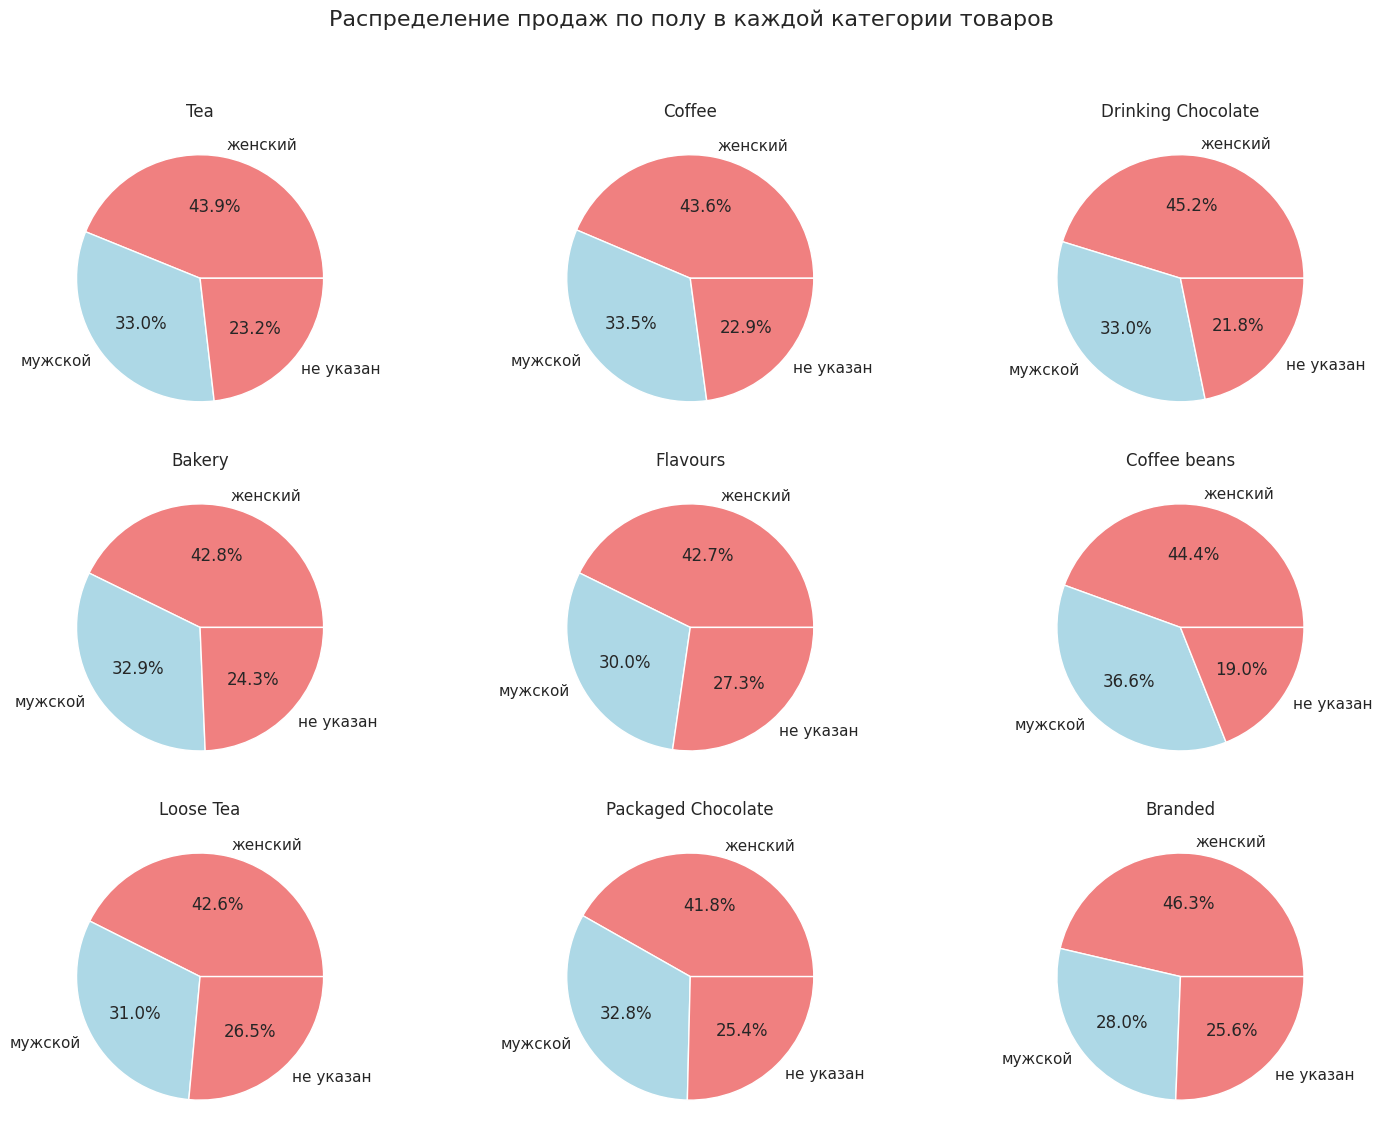

In [228]:
category_groups = df_copy.groupby('Категория товара')

categories = df_copy['Категория товара'].unique()

n_cols = 3
n_rows = (len(categories) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle('Распределение продаж по полу в каждой категории товаров', fontsize=16)

axes = axes.flatten()

for i, category in enumerate(categories):
    # Исправляем использование переменной
    category_data = df_copy[df_copy['Категория товара'] == category]

    # Используем правильную переменную для подсчета
    gender_distribution = category_data['Пол клиента'].value_counts()

    axes[i].pie(gender_distribution.values,
                labels=gender_distribution.index,
                autopct='%1.1f%%',
                colors=['lightcoral', 'lightblue'])
    axes[i].set_title(category)

# Скрываем пустые графики
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Корректируем расположение
plt.show()


In [229]:
# таблица сопряженности
WF=pd.crosstab(filtered_data['Пол клиента'], df_copy['Категория товара']); WF

Категория товара  Bakery  Branded  Coffee  Coffee beans  Drinking Chocolate  \
Пол клиента                                                                   
женский             1616       38    4338            96                 884   
мужской             1244       23    3335            79                 645   

Категория товара  Flavours  Loose Tea  Packaged Chocolate   Tea  
Пол клиента                                                      
женский                332         66                  28  3450  
мужской                233         48                  22  2593

частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе) (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [230]:
# Проверим связь с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 3.0907947001102634
degrees of freedom: 8
p-value: 0.9285310371658719



Высокое значение p-value (0.928) говорит о том,
что, нет оснований отвергать нулевую гипотезу о независимости признаков

**Выводы:**
1. Прослеживается доминирование женской аудитории во всех категориях

2. Категории с наибольшим преобладанием женской аудитории:
* Branded ( Наибольший гендерный дисбаланс)
* Flavours
* Loose Tea

3. Категории с относительно более сбалансированным распределением:
* Coffee beans (Наименьший гендерный дисбаланс)
* Packaged Chocolate
 4. Получено значение p-value = 0.928, значит нет достаточных оснований утверждать, что пол клиента влияет на выбор категории товара

### 'Возрастная группа' - 'ID магазина'

In [231]:

cross_tab = pd.crosstab(df_copy['Возрастная группа'], df_copy['ID магазина'])


category_order = cross_tab.sum(axis=1).sort_values(ascending=False).index
cross_tab = cross_tab.loc[category_order]

print(cross_tab)

ID магазина                 3     5     8
Возрастная группа                        
24-39 (молодые клиенты)  2538  3935  3427
40-59 (зрелые клиенты)   3350  2955  2242
60-75 (пожилые клиенты)  2705  1650  2044


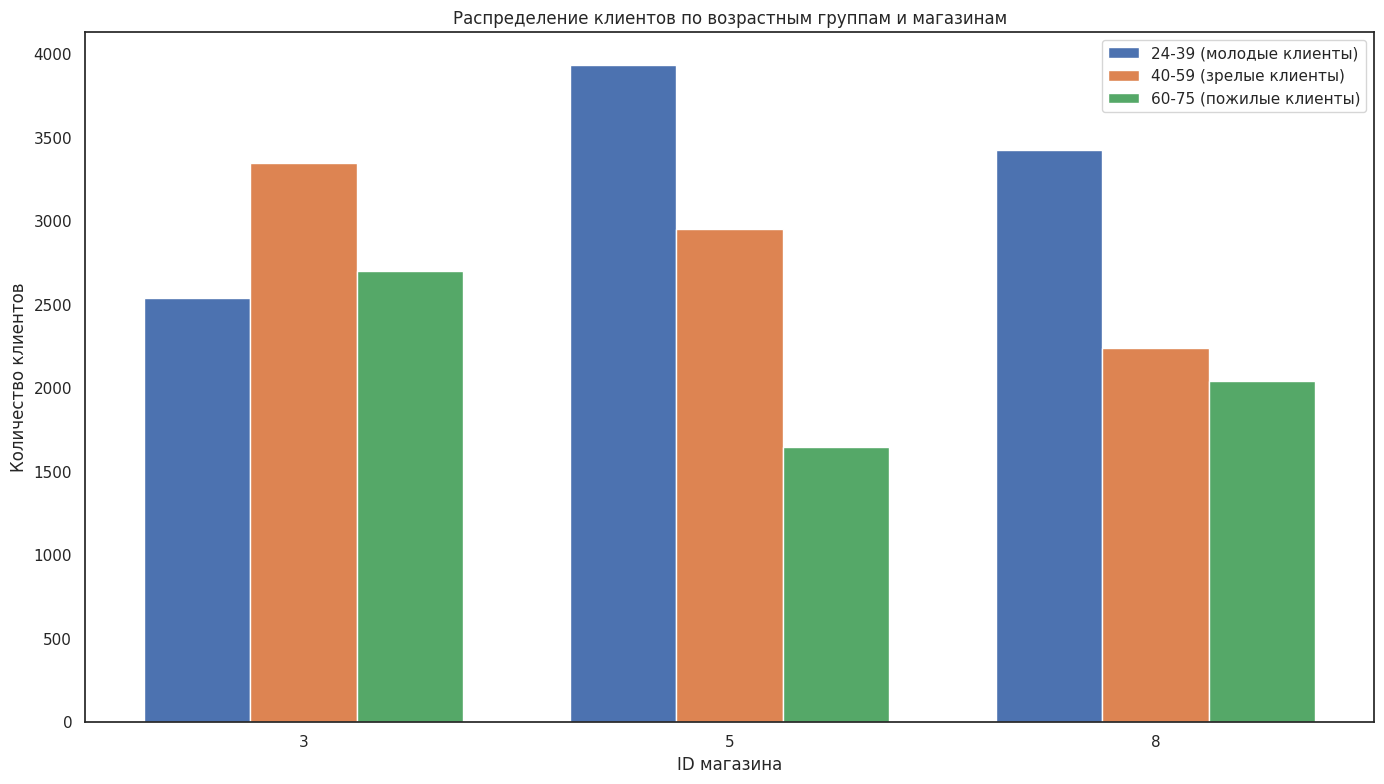

In [232]:

plt.figure(figsize=(14, 8))


age_groups = cross_tab.index
stores = cross_tab.columns
x = np.arange(len(stores))
width = 0.25


for i, age_group in enumerate(age_groups):
    values = cross_tab.loc[age_group].values
    plt.bar(x + i*width, values, width, label=age_group)

plt.xlabel('ID магазина')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по возрастным группам и магазинам')
plt.xticks(x + width, stores)
plt.legend()
plt.tight_layout()
plt.show()

In [233]:
# таблица сопряженности
WF=pd.crosstab(df_copy['Возрастная группа'], df_copy['ID магазина']); WF

ID магазина                 3     5     8
Возрастная группа                        
24-39 (молодые клиенты)  2538  3935  3427
40-59 (зрелые клиенты)   3350  2955  2242
60-75 (пожилые клиенты)  2705  1650  2044

частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе) (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [234]:
# Проверим связь с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 717.8028528696033
degrees of freedom: 4
p-value: 4.8671476374623085e-154



**Выводы:**
1. Возрастная структура клиентов:
* Магазин 3:
   * Зрелые клиенты (40-59 лет): 3,350 (39.0%)
   * Пожилые клиенты (60-75 лет): 2,705 (31.5%)
   * Молодые клиенты (24-39 лет): 2,538 (29.5%)

* Магазин 5:
   * Молодые клиенты (24-39 лет): 3,935 (46.1%)
   * Зрелые клиенты (40-59 лет): 2,955 (34.6%)
   * Пожилые клиенты (60-75 лет): 1,650 (19.3%)

* Магазин 8:
   * Молодые клиенты (24-39 лет): 3,427 (44.4%)
   * Зрелые клиенты (40-59 лет): 2,242 (29.1%)
   * Пожилые клиенты (60-75 лет): 2,044 (26.5%)

2. В магазине 3 преобладает зрелая и пожилая аудитория (70.5% вместе), в магазине 5 явно доминирует молодая аудитория, что составляет почти половину всех клиентов, в магазине 8 также преобладает молодая аудитория, но распределение более сбалансировано по сравнению с магазином 5.

3. p-value < 0,05 (практически равное нулю) свидетельствует о том, что статистическая значимость связи между возрастной группой и ID магазина является абсолютно достоверной.

# **5. ABC анализ/ Выявление наиболее и наименее прибыльной продукции**

In [235]:
# Анализ вклада категорий товаров в объем продаж
category_sales = df_copy.groupby('Категория товара')['ID операции'].count().sort_values(ascending=False)
category_revenue = df_copy.groupby('Категория товара')['Общая сумма чека'].sum().sort_values(ascending=False)  # если есть данные о стоимости

# Анализ вклада отдельных товаров
product_sales = df_copy.groupby('Название товара')['ID операции'].count().sort_values(ascending=False)
product_revenue = df_copy.groupby('Название товара')['Общая сумма чека'].sum().sort_values(ascending=False)  # если есть данные о стоимости

# ABC-анализ товаров
def abc_analysis(sales_data):
    total = sales_data.sum()
    cumulative_percentage = 0
    abc_dict = {}

    for i, (product, sales) in enumerate(sales_data.items()):
        percentage = (sales / total) * 100
        cumulative_percentage += percentage

        if cumulative_percentage <= 80:
            abc_dict[product] = 'A'
        elif cumulative_percentage <= 95:
            abc_dict[product] = 'B'
        else:
            abc_dict[product] = 'C'

    return abc_dict

abc_categories = abc_analysis(category_sales)
abc_products = abc_analysis(product_sales)

In [236]:
abc_categories

{'Coffee': 'A',
 'Tea': 'A',
 'Bakery': 'B',
 'Drinking Chocolate': 'B',
 'Flavours': 'C',
 'Coffee beans': 'C',
 'Loose Tea': 'C',
 'Branded': 'C',
 'Packaged Chocolate': 'C'}

In [237]:
abc_products

{'Morning Sunrise Chai Rg': 'A',
 'Columbian Medium Roast Rg': 'A',
 'Latte': 'A',
 'Sustainably Grown Organic Lg': 'A',
 'Traditional Blend Chai Rg': 'A',
 'Brazilian Sm': 'A',
 'Our Old Time Diner Blend Sm': 'A',
 'English Breakfast Lg': 'A',
 'Spicy Eye Opener Chai Lg': 'A',
 'Serenity Green Tea Rg': 'A',
 'Dark chocolate Lg': 'A',
 'Our Old Time Diner Blend Rg': 'A',
 'Earl Grey Rg': 'A',
 'Lemon Grass Rg': 'A',
 'Morning Sunrise Chai Lg': 'A',
 'Brazilian Rg': 'A',
 'English Breakfast Rg': 'A',
 'Serenity Green Tea Lg': 'A',
 'Sustainably Grown Organic Rg': 'A',
 'Chocolate Croissant': 'A',
 'Ethiopia Lg': 'A',
 'Peppermint Rg': 'A',
 'Ethiopia Rg': 'A',
 'Spicy Eye Opener Chai Rg': 'A',
 'Cappuccino': 'A',
 'Latte Rg': 'A',
 'Brazilian Lg': 'A',
 'Traditional Blend Chai Lg': 'A',
 'Jamaican Coffee River Sm': 'A',
 'Cappuccino Lg': 'A',
 'Jamaican Coffee River Rg': 'A',
 'Espresso shot': 'A',
 'Columbian Medium Roast Lg': 'A',
 'Peppermint Lg': 'A',
 'Earl Grey Lg': 'A',
 'Ethiopi

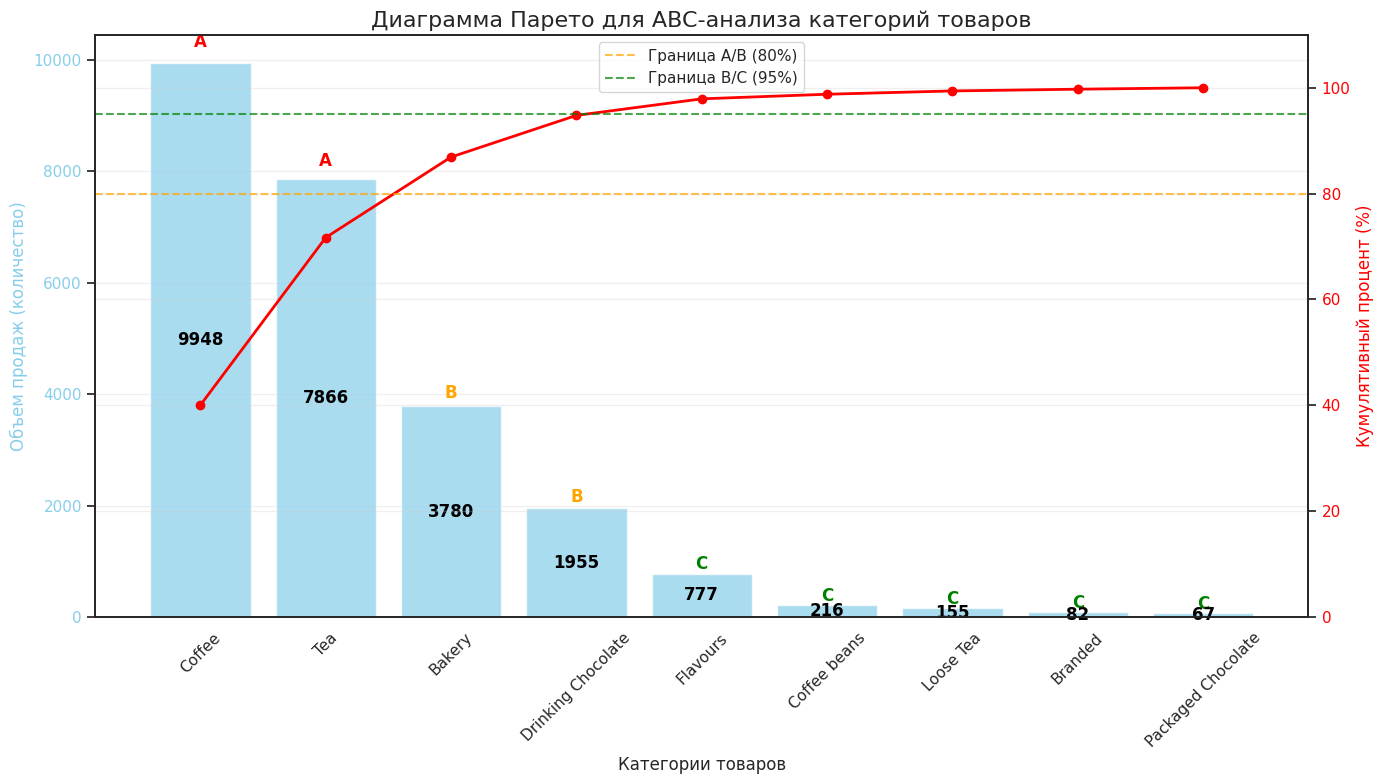

Результаты ABC-анализа категорий товаров:
Coffee: A класс
Tea: A класс
Bakery: B класс
Drinking Chocolate: B класс
Flavours: C класс
Coffee beans: C класс
Loose Tea: C класс
Branded: C класс
Packaged Chocolate: C класс

Рекомендации по управлению ассортиментом:
Категории A (2): Coffee, Tea
→ Увеличить наличие, оптимизировать цены, активно продвигать
Категории B (2): Bakery, Drinking Chocolate
→ Поддерживать текущий уровень запасов, умеренное продвижение
Категории C (5): Flavours, Coffee beans, Loose Tea, Branded, Packaged Chocolate
→ Снизить запасы, рассмотреть возможность сокращения ассортимента


In [238]:
# Выполняем ABC-анализ для категорий товаров
abc_categories = abc_analysis(category_sales)

# Создаем данные для диаграммы Парето
categories = category_sales.index
sales_values = category_sales.values
cumulative_percentage = np.cumsum(sales_values) / np.sum(sales_values) * 100

# Создаем фигуру и оси
fig, ax1 = plt.subplots(figsize=(14, 8))

# Столбчатая диаграмма для объема продаж
bars = ax1.bar(categories, sales_values, color='skyblue', alpha=0.7)
ax1.set_xlabel('Категории товаров')
ax1.set_ylabel('Объем продаж (количество)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=45)

# Добавляем линию кумулятивного процента
ax2 = ax1.twinx()
line = ax2.plot(categories, cumulative_percentage, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Кумулятивный процент (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110)

# Добавляем горизонтальные линии для разделения ABC-категорий
ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='Граница A/B (80%)')
ax2.axhline(y=95, color='green', linestyle='--', alpha=0.7, label='Граница B/C (95%)')

# Добавляем аннотации для ABC-категорий
for i, (category, abc_class) in enumerate(abc_categories.items()):
    color = 'red' if abc_class == 'A' else 'orange' if abc_class == 'B' else 'green'
    ax1.text(i, sales_values[i] * 1.02, abc_class,
             ha='center', va='bottom', fontweight='bold', color=color)

# Добавляем значения на столбцы
for i, v in enumerate(sales_values):
    ax1.text(i, v * 0.5, str(v), ha='center', va='center', color='black', fontweight='bold')

# Добавляем заголовок и легенду
plt.title('Диаграмма Парето для ABC-анализа категорий товаров', fontsize=16)
ax2.legend(loc='upper center')

# Добавляем сетку для улучшения читаемости
ax1.grid(axis='y', alpha=0.3)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Выводим результаты ABC-анализа
print("Результаты ABC-анализа категорий товаров:")
for category, abc_class in abc_categories.items():
    print(f"{category}: {abc_class} класс")

# Анализируем результаты
print("\nРекомендации по управлению ассортиментом:")
a_categories = [cat for cat, cls in abc_categories.items() if cls == 'A']
b_categories = [cat for cat, cls in abc_categories.items() if cls == 'B']
c_categories = [cat for cat, cls in abc_categories.items() if cls == 'C']

print(f"Категории A ({len(a_categories)}): {', '.join(a_categories)}")
print("→ Увеличить наличие, оптимизировать цены, активно продвигать")

print(f"Категории B ({len(b_categories)}): {', '.join(b_categories)}")
print("→ Поддерживать текущий уровень запасов, умеренное продвижение")

print(f"Категории C ({len(c_categories)}): {', '.join(c_categories)}")
print("→ Снизить запасы, рассмотреть возможность сокращения ассортимента")

**Выводы:**
1. Структура ассортимента:
 * Категории A (20% ассортимента, 80% продаж):
    * Coffee
    * Tea
 * Категории B (20% ассортимента, 15% продаж)     
    * Bakery
    *  Drinking Chocolate
 * Категории C (60% ассортимента, 5% продаж):  
    * Flavours
    * Coffee beans
    * Loose Tea
    * Branded
    * Packaged Chocolate   

2. Coffee и Tea являются основными прибылеобразующими категориями. Эти две категории генерируют 80% от всех продаж сети. Являются универсальными и популярными во всех возрастных группах и магазинах   

3. 5 из 9 категорий (C-класс) приносят только 5% продаж

   

#  6. Evaluation / Общие выводы и рекомендации

***Аналитические цели***:
1. Оценить вклад различных товарных категорий в общий объем продаж, выявить высокорентабельные и низкорентабельные товарные группы.

2. Определить ключевые сегменты клиентской базы.

3. Анализировать распределение объема продаж между торговыми точками сети кофеен.

## **I. Общие выводы по датасету:**
1. Был представлен датасет с выгрузкой о транзакциях и клиентах из CRM-системы Заказчика: файл в формате csv, содержащий 24909 строк (объектов) и 6 столбцов (признаков).

2. Предобработка данных включала в себя: исключение дубликатов, распаковку и форматирование данных, расчет дополнительных признаков.

3. По итогу предобработки сохранен датасет для последующего анализа: датасет (24852 объектов, 12 признаков) : файл в формате xlsx (coffe_shop_clean.xlsx)

4. Дополнительно в процессе анализа была произведена группировка значений возраста по 3 категориям.


## **II. Ключевые сегменты клиентской базы:**
1. Демографические особенности:
* Гендерное распределение: 44% женщины, 33% мужчины, 23% не указали пол. Это связано с тем, что женщины чаще посещают кофейни для общения и встреч.
* Возрастной профиль:
   * Молодые (24-39 лет) - 40% (наиболее активная группа)
   * Зрелые (40-59 лет) - 34.4%
   * Пожилые (60-75 лет) - 25.8%
2. Потребительское поведение:
* Предпочтения по категориям:
   * Coffee (40% продаж)    
   * Tea ( 31,7 %)
   * Bakery ( 15,2 %)
3. Гендерные предпочтения:
   * Женщины доминируют во всех категориях товара
   * Наибольший гендерный дисбаланс: Branded, Flavours, Loose Tea
   * Наиболее сбалансированные категории: Coffee beans, Packaged Chocolate
4. Возрастные предпочтения:
   * Молодежь предпочитает: Loose Tea, Branded, Coffee, Tea, Bakery
   * Зрелые клиенты предпочитают: Drinking Chocolate, Packaged Chocolate, Flavours, Coffee beans
5. Локационные особенности:
   * Магазин 3: ориентирован на зрелую и пожилую аудиторию
   * Магазин 5: явное доминирование молодой аудитории
   * Магазин 8: сбалансированное распределение по возрастам  
6. Частота посещений:
   * Частые клиенты составляют 45,6% и являются самой активной группой, приносящей значительную часть выручки.
   * Средние покупатели занимают 39,8%, обеспечивая стабильный поток продаж.
   * Редкие покупатели составляют 10,7%
   * Постоянные клиенты — всего 4%.    
7. Средний чек -  наибольшие средние затраты наблюдаются в возрастных группах 29, 41, 46, 63 и 64 года.        

## **III. Распределение объема продаж между торговыми точками**:

1. Географическое распределение и эффективность:
* Москва доминирует с 65,4% транзакций, что соответствует ее статусу мегаполиса с большим населением и развитой инфраструктурой
* Санкт-Петербург показывает достойные результаты (34,6%), особенно учитывая разницу в масштабах городов

2. Эффективность по магазинам:
* Магазин 3 (Санкт-Петербург):
   * Максимальное количество чеков (8593) - высокая проходимость
   * Наименьшая средняя сумма чека (292,70.)
   * Лидер в продажах coffee, tea и drinking chocolate
* Магазин 5 (Москва):
   * Наибольшая средняя сумма чека (304,83)  
   * Лидер в продажах bakery и flavours
   * Наличие чеков с большим количеством позиций
* Магазин 8 (Москва):
   * Наименьшее количество чеков (7713)
   * Второй по средней сумме чека (298.61)
3. Особенности потребительского поведения:

* Московские магазины показывают более высокую среднюю сумму чека
* Выявлены значительные различия в предпочтениях между магазинами



## **IV. Оценка вклад различных товарных категорий в общий объем продаж**:

1.  Распределение товаров по популярности:
* Высокая популярность (17,5% ассортимента): 14 товаров
 * Средняя популярность (49% ассортимента): 39 товаров
* Низкая популярность (34% ассортимента): 27 товаров

2. Ценовые сегменты категорий:
 * Премиум-сегмент (средний чек > 500 ):
   * Coffee beans (1454,82)   
   * Branded (1177,93 )
   * Loose Tea (599,91 )
   * Packaged Chocolate (564,05)
* Средний сегмент (средний чек 200-500 ):
   *   Drinking Chocolate (407,35 )
   * Coffee (297,78 )
   * Tea (278,52 руб)
* Эконом-сегмент (средний чек < 200 руб):
   * Bakery (235,26 )   
   * Flavours (81,99)

3.  Товары-лидеры по популярности:
* Dark chocolate Lg (504 покупки) - абсолютный лидер
* Brazilian Lg (471 покупка) - популярный кофейный напиток
* Earl Grey Lg (461 покупка) - популярный чайный напиток   

4. Наименее популярные товары:
* Earl Grey (15 покупок)
* Chili Mayan (17 покупок)
* I Need My Bean! Diner mug (27 покупок)  

5. Согласно ABC-анализу:
* Структура ассортимента:
   * Категории A (20% ассортимента, 80% продаж):
      * Coffee
      * Tea
   * Категории B (20% ассортимента, 15% продаж)     
      * Bakery
      *  Drinking Chocolate
   * Категории C (60% ассортимента, 5% продаж):  
       * Flavours
       * Coffee beans
       * Loose Tea
       * Branded
       * Packaged Chocolate   

* Coffee и Tea являются основными прибылеобразующими категориями. Эти две категории генерируют 80% от всех продаж сети. Являются универсальными и популярными во всех возрастных группах и магазинах   

* 5 из 9 категорий (C-класс) приносят только 5% продаж


## **V. Рекомендации:**
1. В связи с обнаружением дубликатов по столбцу transaction_id следует дать рекомендацию Заказчику провести проверку источника данных для выявления причины дубликатов

2. Оптимизация ассортиментной политики:
* Для категорий A (Coffee, Tea - 80% продаж)  
   * Обеспечивать стабильное наличие товаров   
   * Увеличить глубину ассортимента в этих категориях за счет введения новых вкусов
   * Активно продвигать эти категории через программы лояльности с акцентом на частые покупки и делать комбо-предложения с товарами из категории B
* Для категорий B (Bakery, Drinking Chocolate - 15% продаж): оптимизировать ассортимент для увеличения конверсии, сфокусироваться на наиболее популярных позициях

* Для категорий C (5% продаж): исключить наименее популярные позиции (Earl Grey, Chili Mayan и др.)

2. Ценовая политика:
* Премиум-сегмент:поддерживать высокие цены на премиальные товары и разработать программы для VIP-клиентов
* Средний сегмент: внедрить систему скидок

3. Для наименее популярных товаров:
* Рассмотреть возможность замены
* Оптимизировать размещение в торговом зале

4. Локационная стратегия:
* Для магазина 3: внедрить методы увеличения среднего чека, поддержание высокого уровня посещаемости
* Для магазина 5: тиражировать успешный опыт на другие точки
* Для магазина 8 : найти причины низкой посещаемости, работать над увеличением количества чеков

5. Кофейня популярна среди женщин и молодых клиентов. Для повышения эффективности бизнеса рекомендуется акцентировать внимание на молодежной аудитории и развивать ассортимент, соответствующий их предпочтениям.
    


